In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

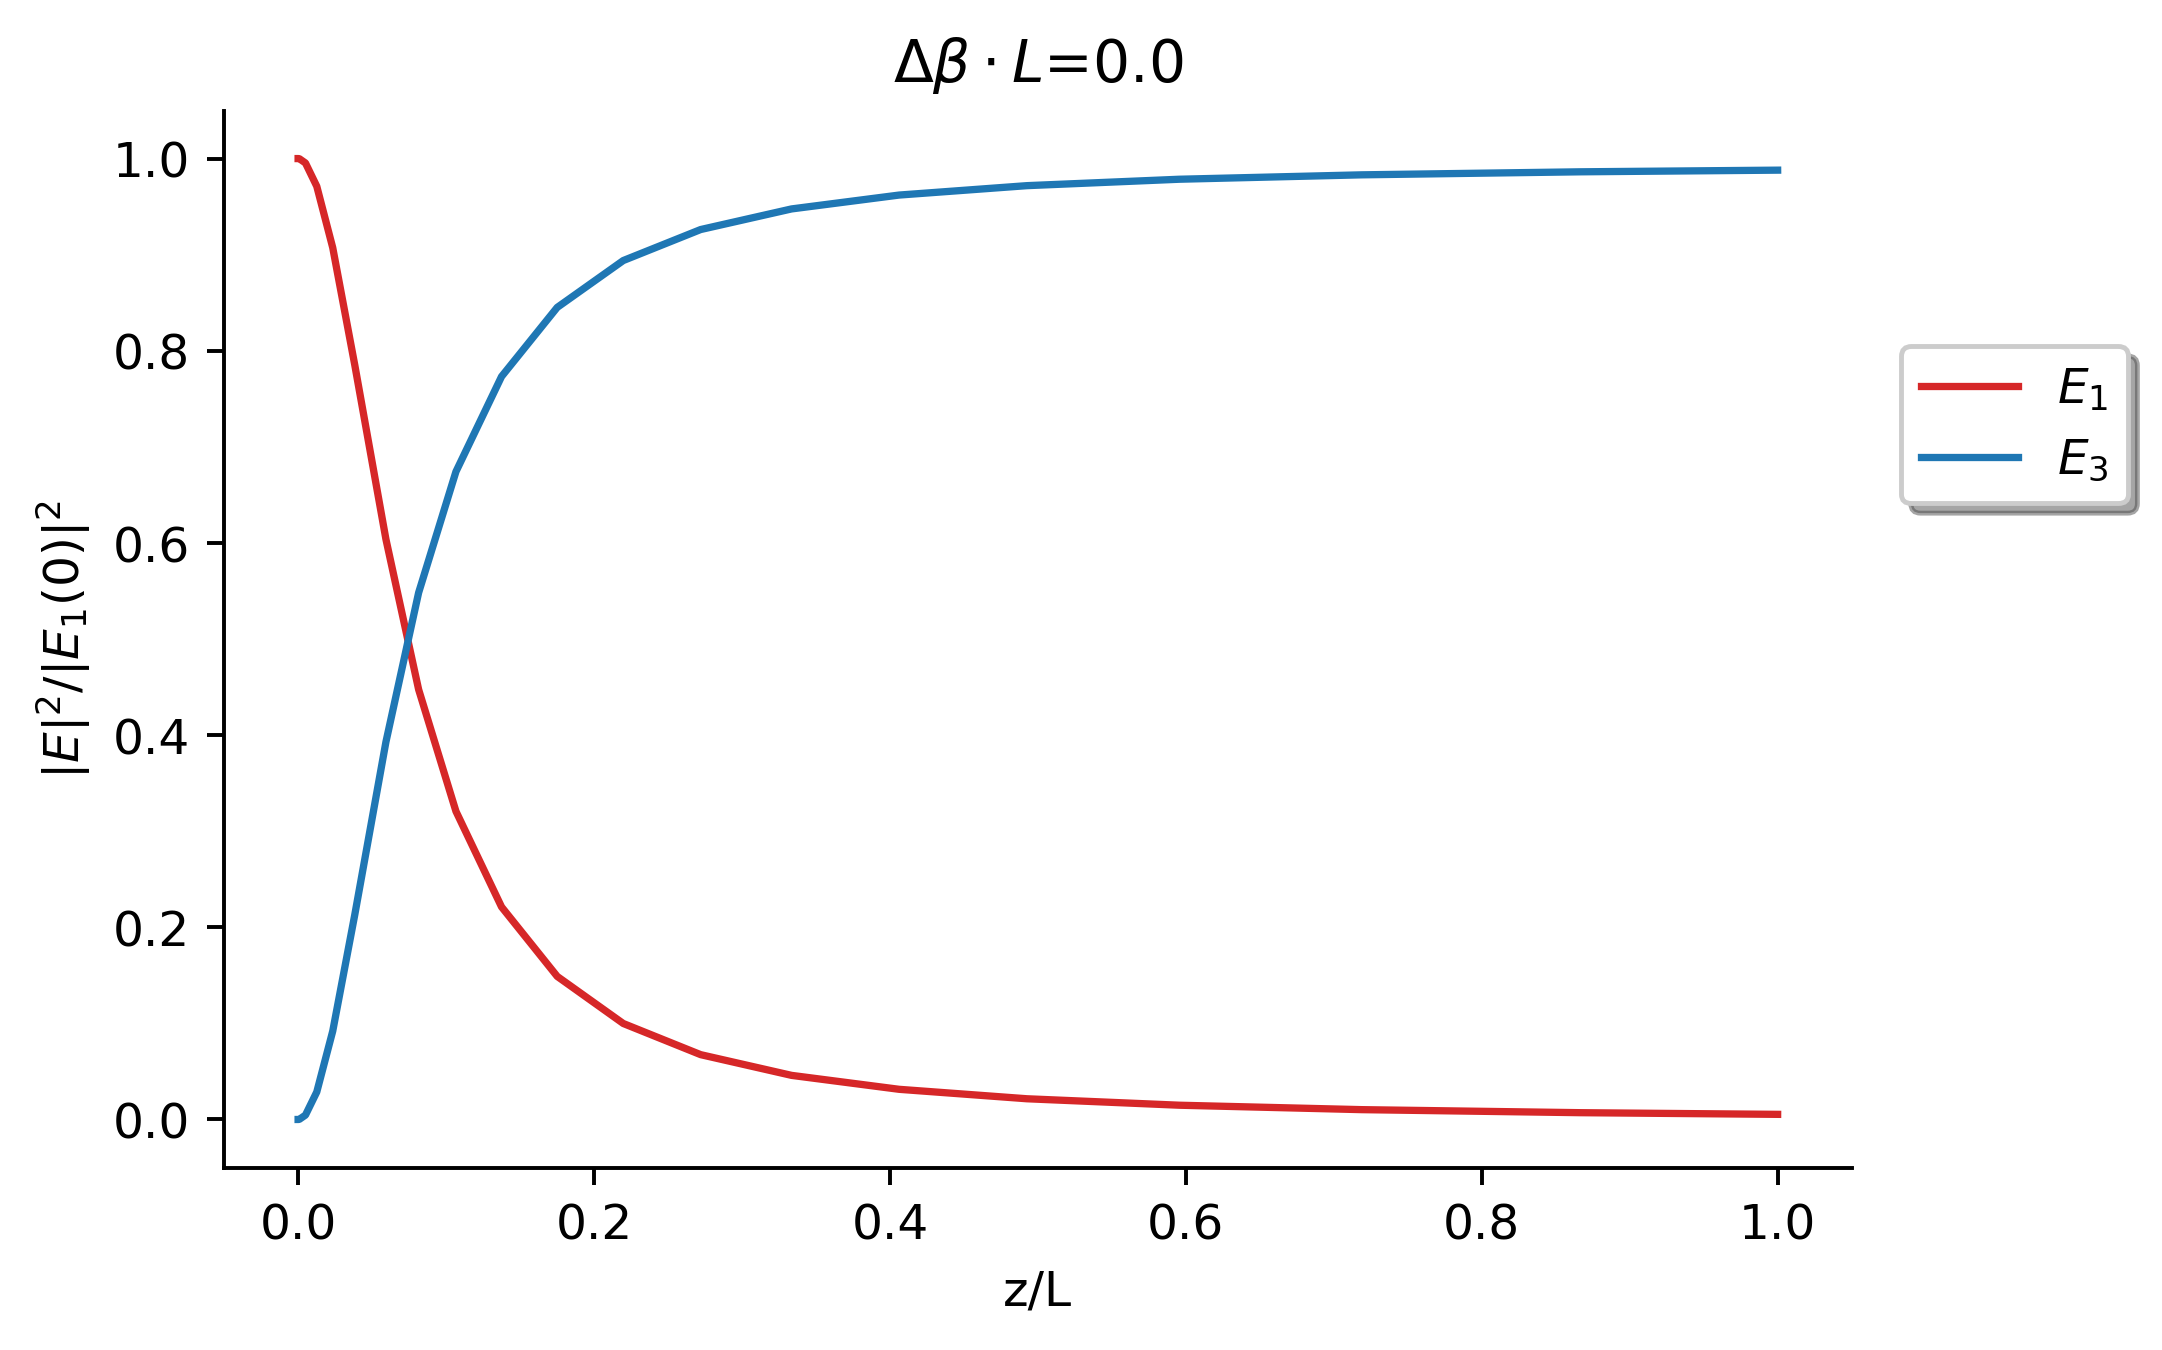

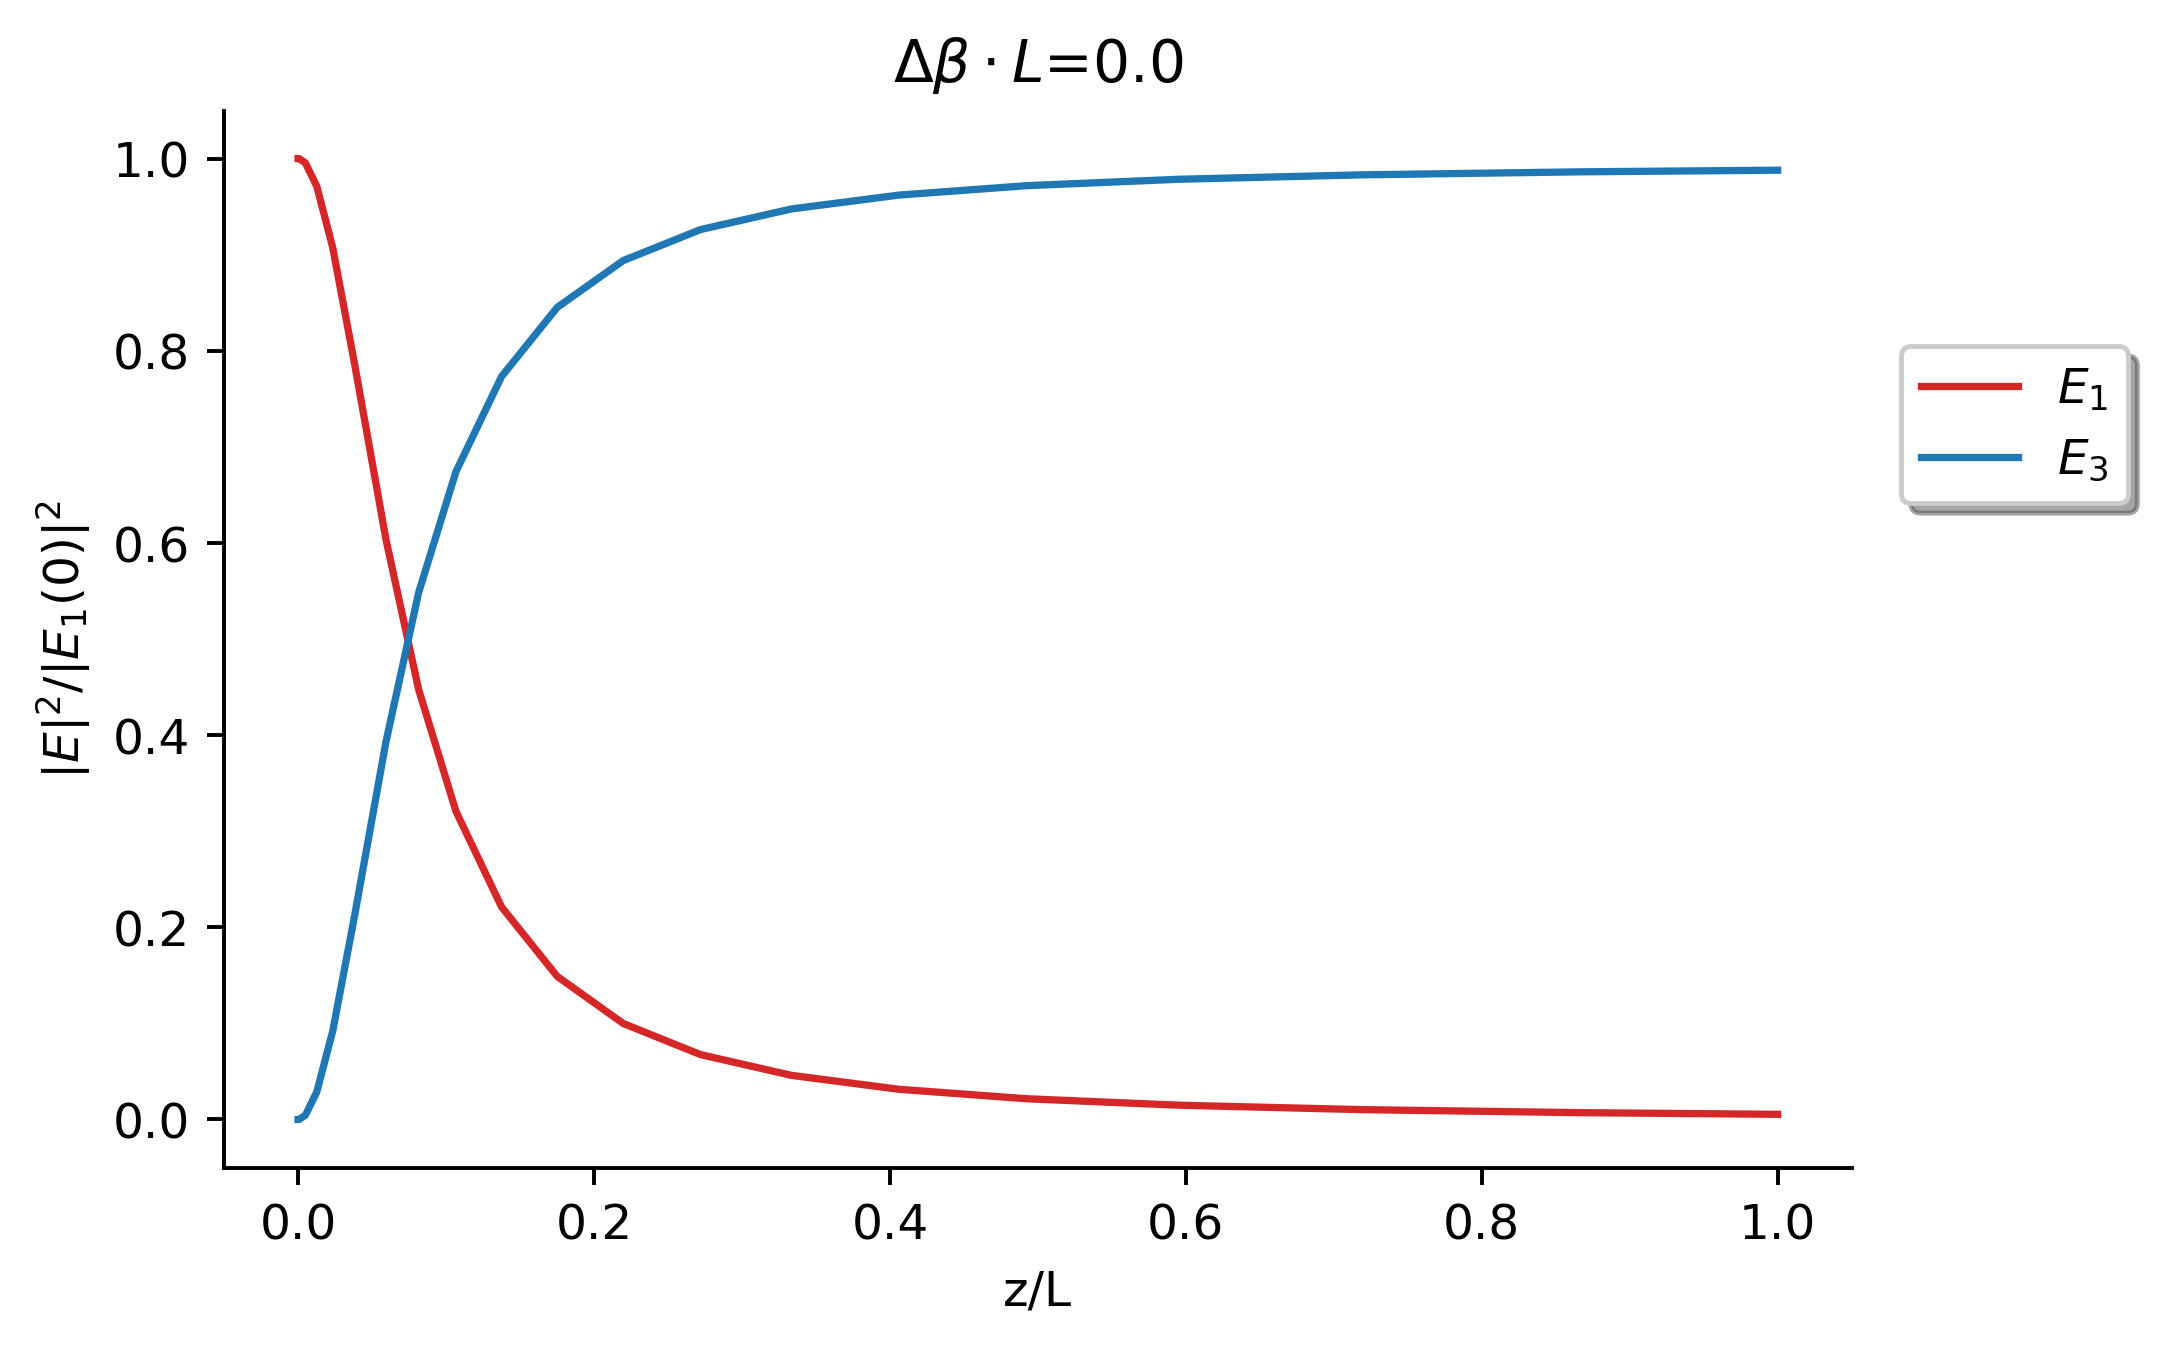

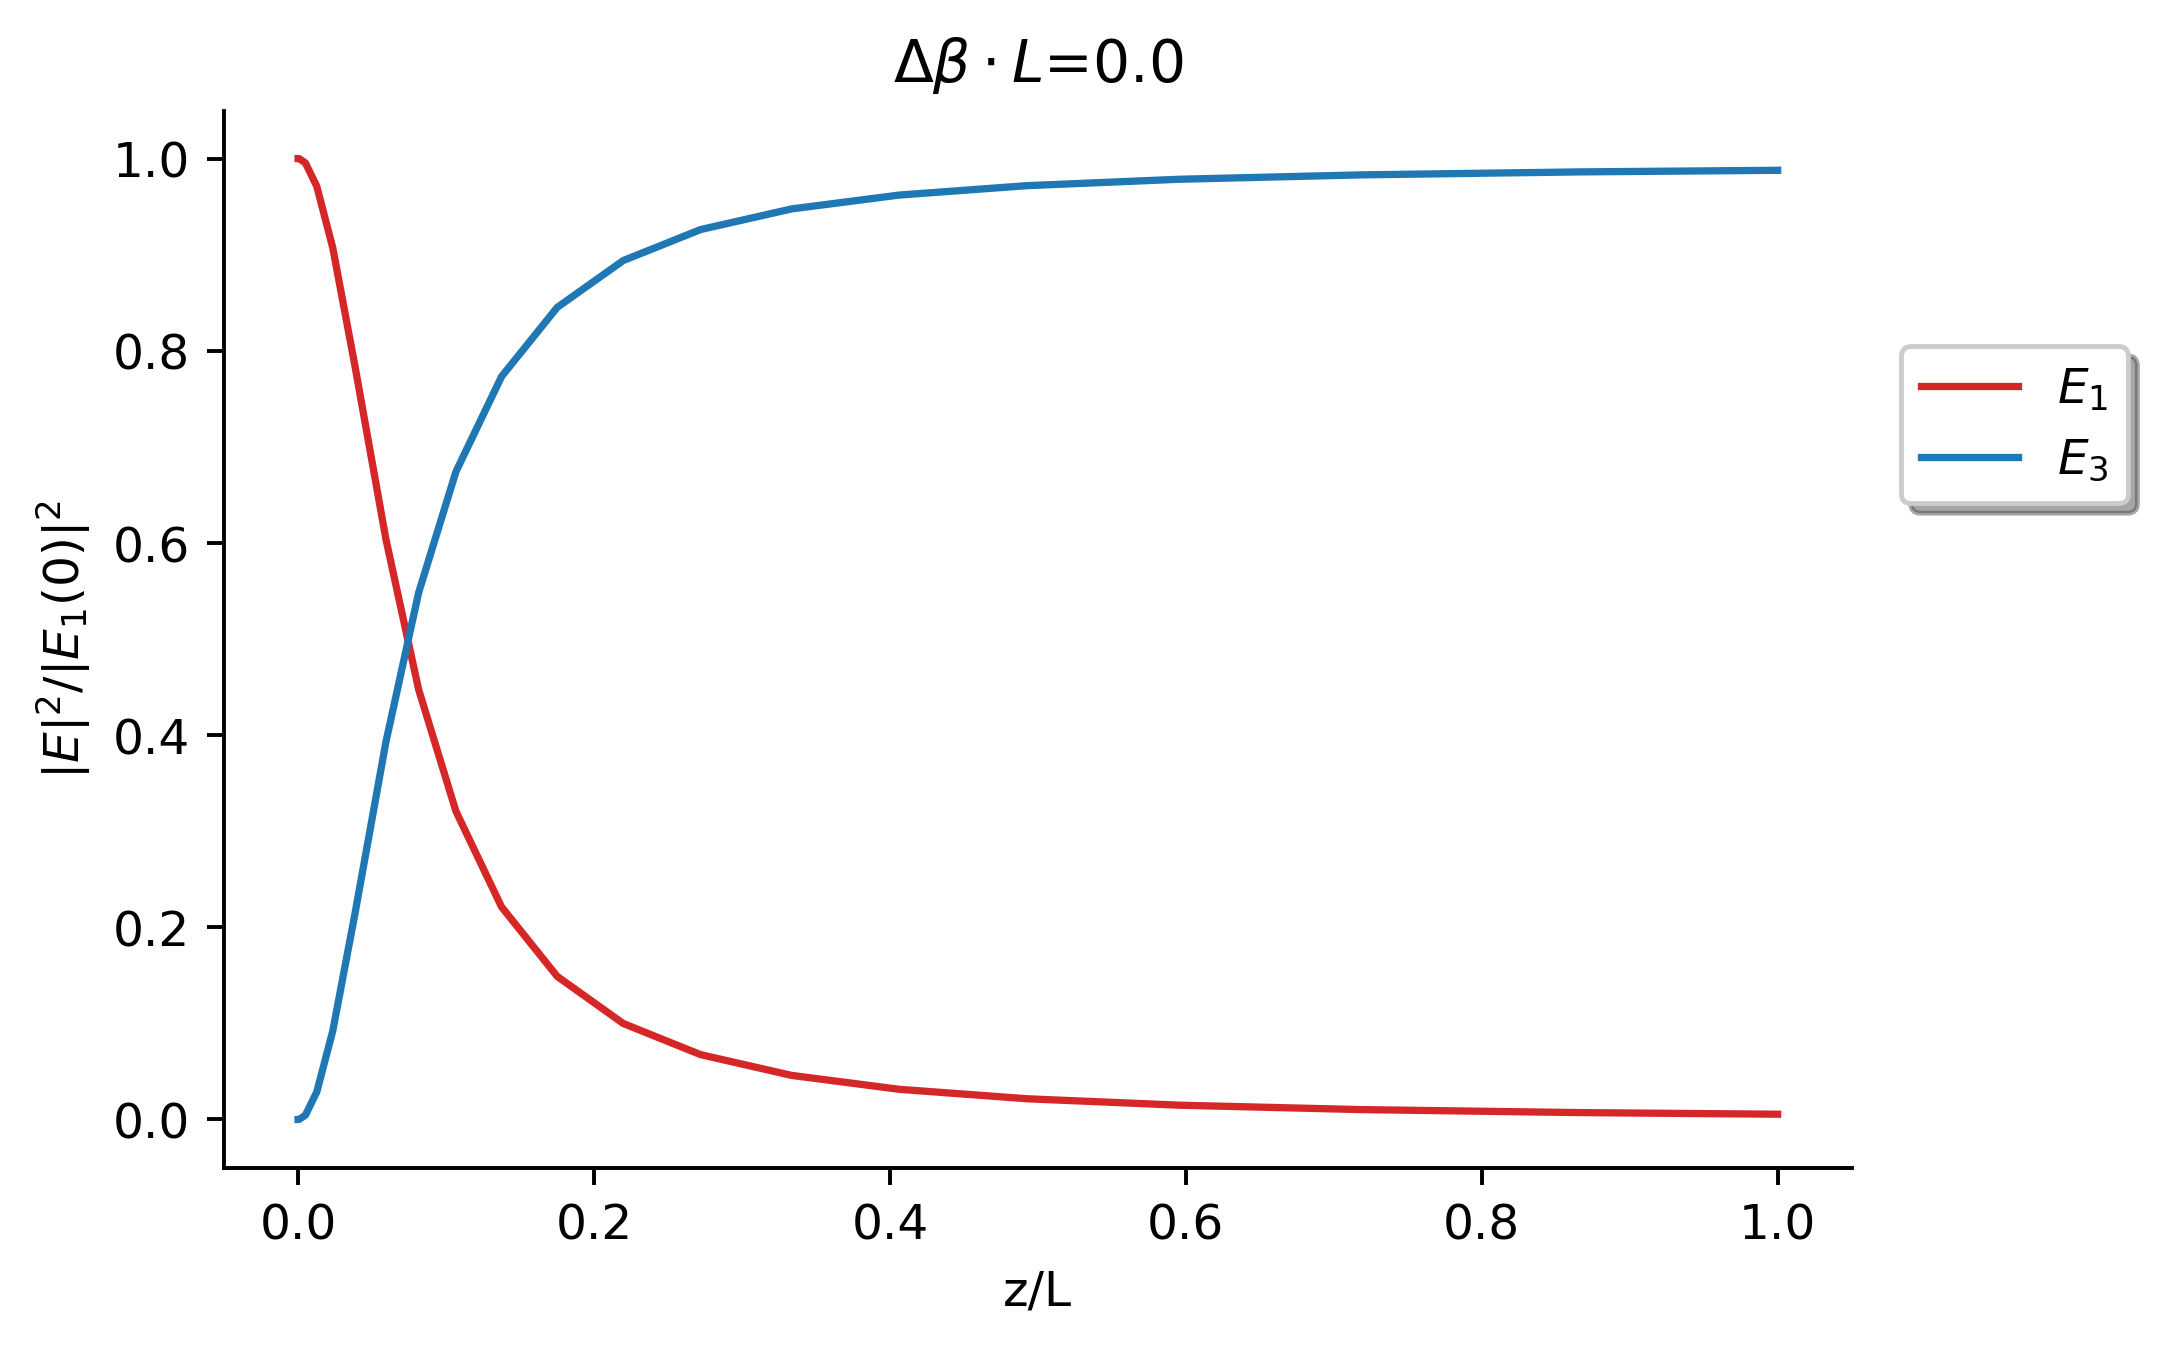

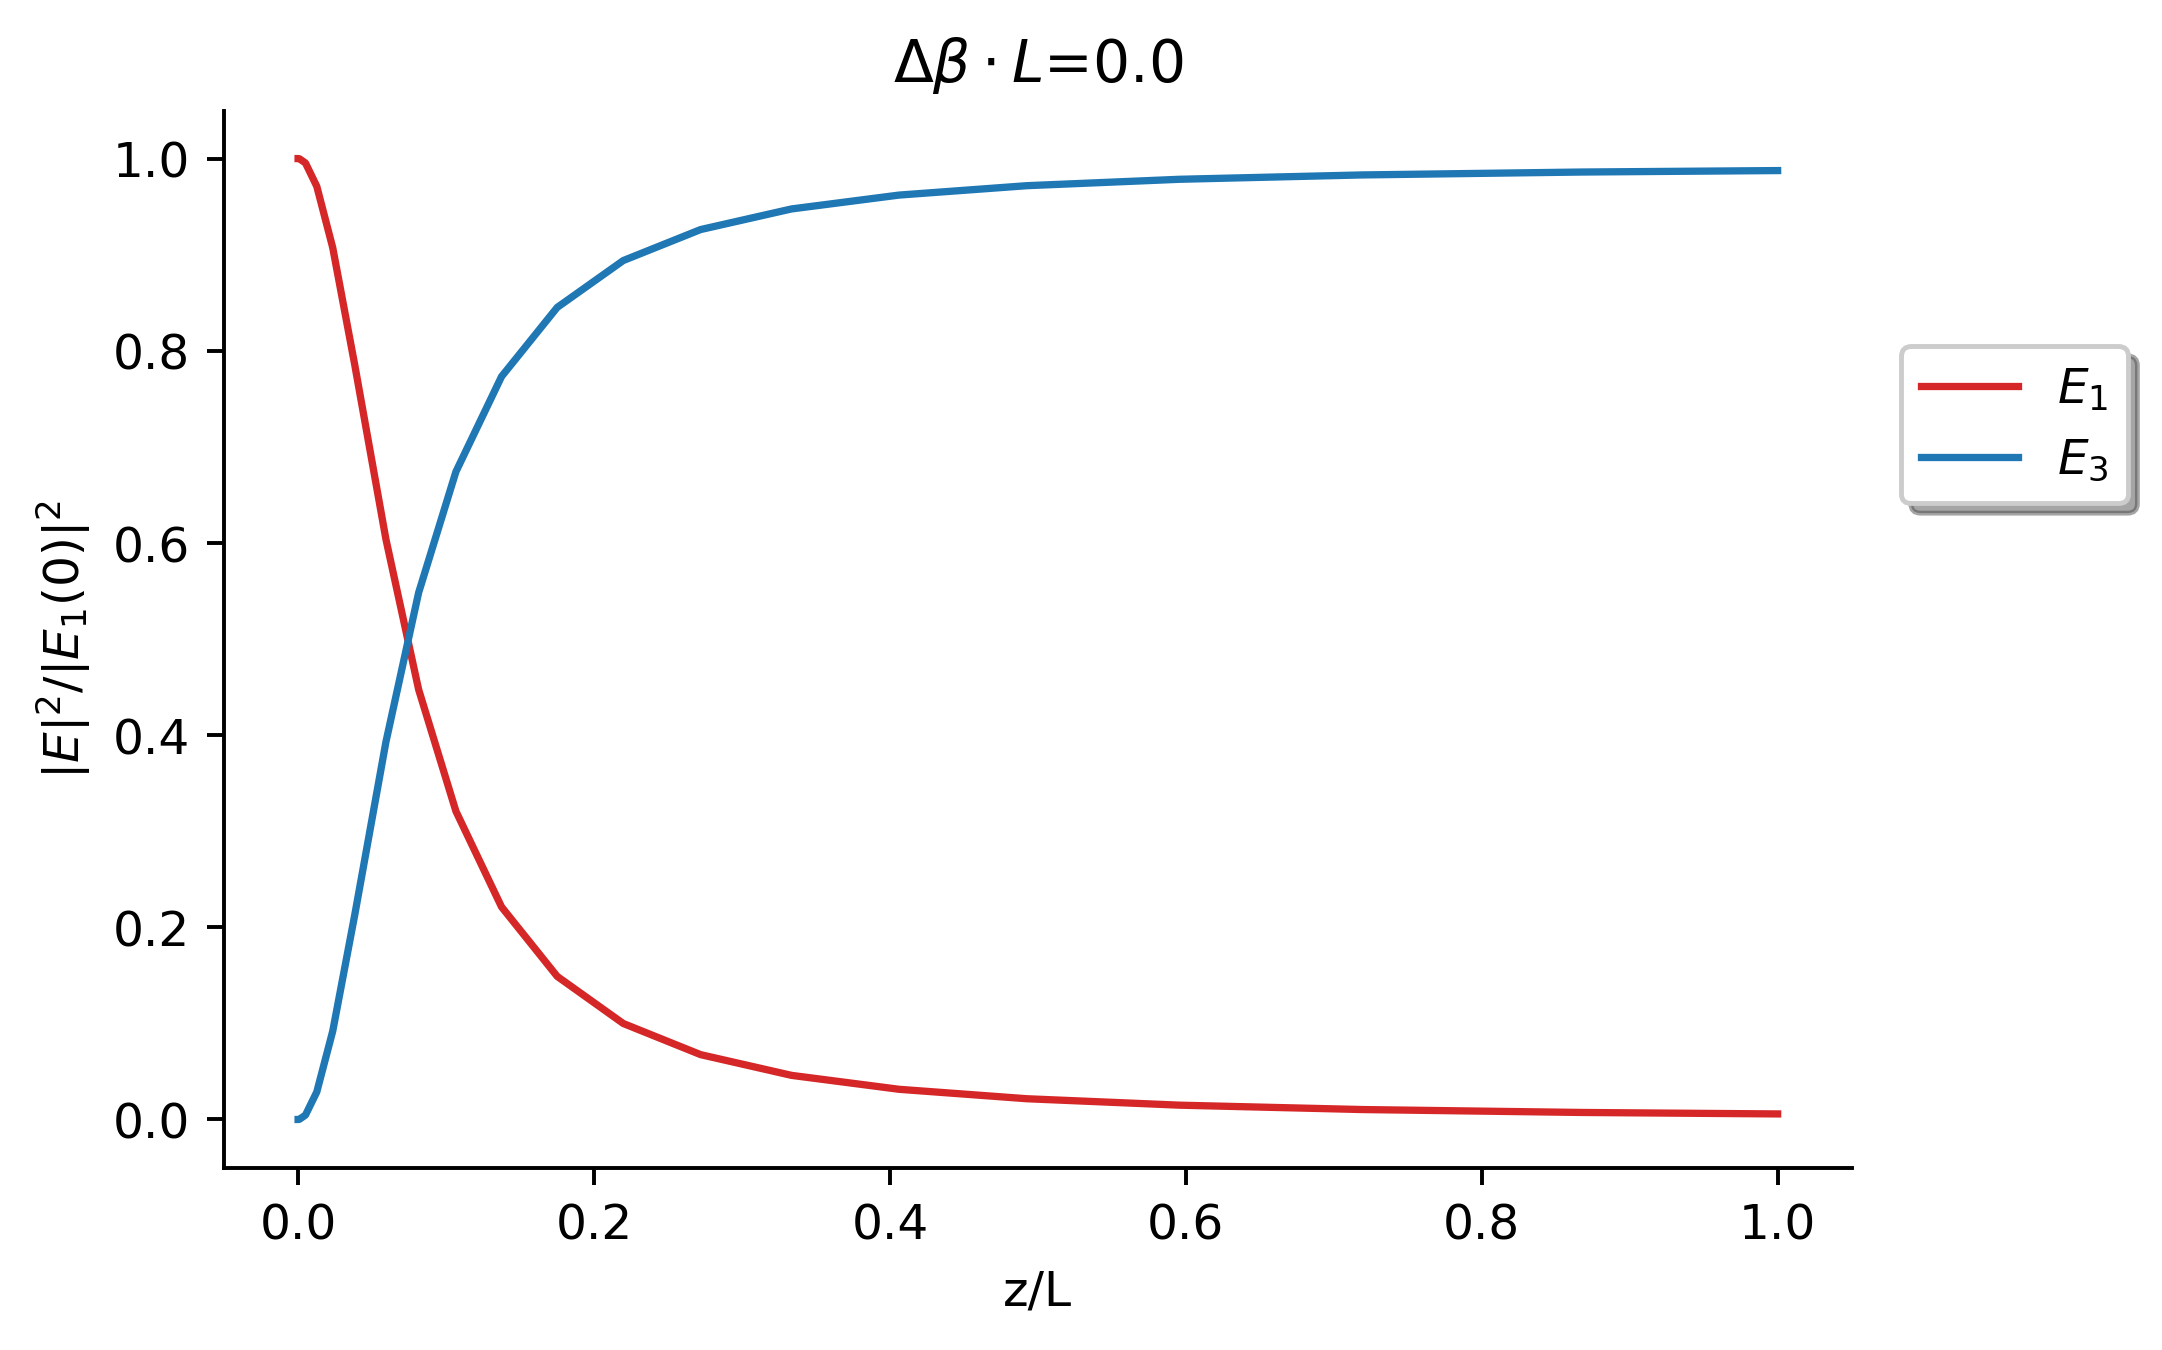

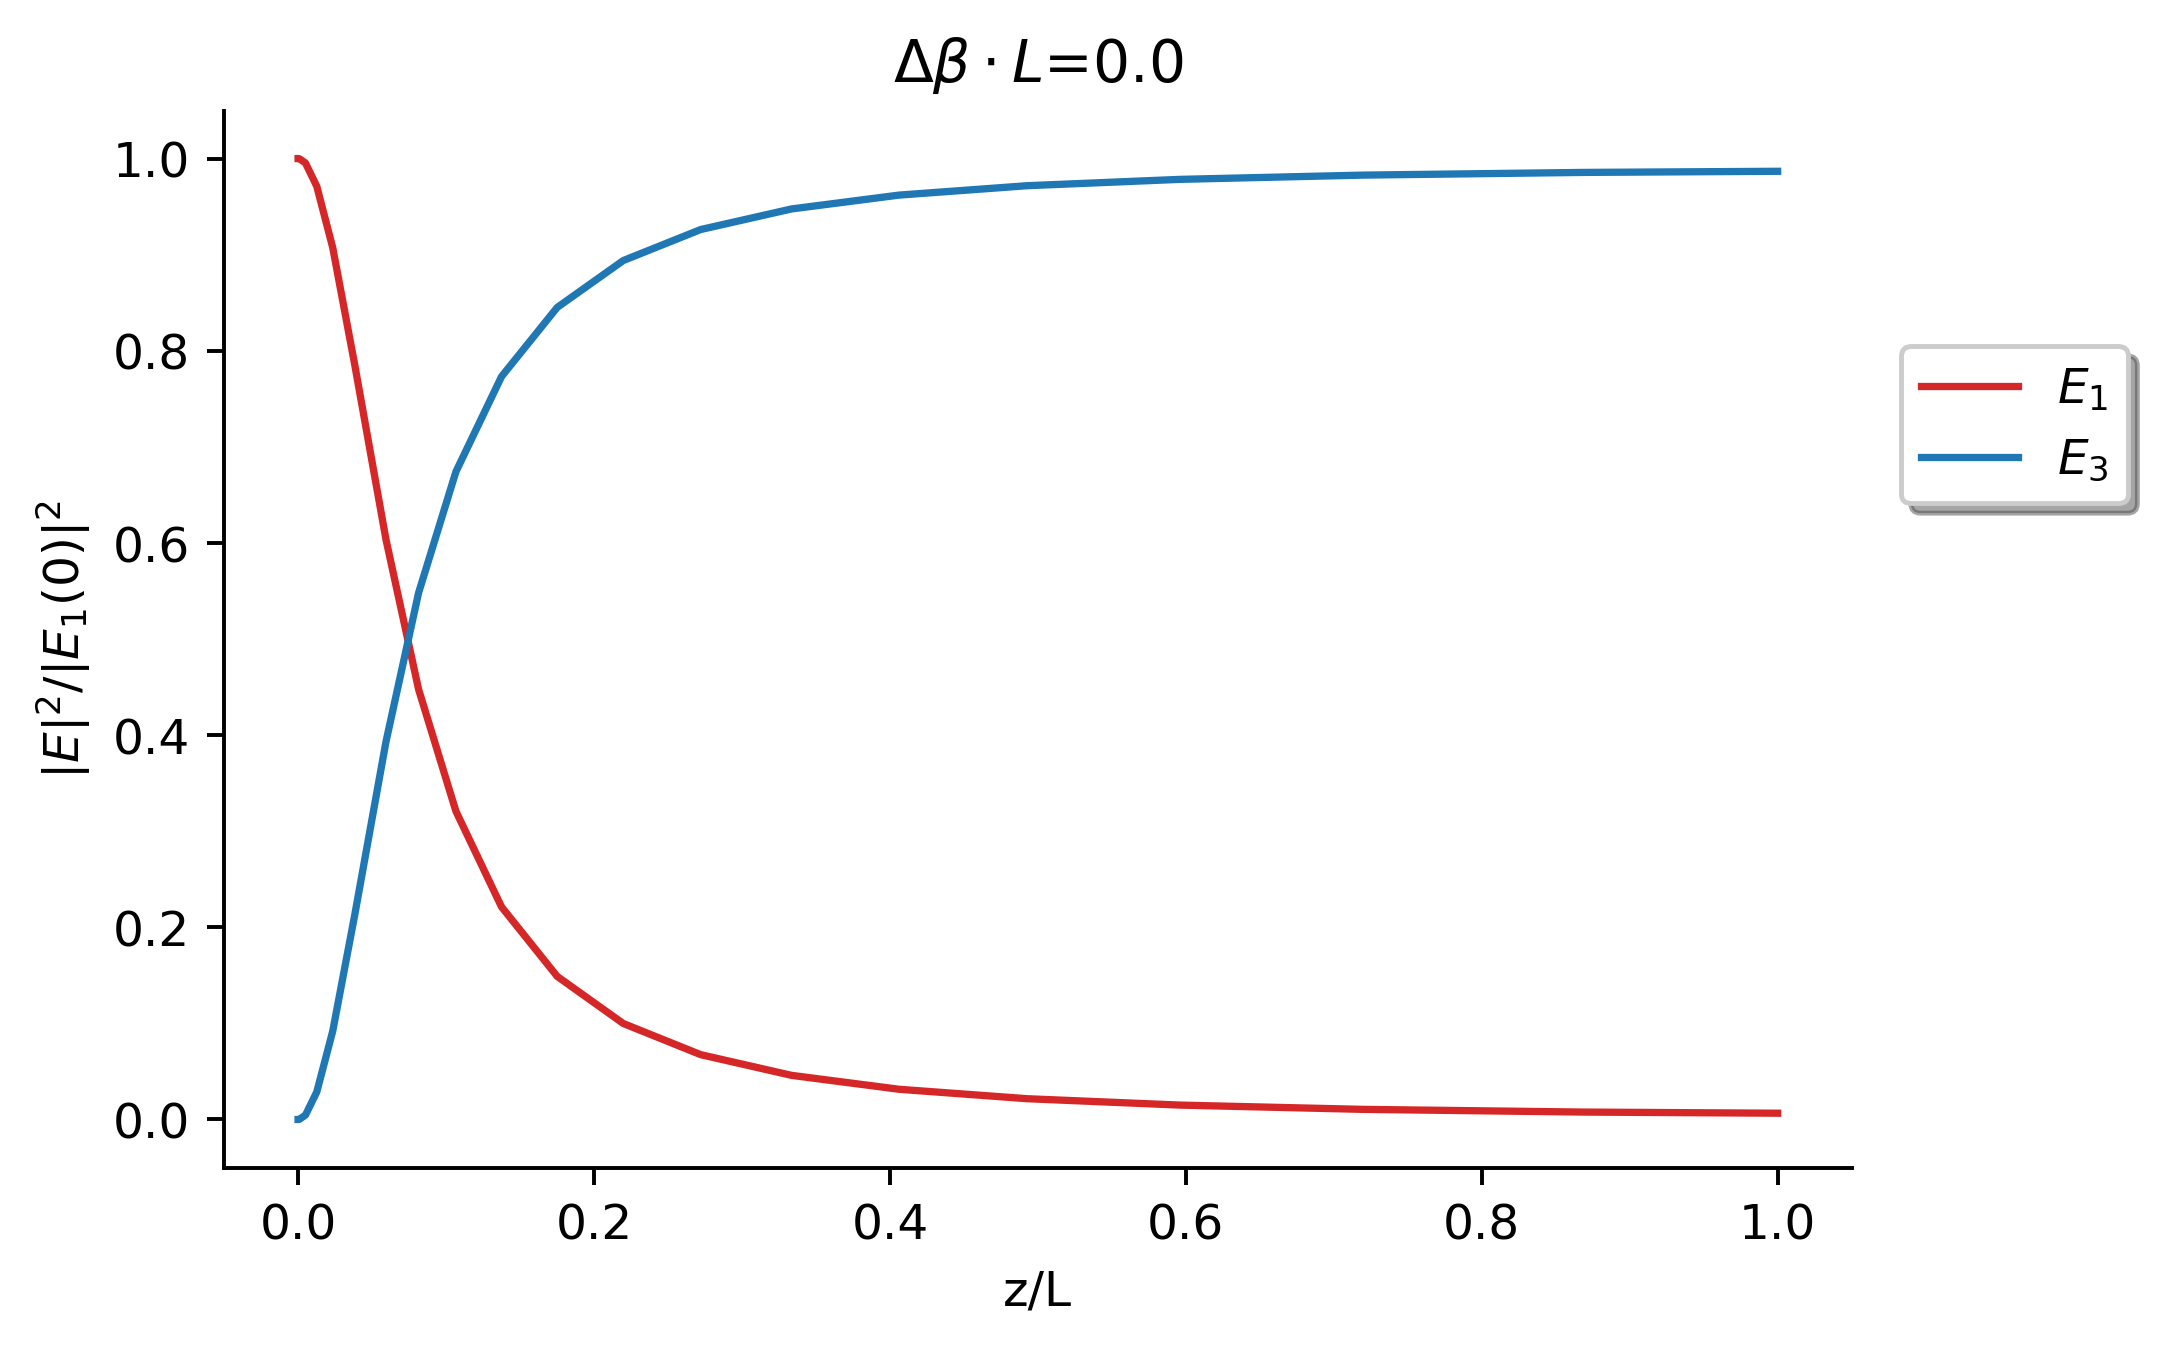

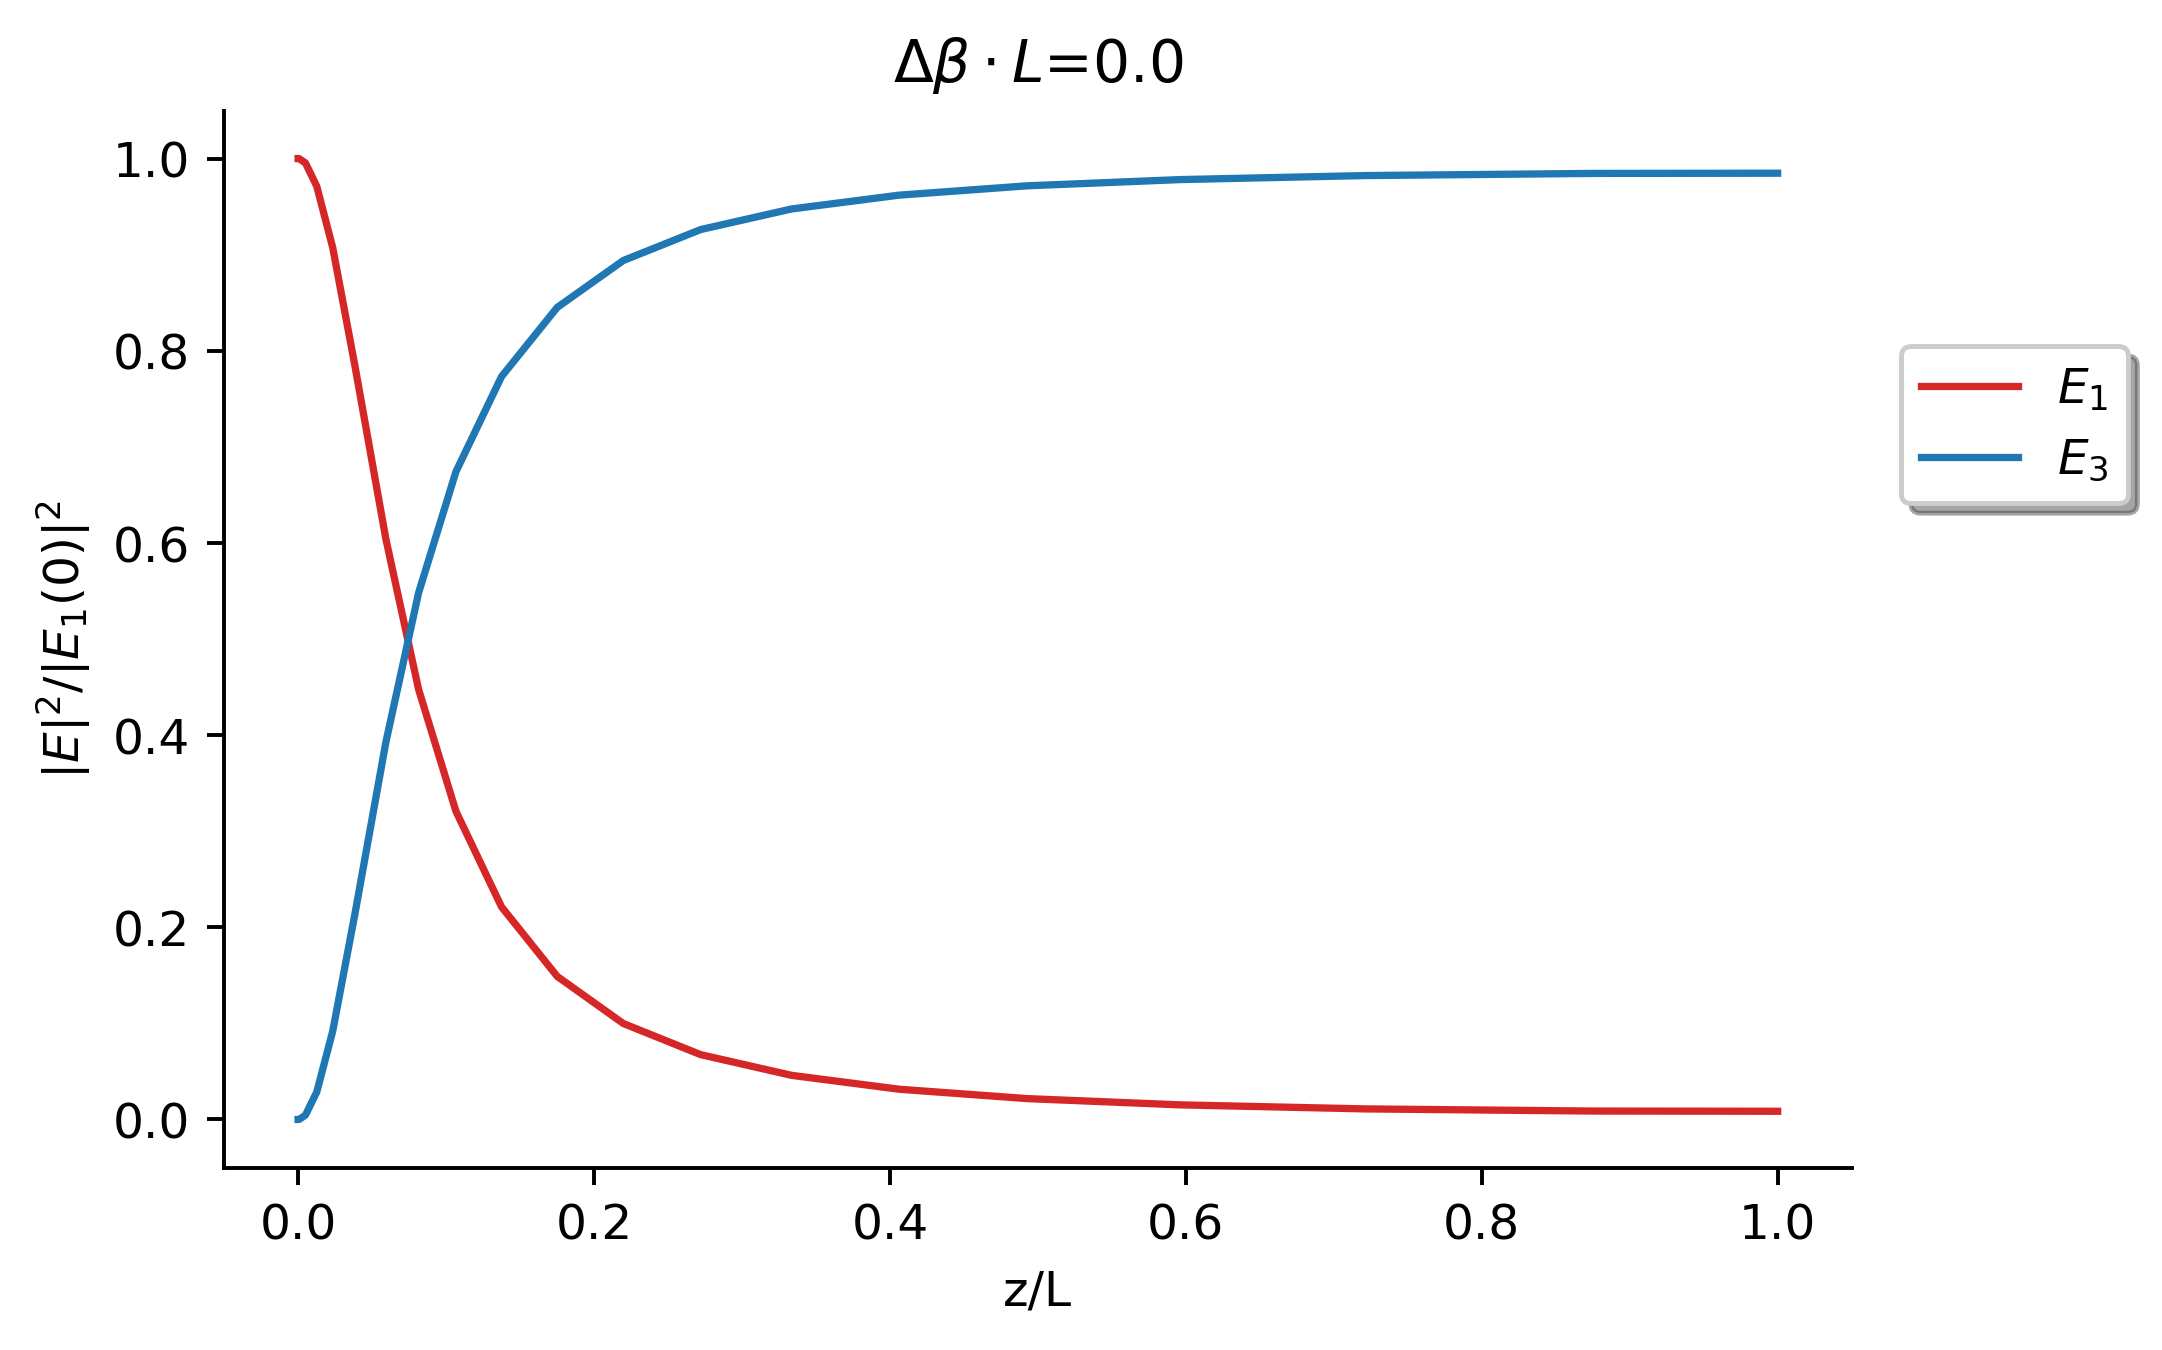

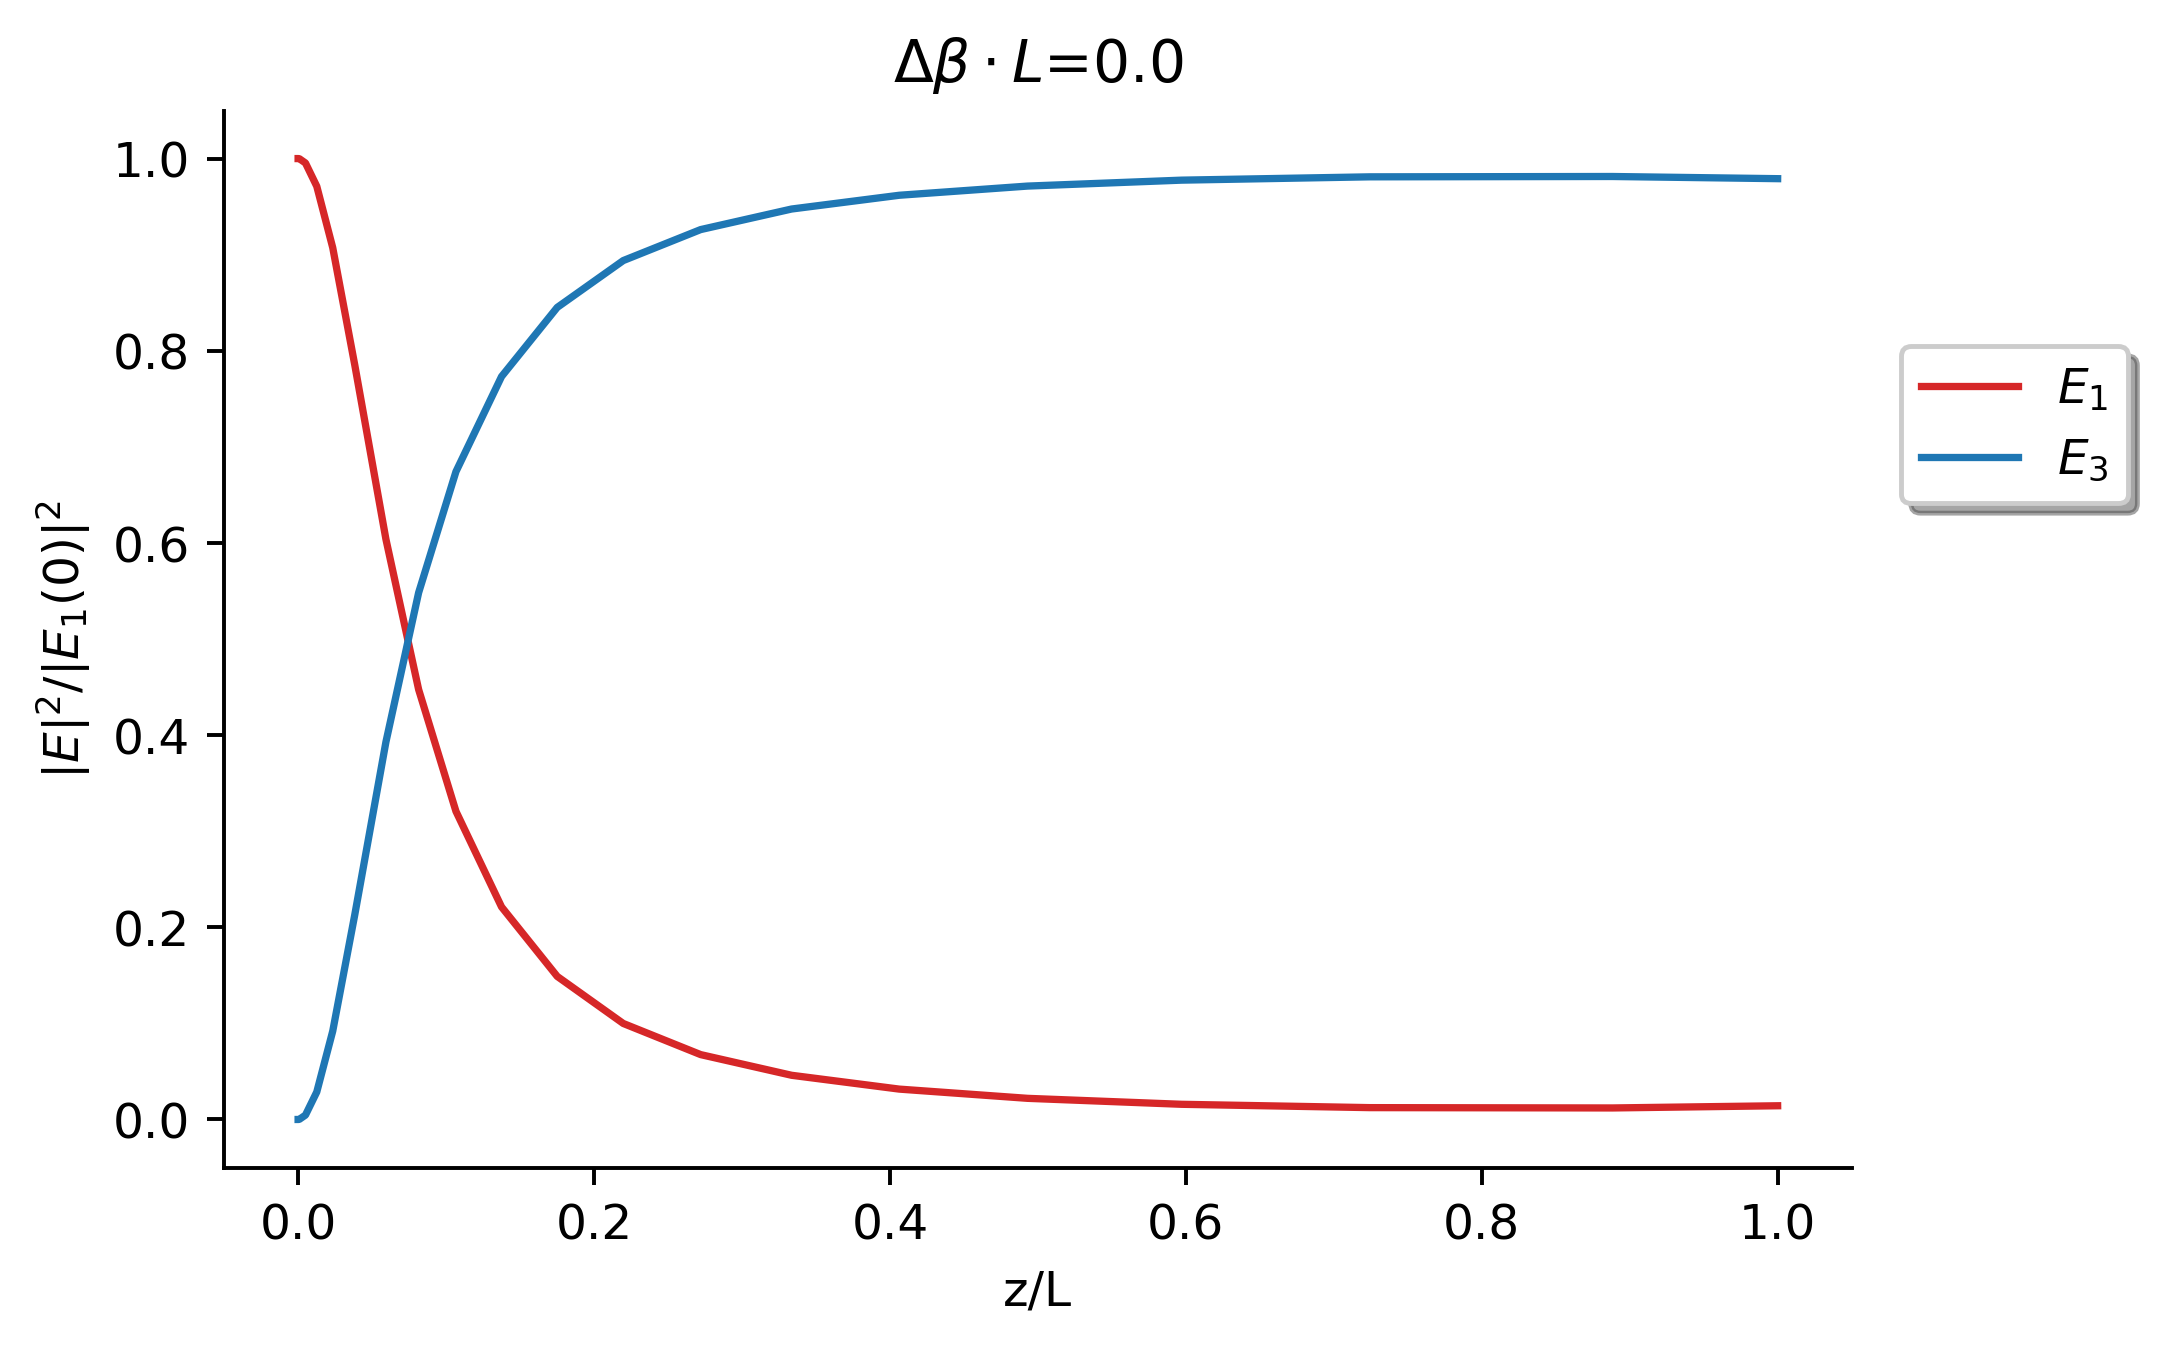

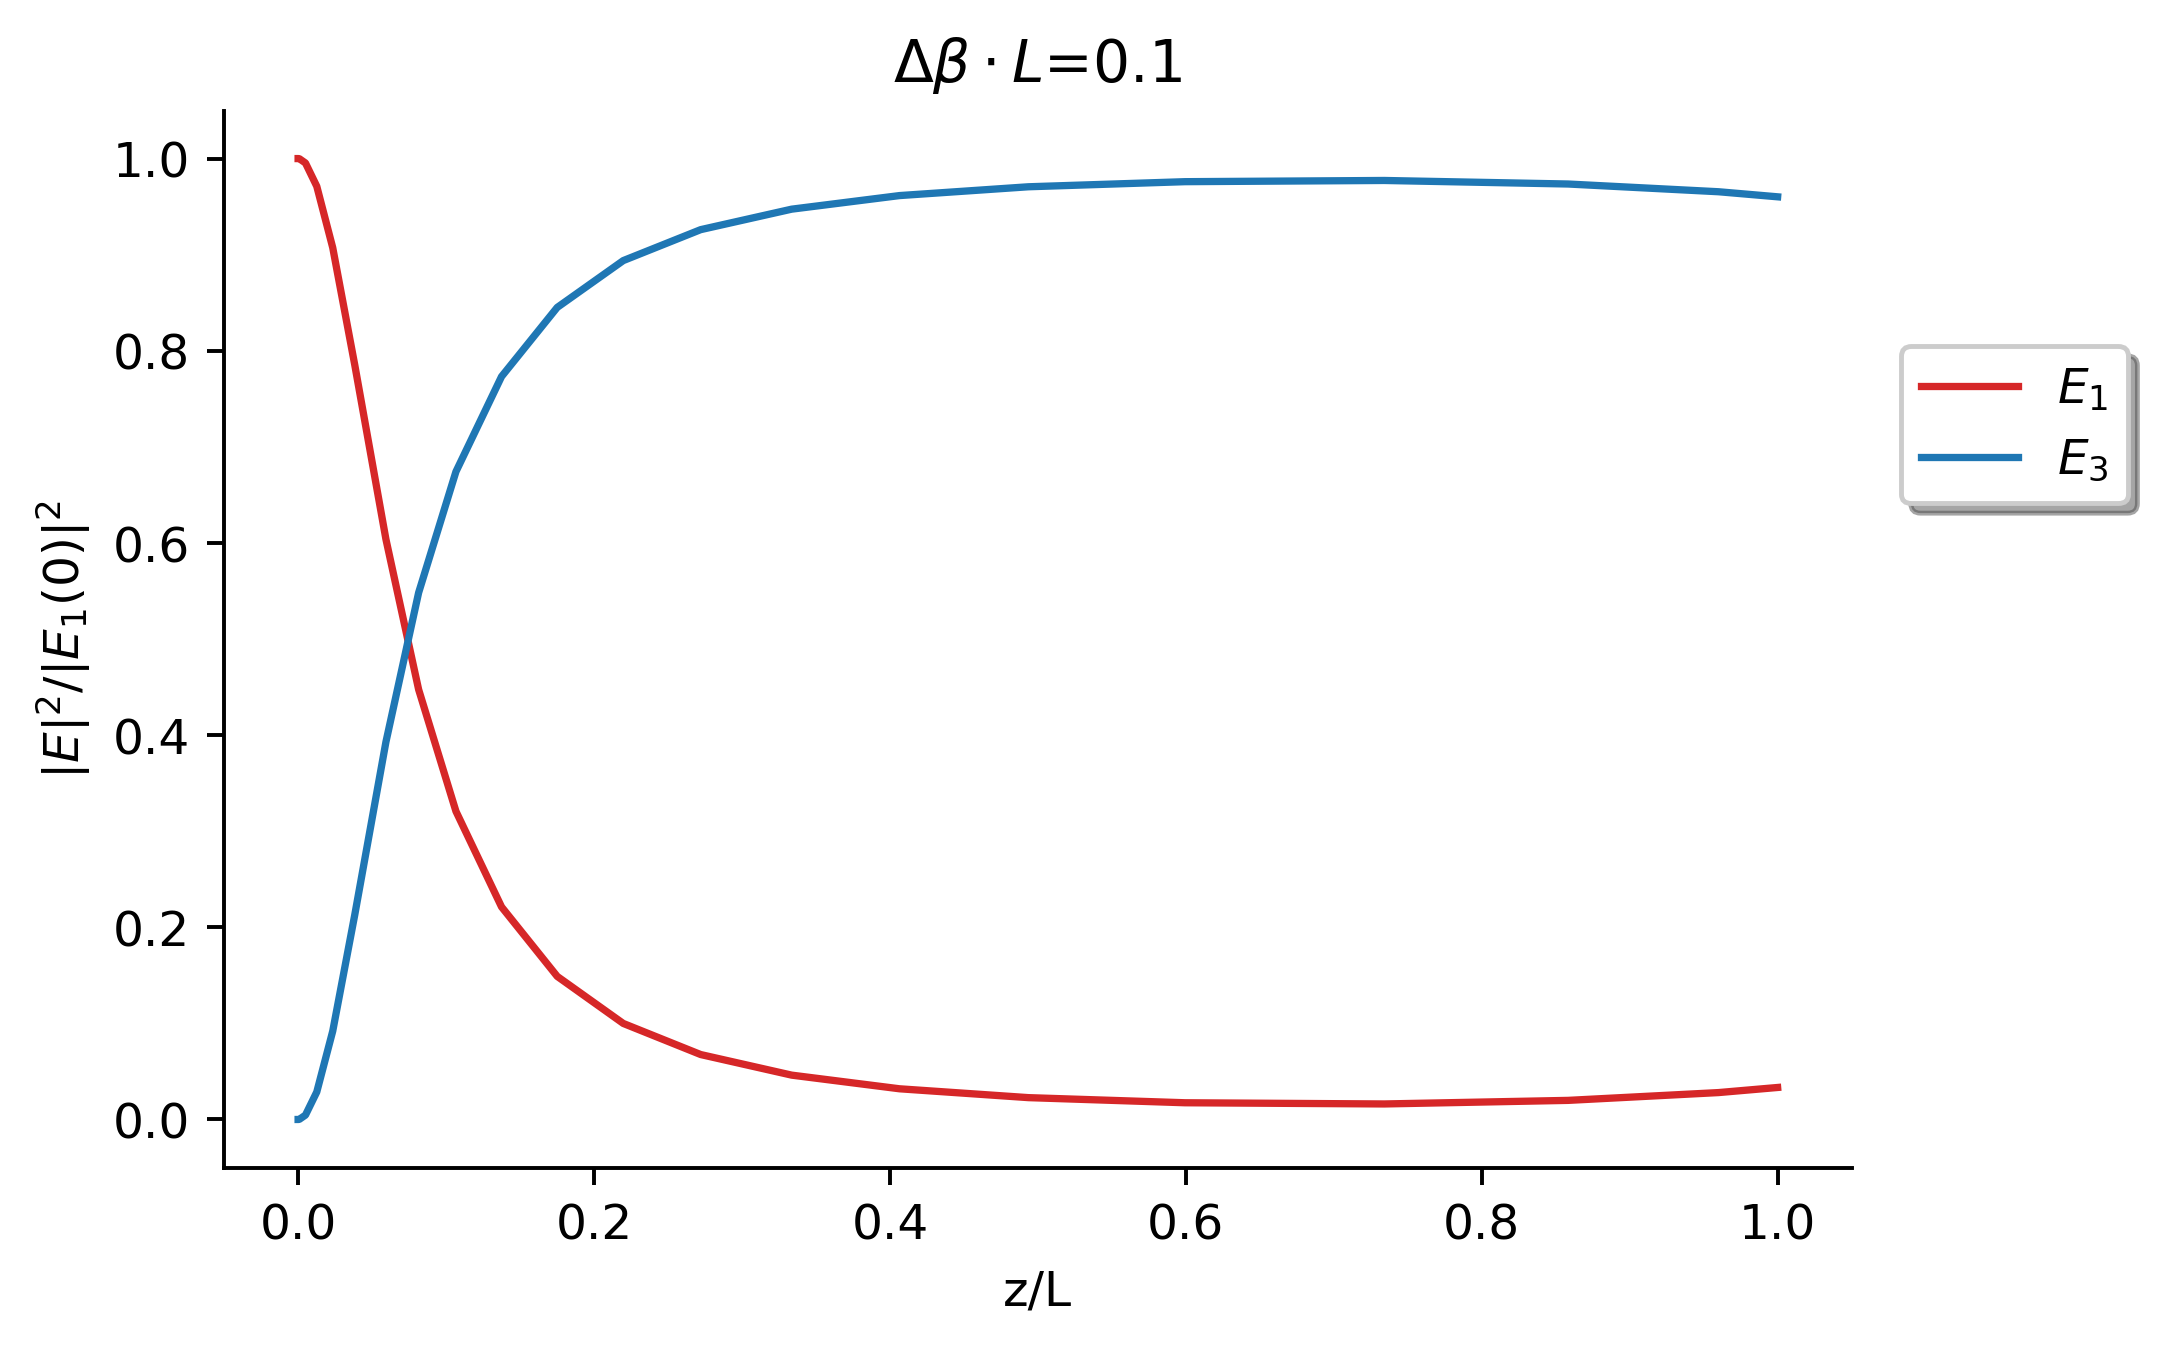

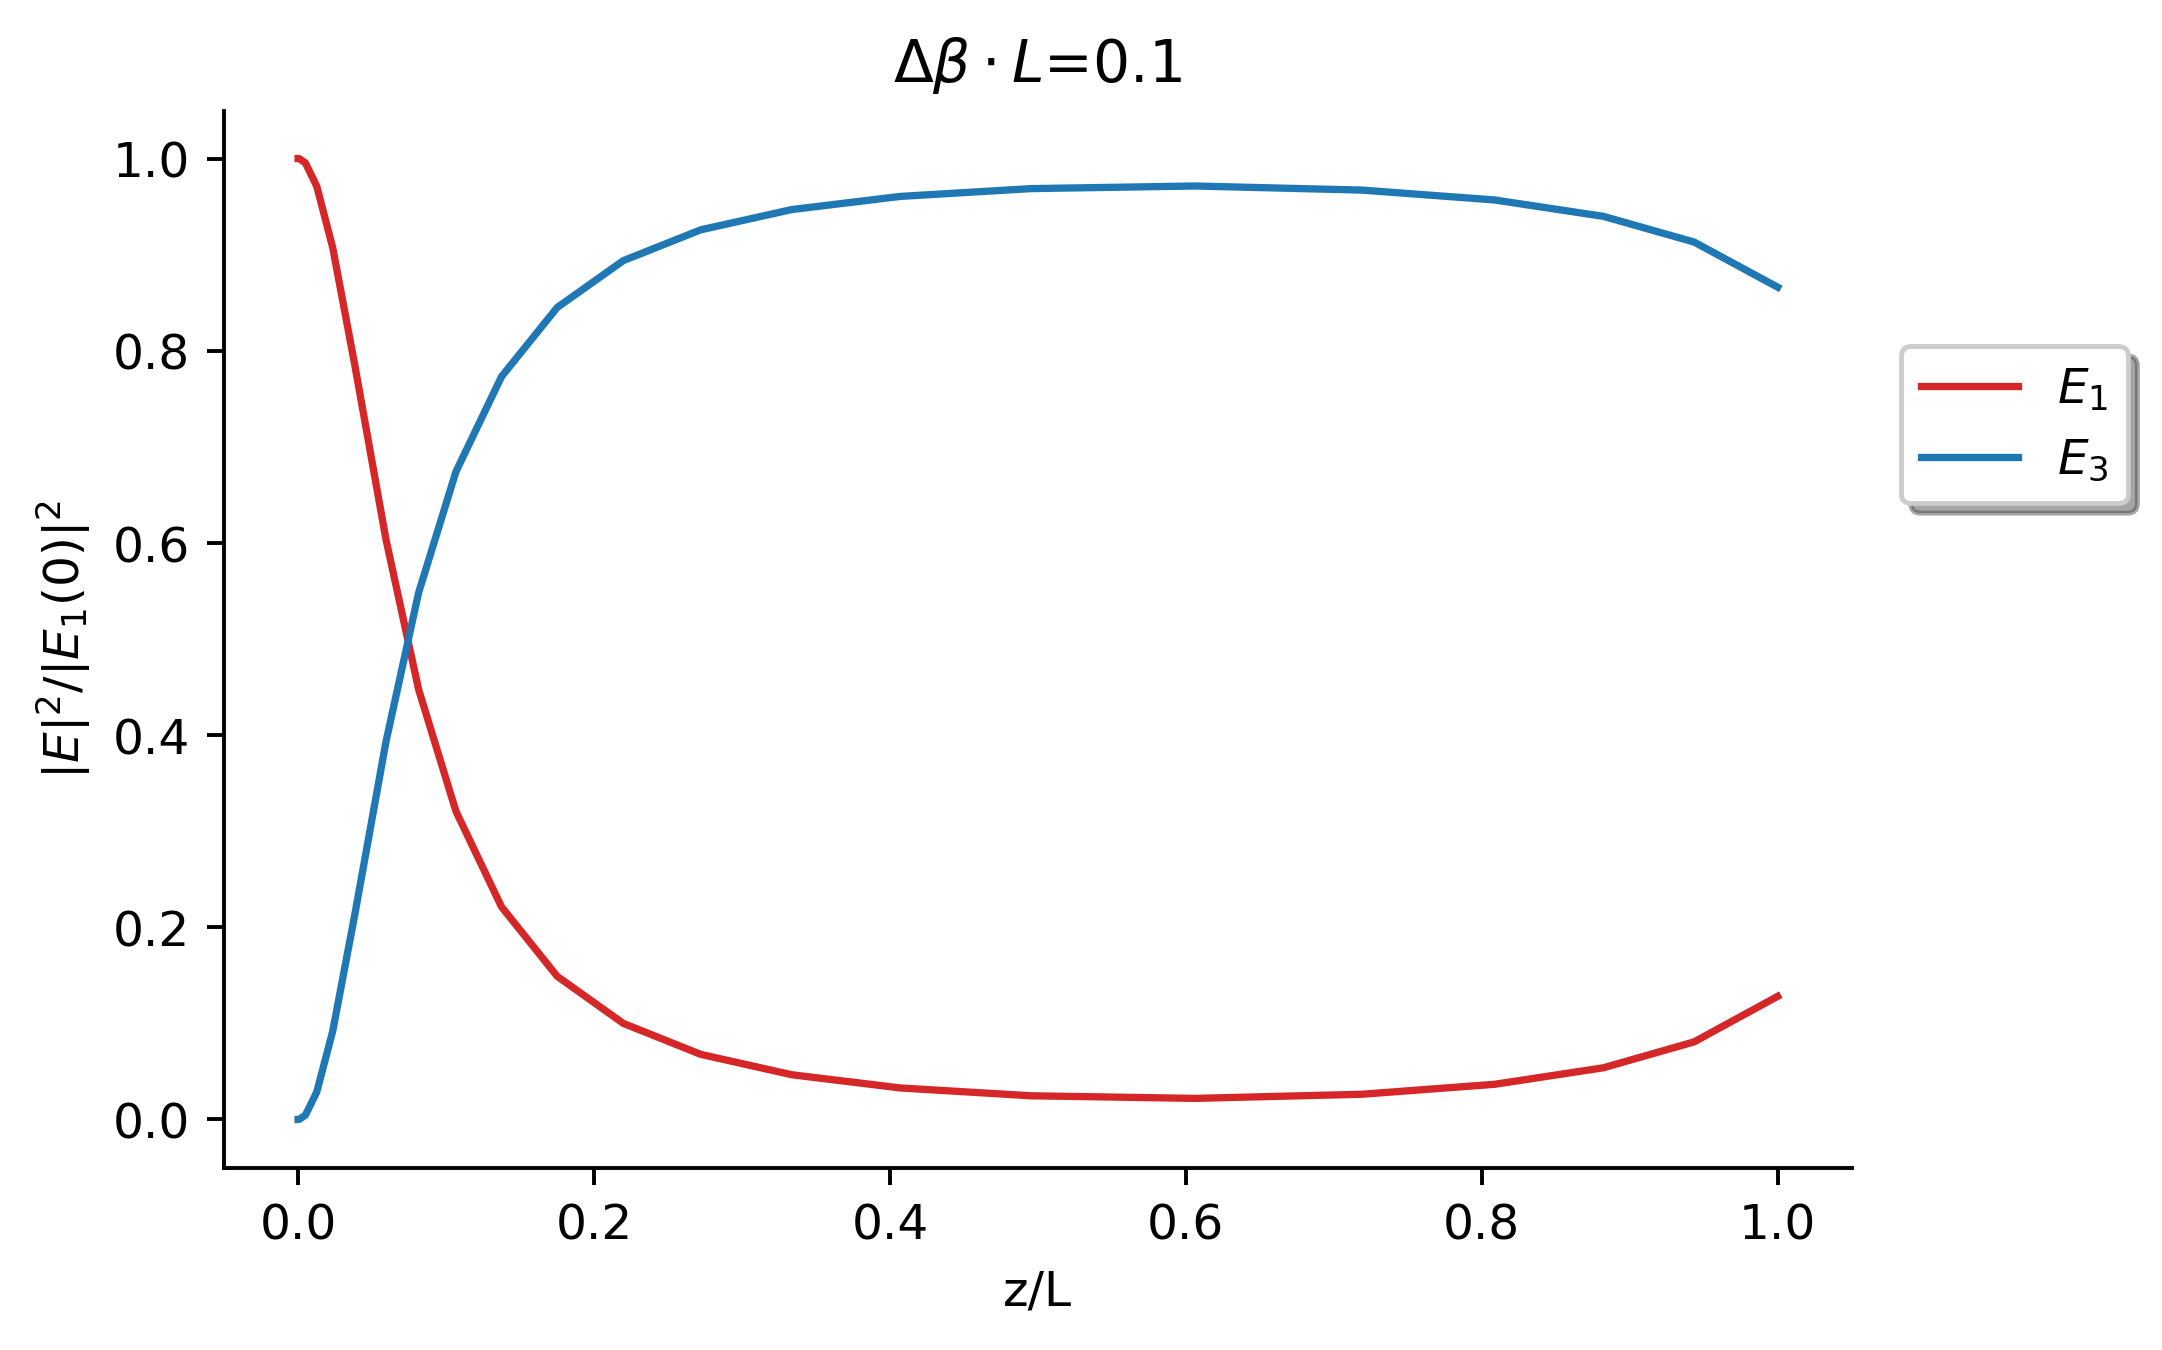

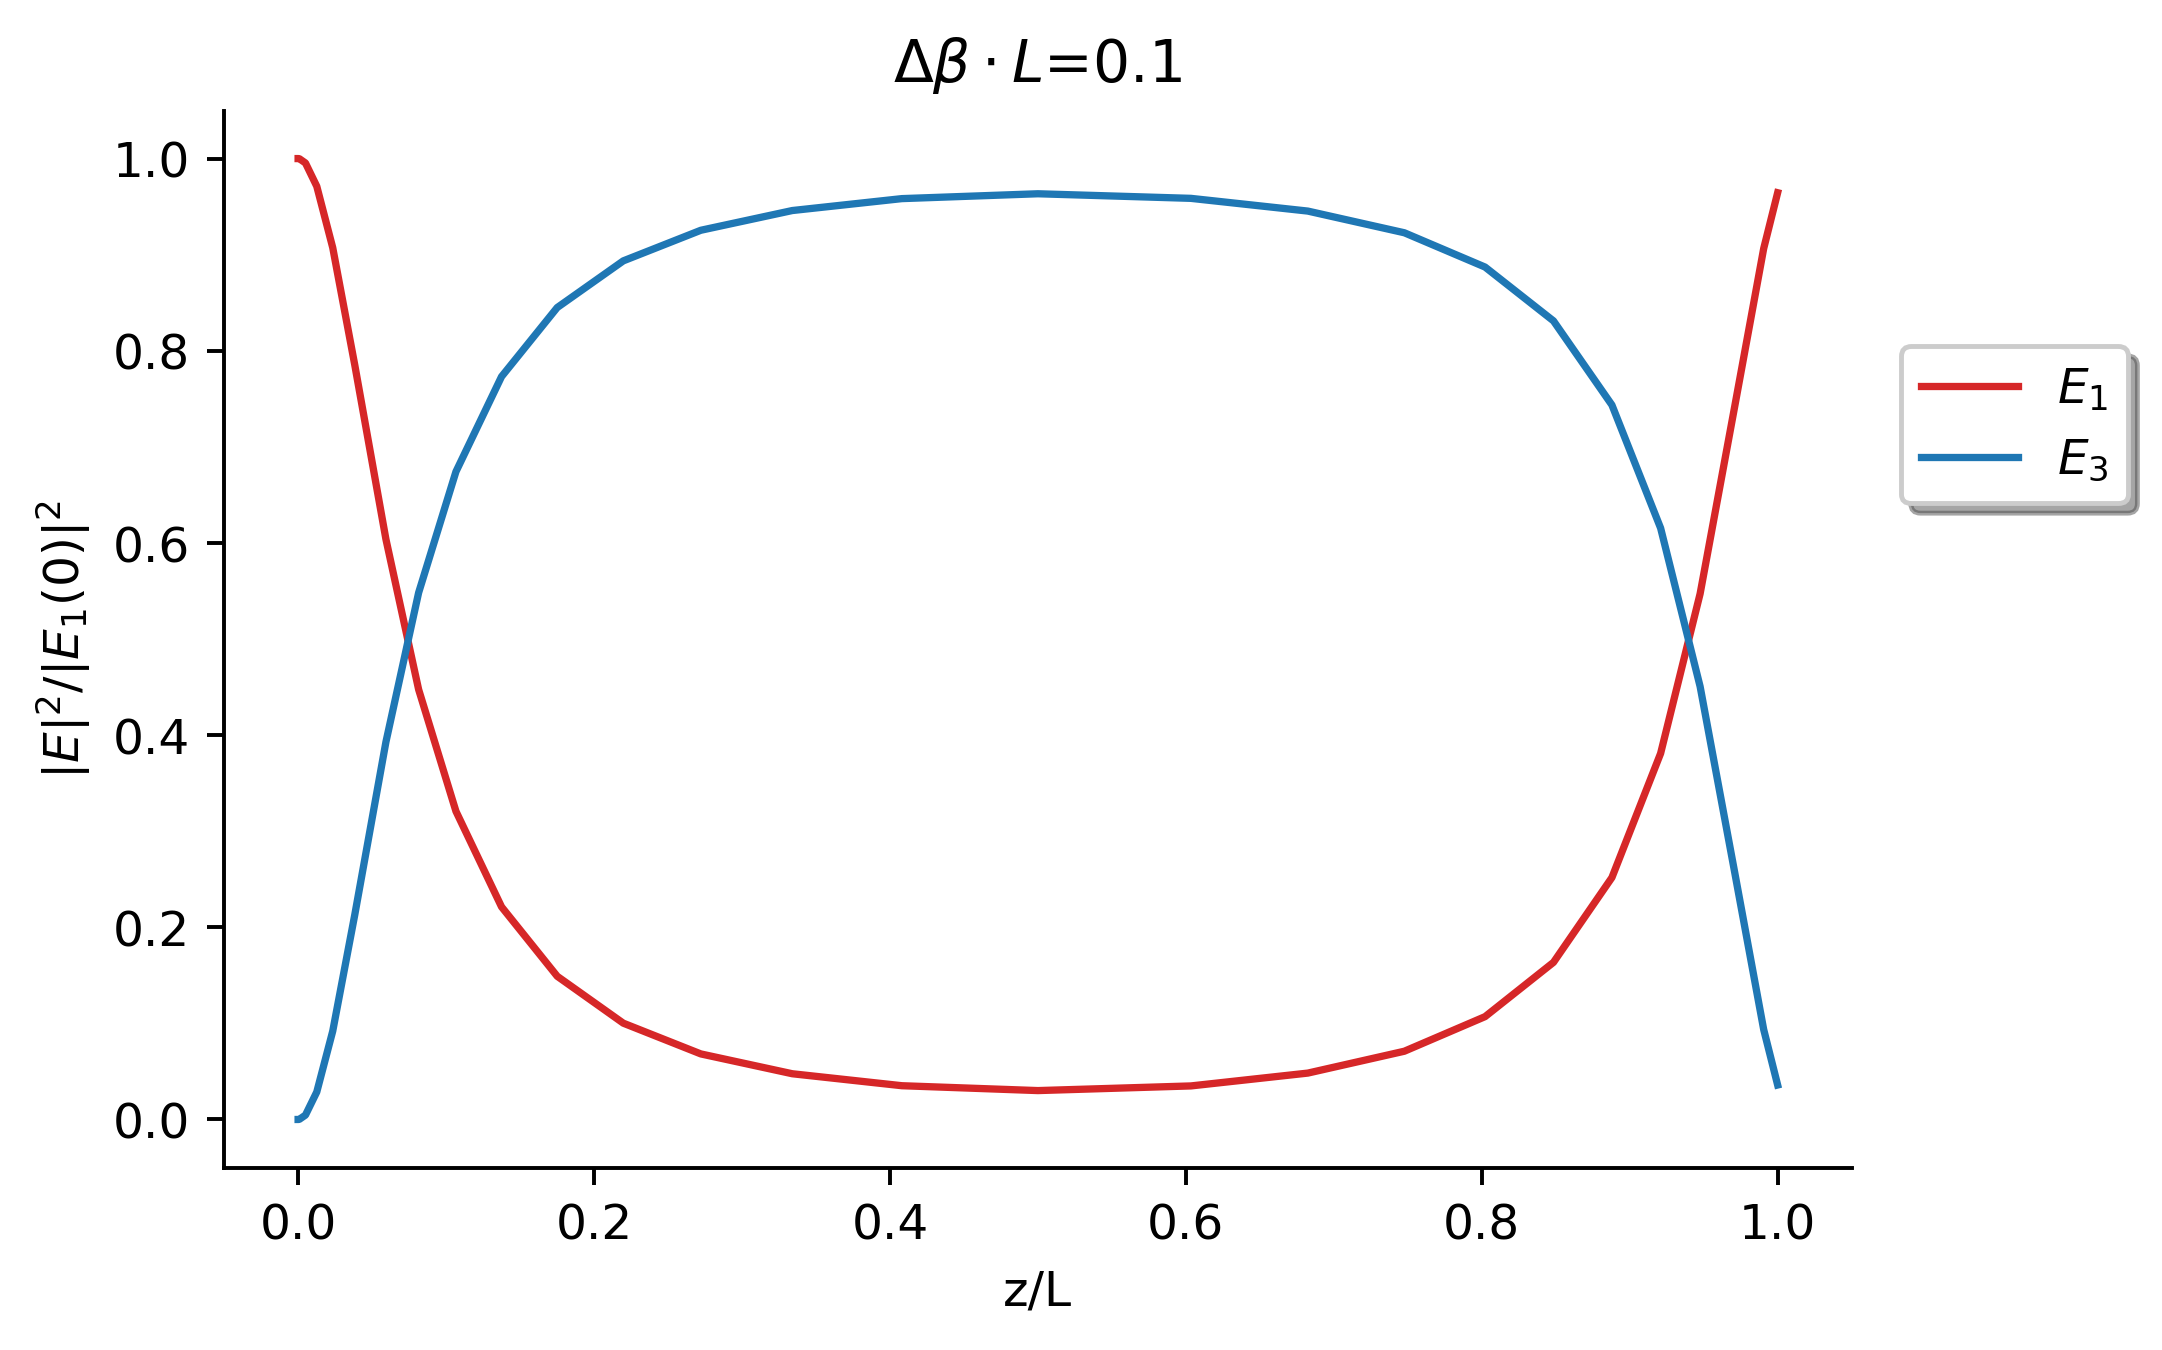

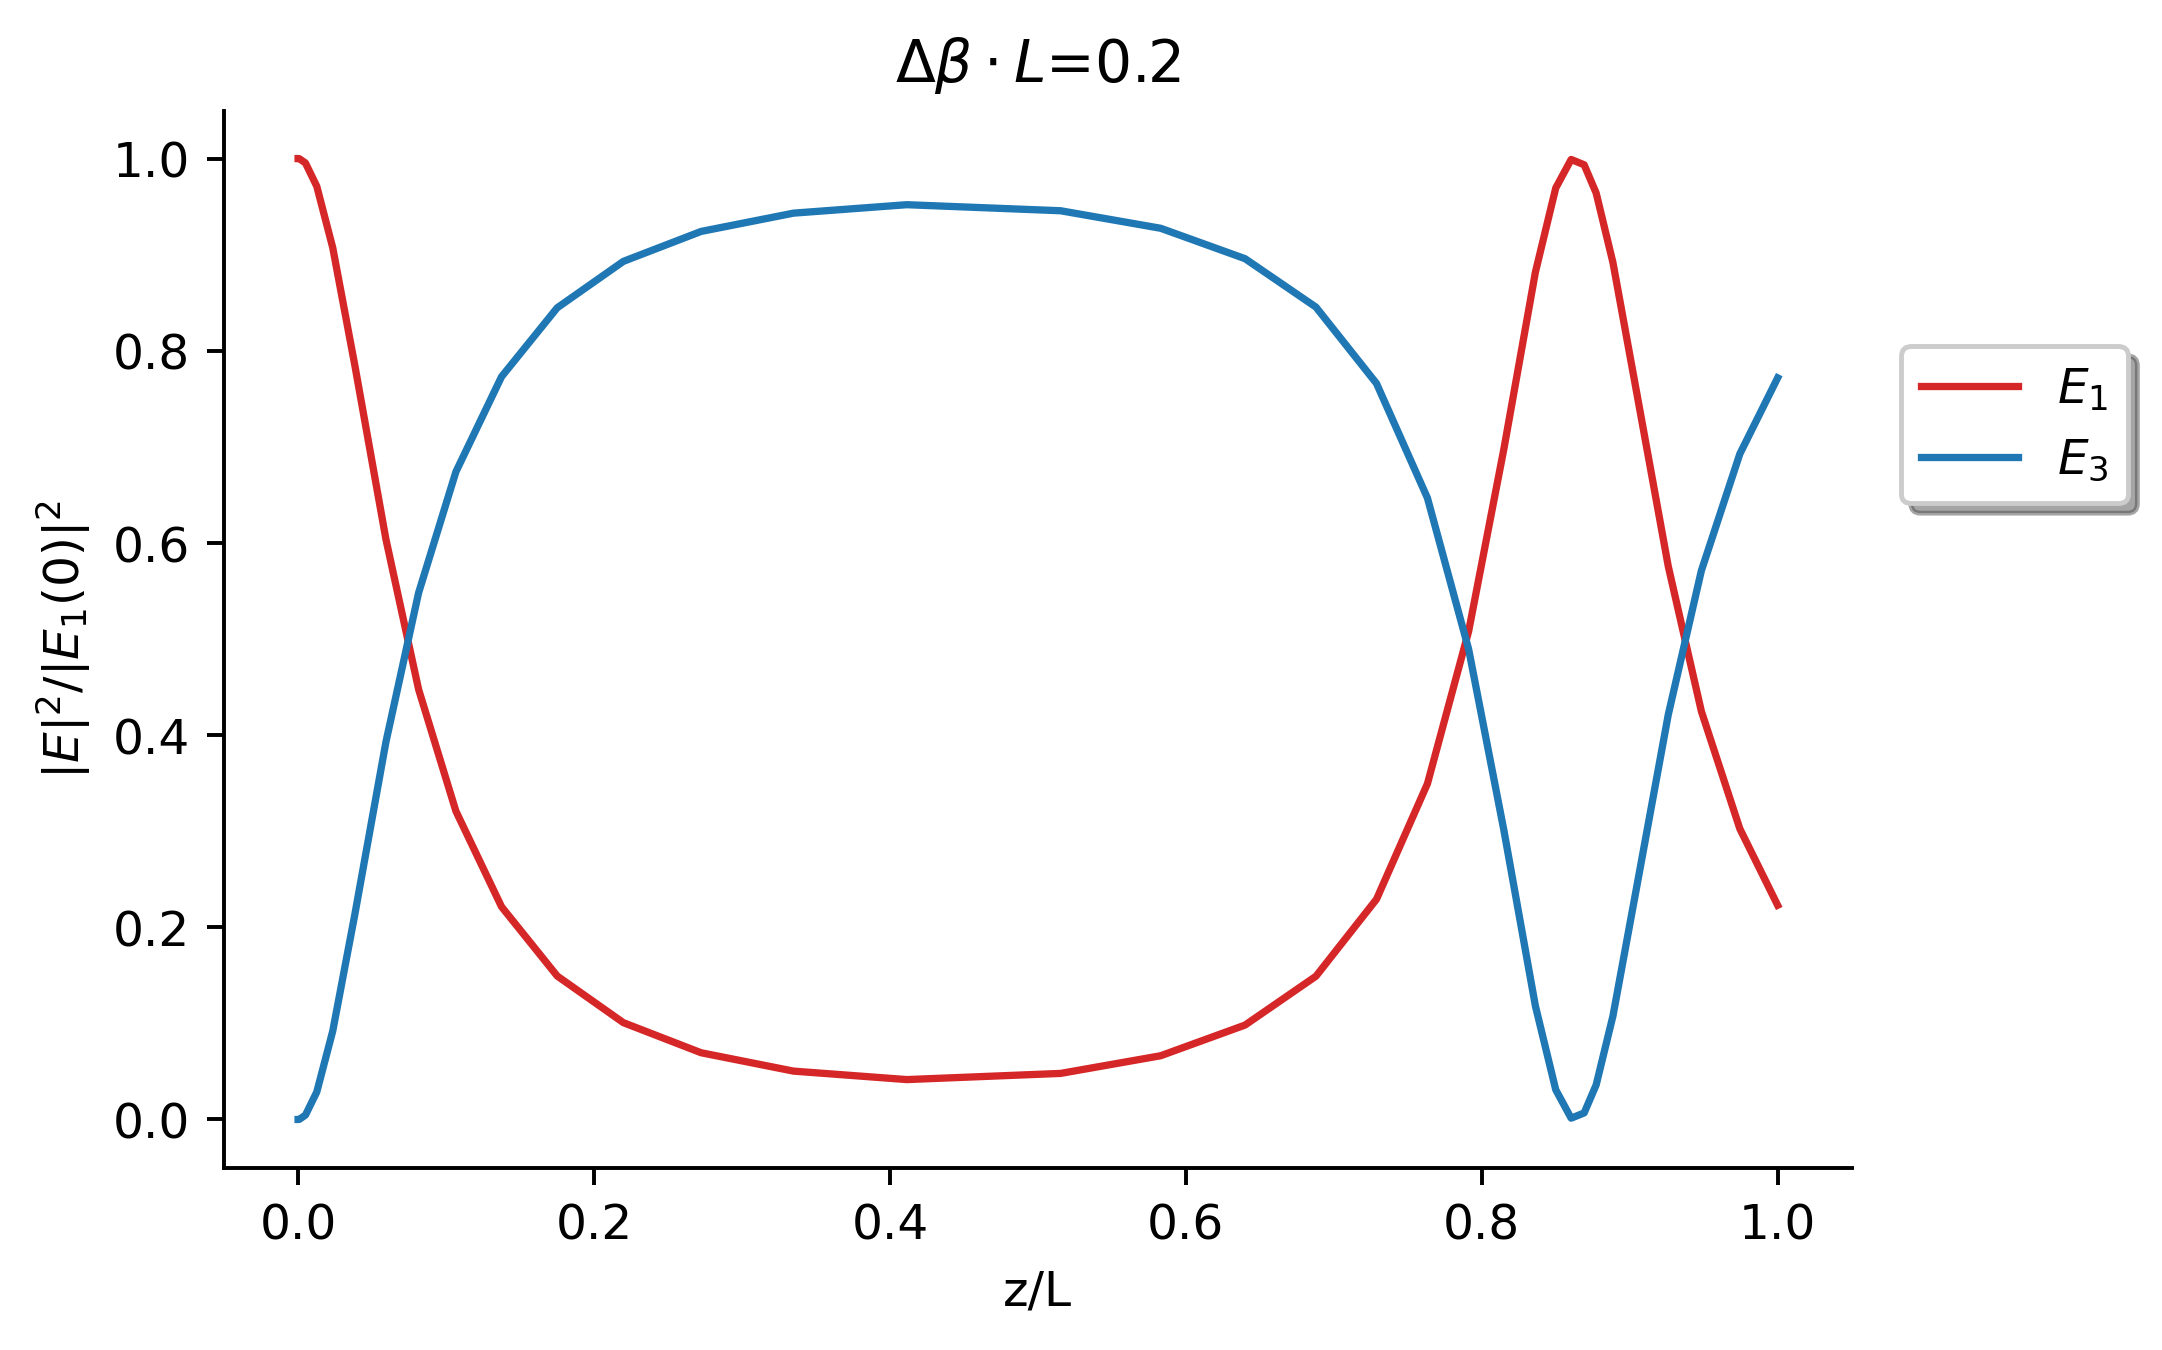

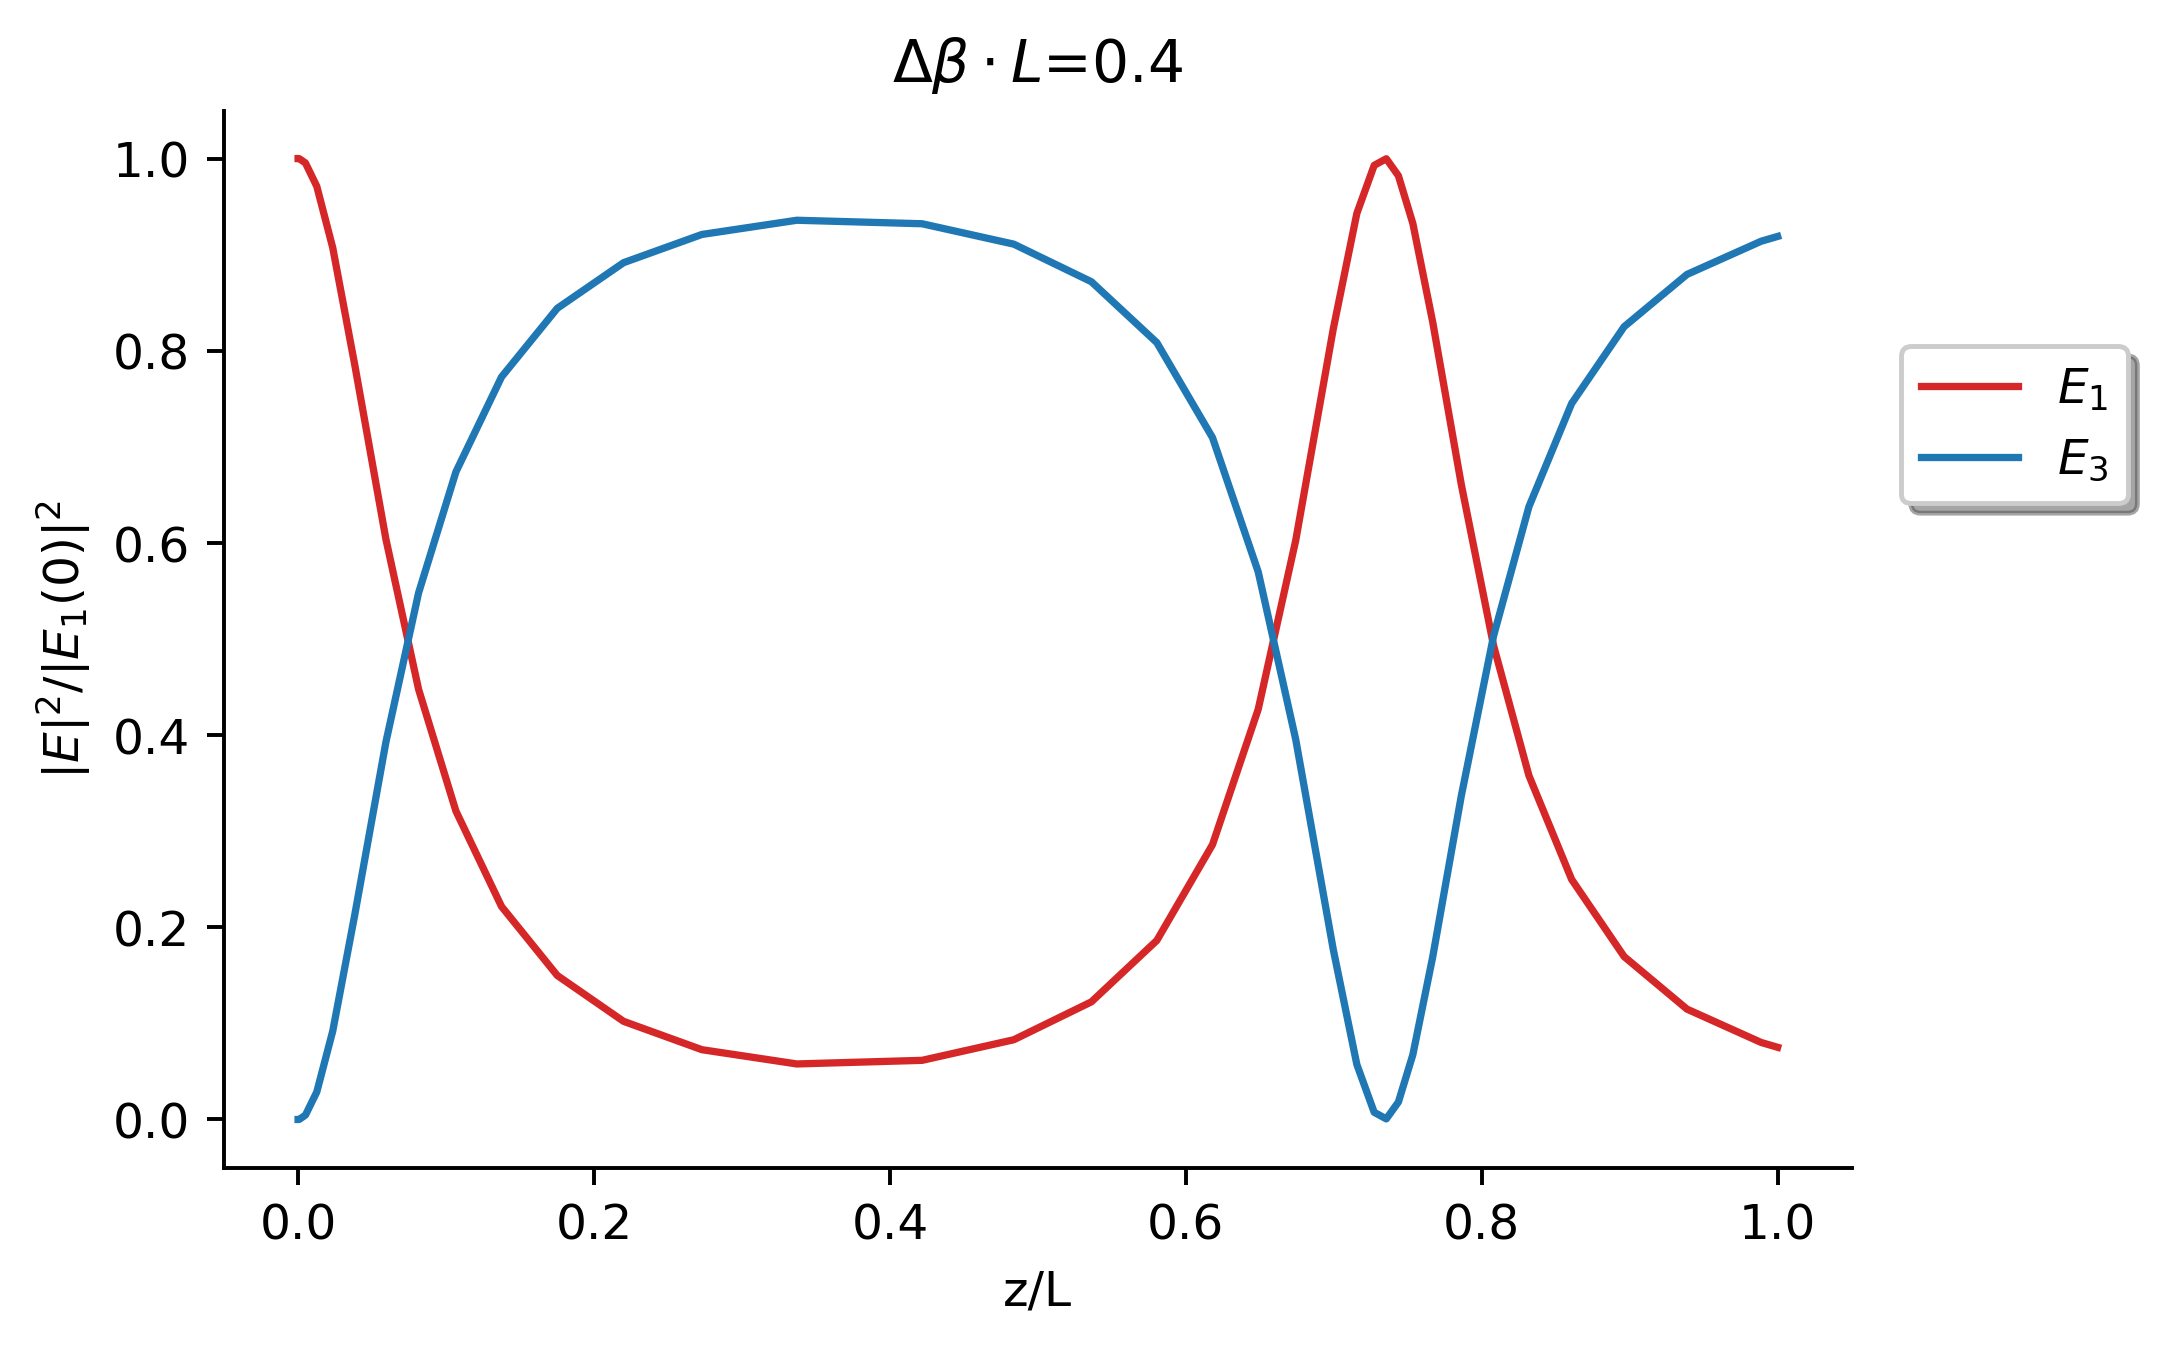

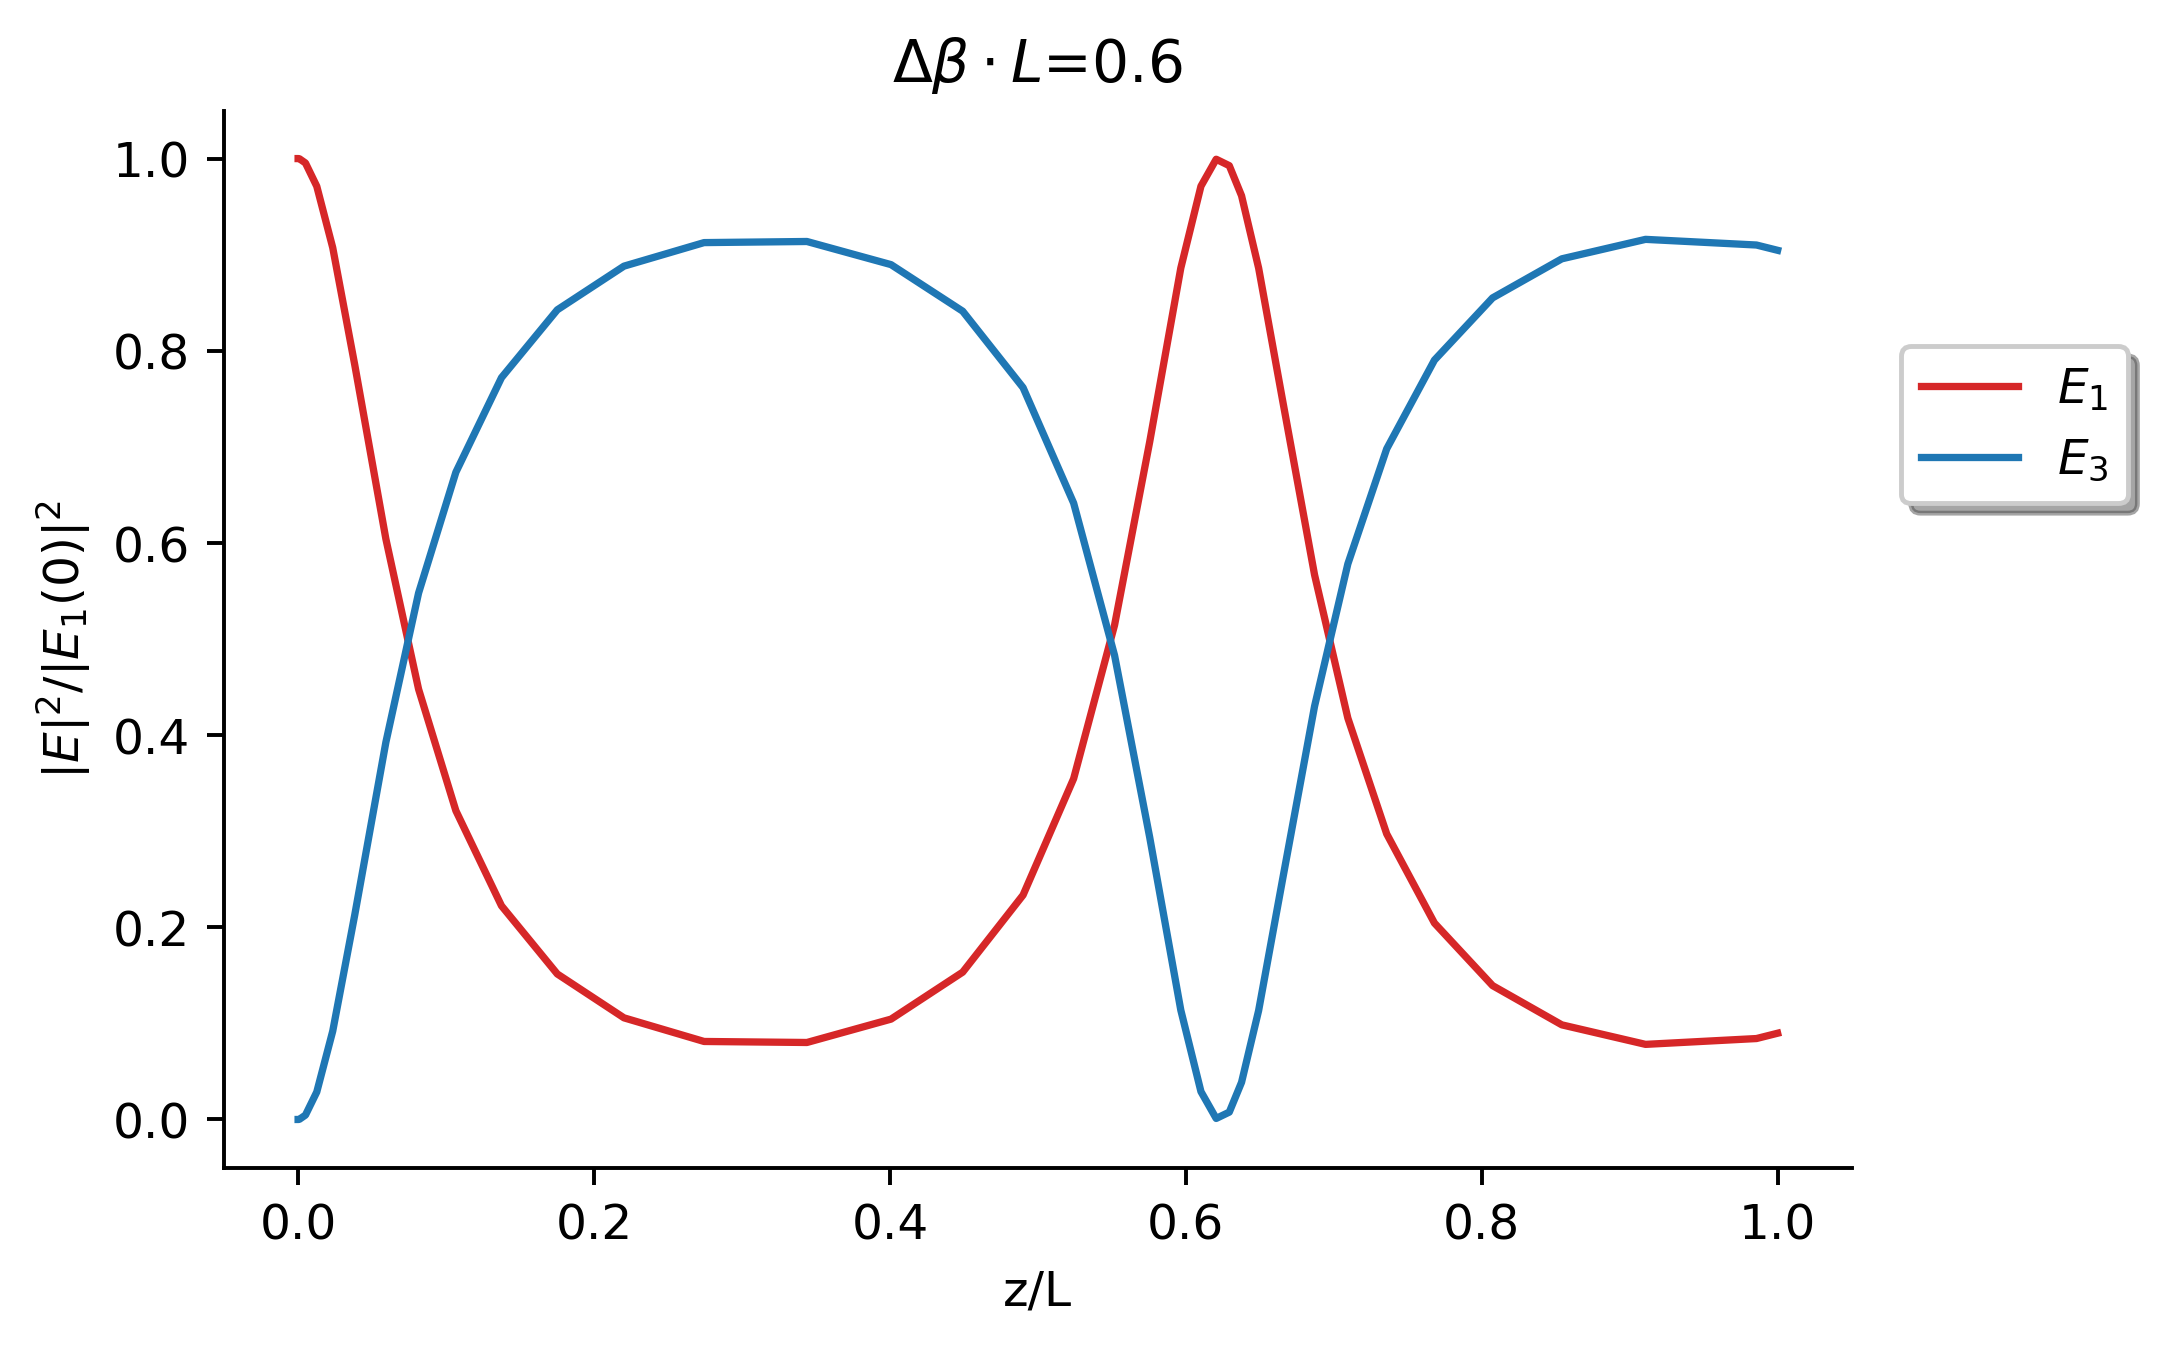

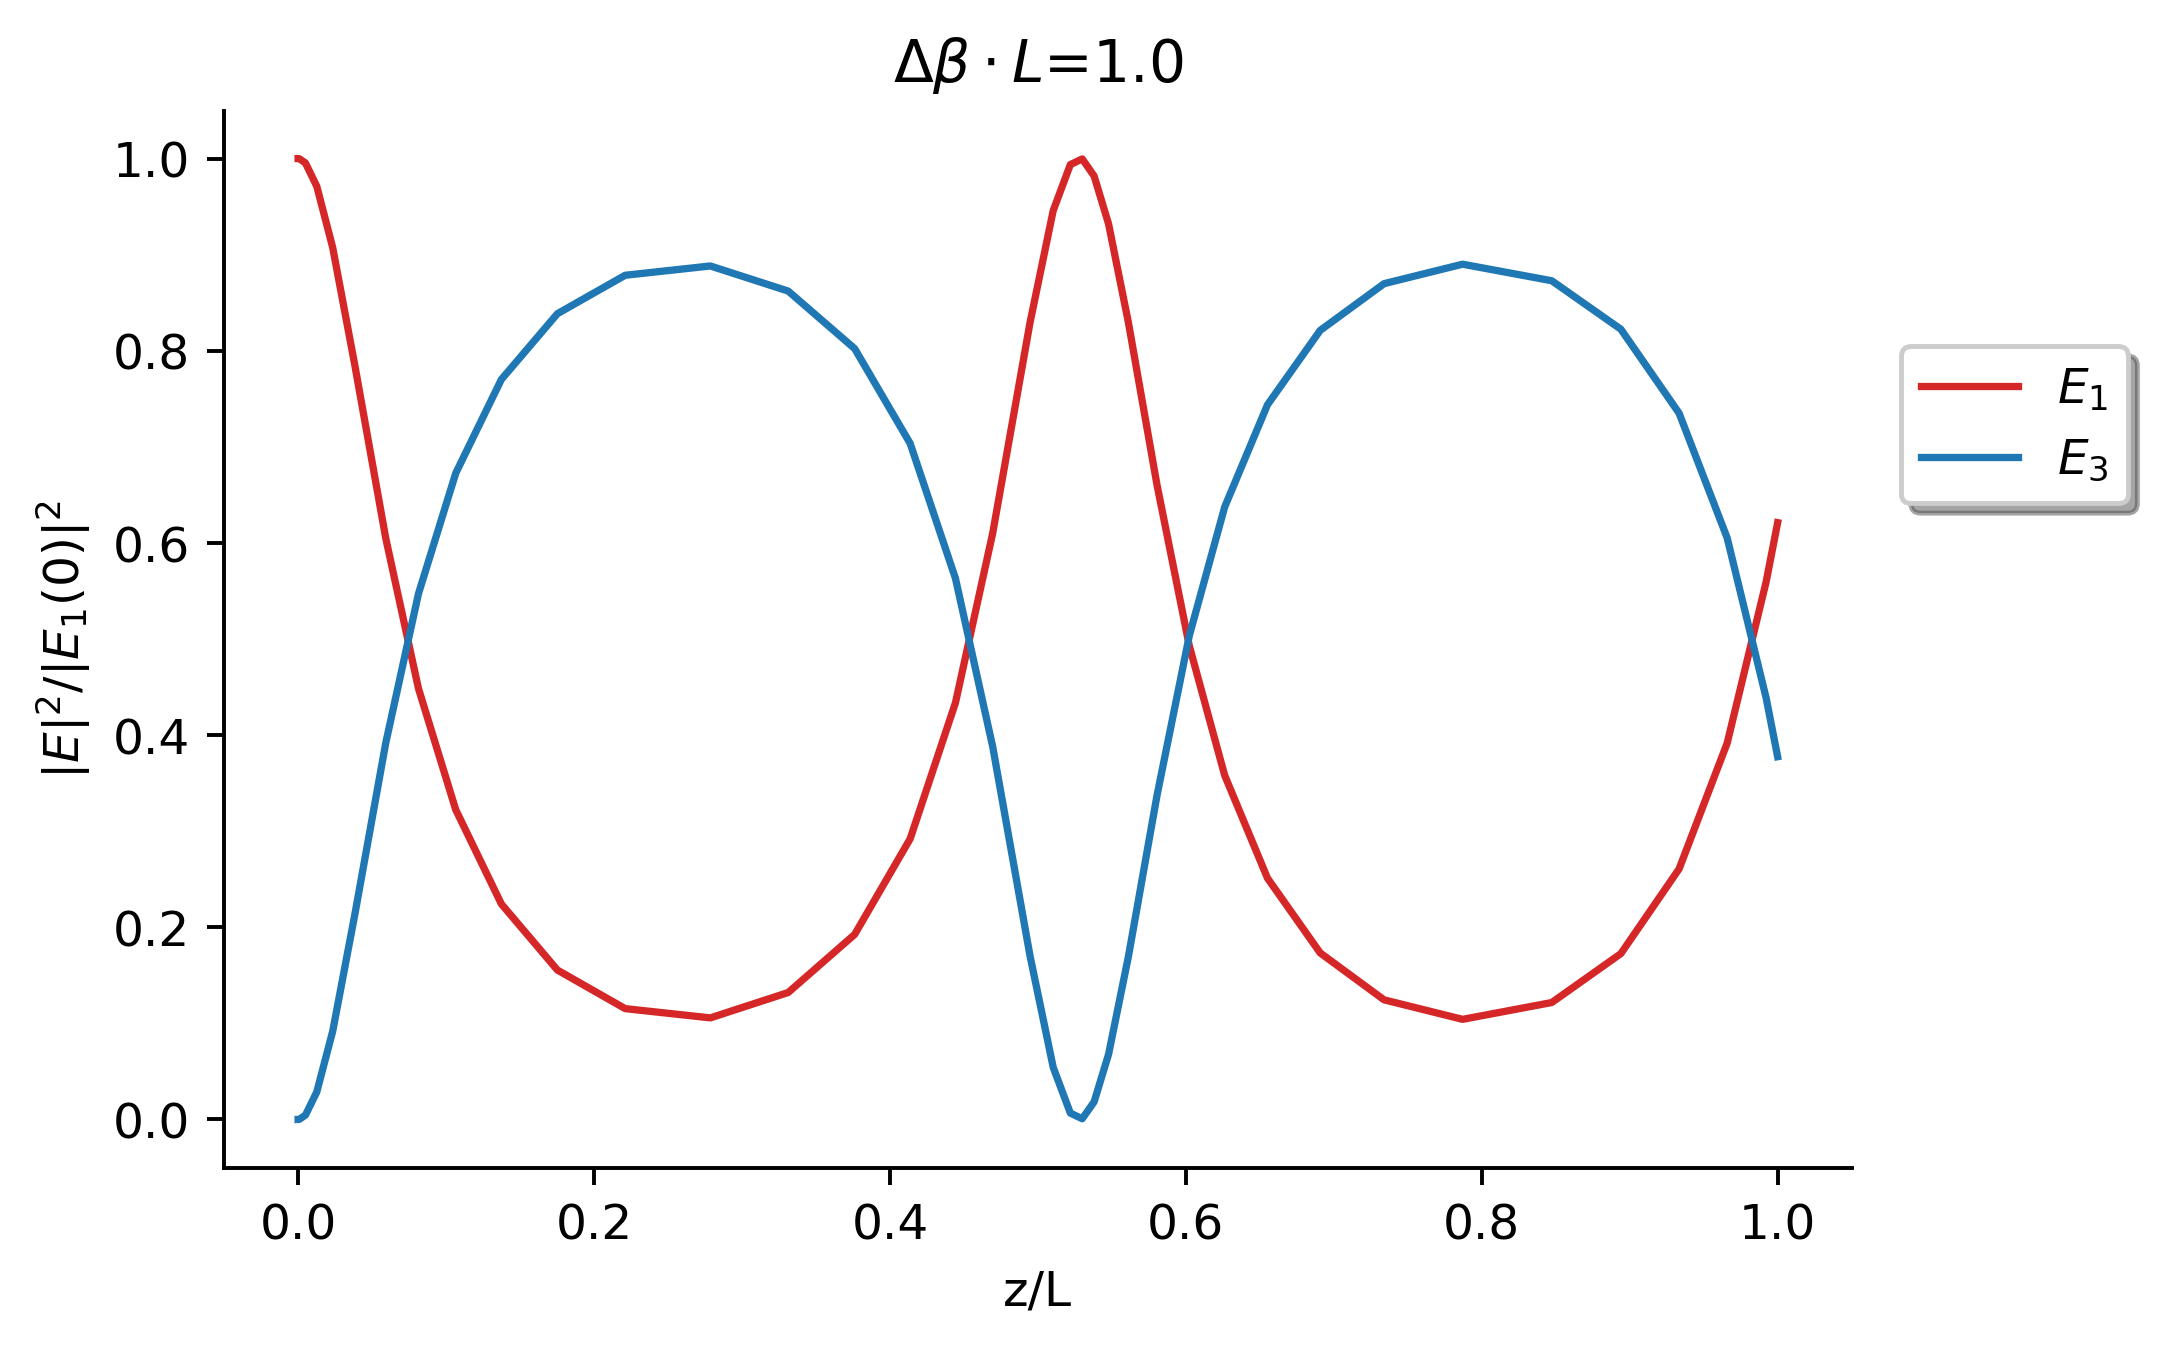

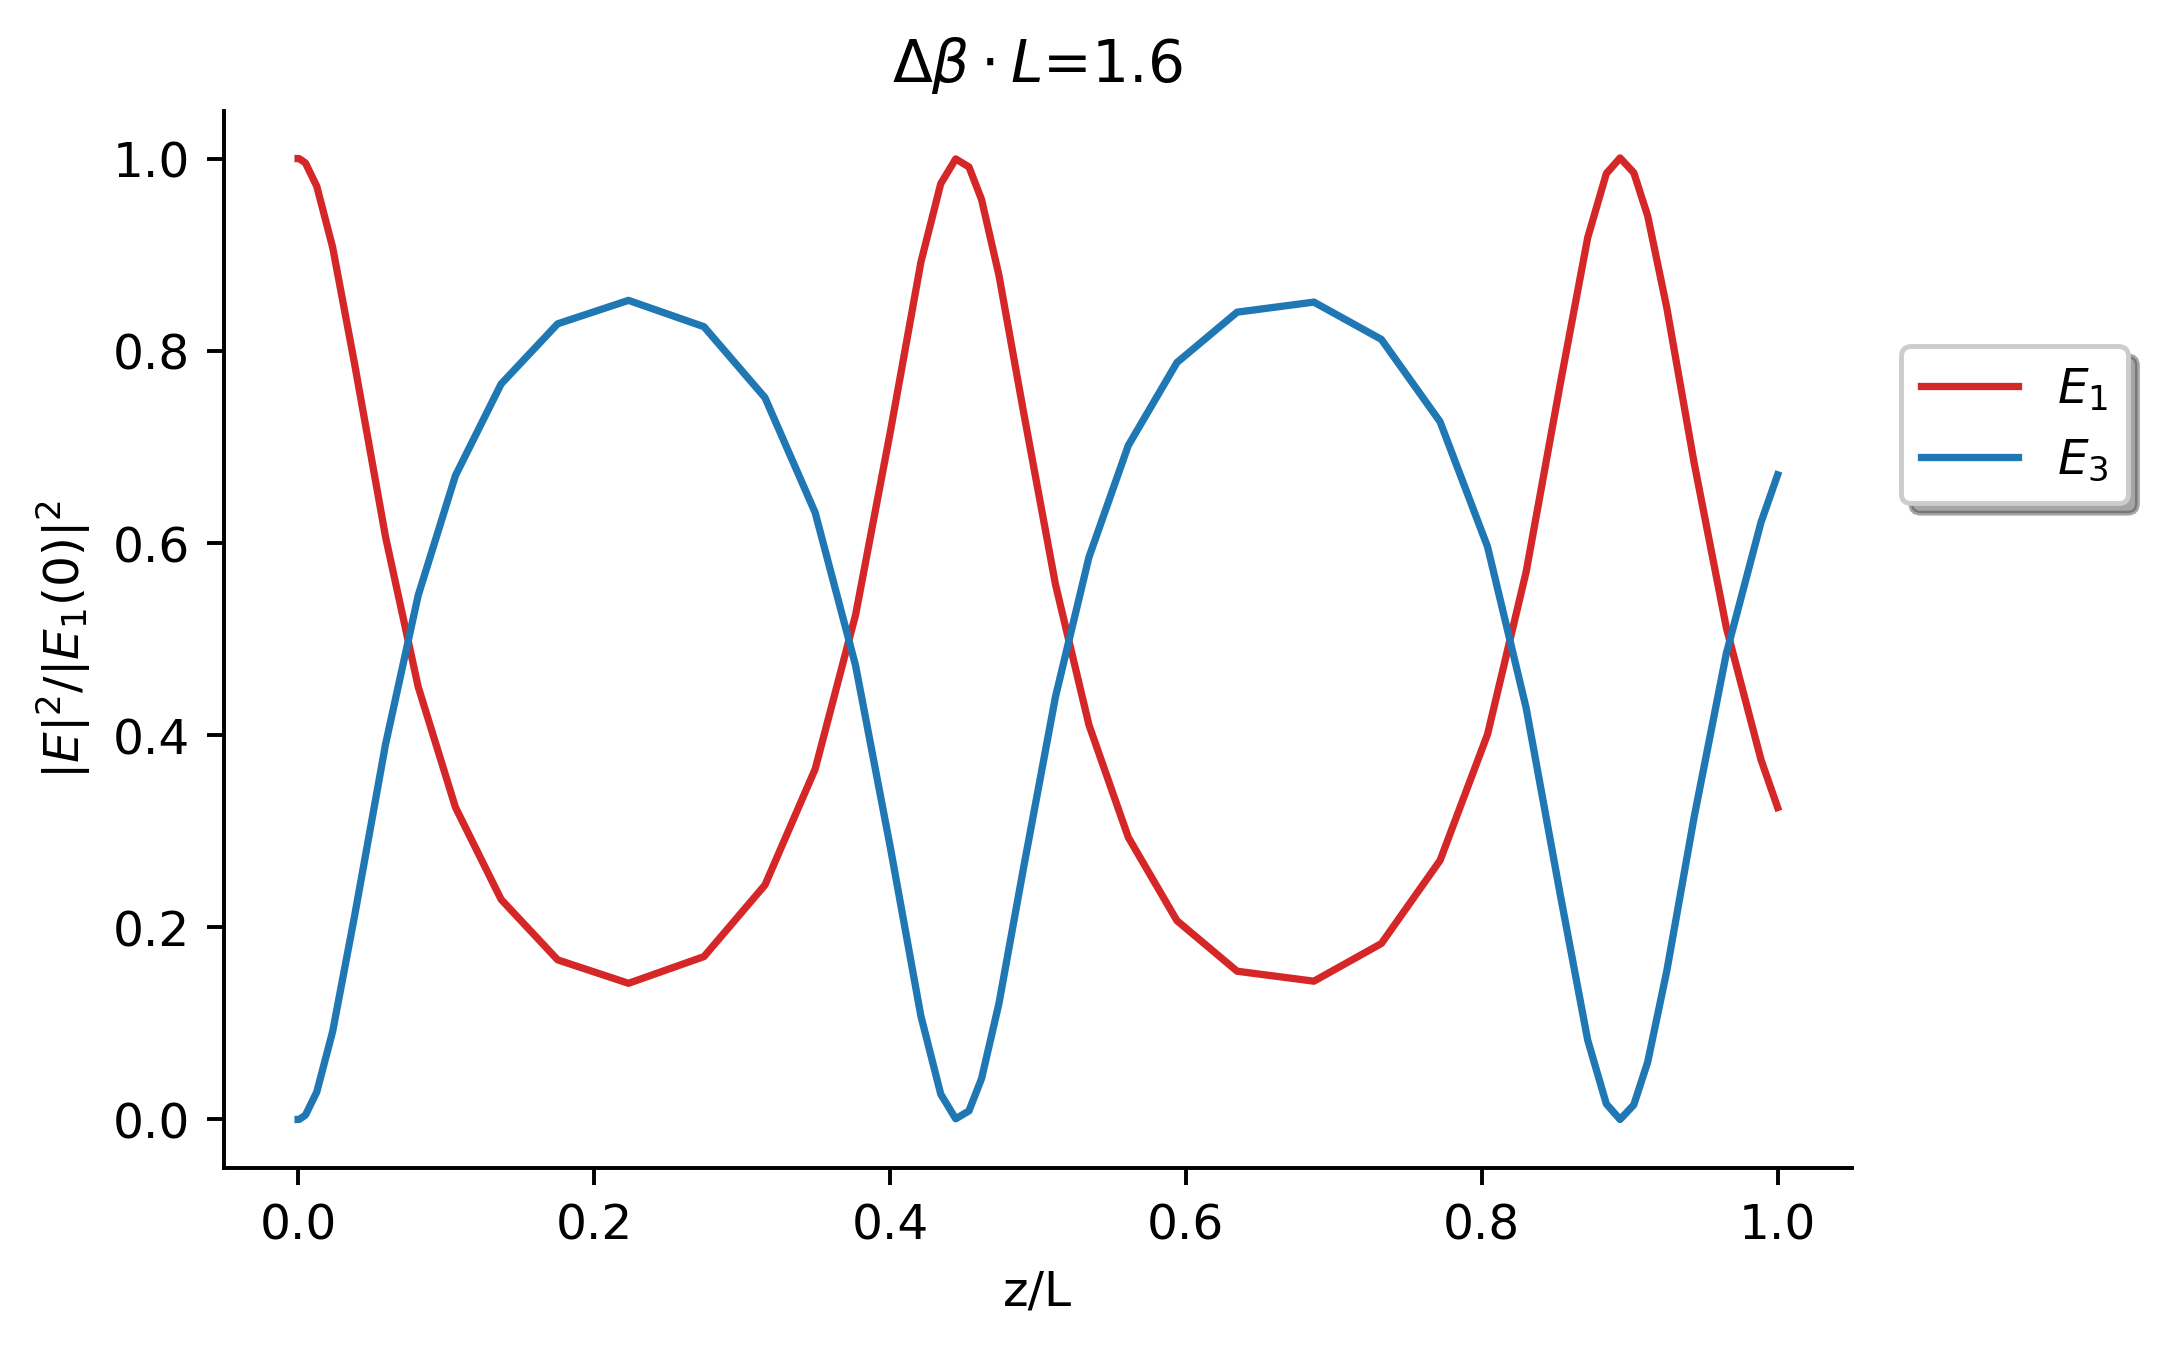

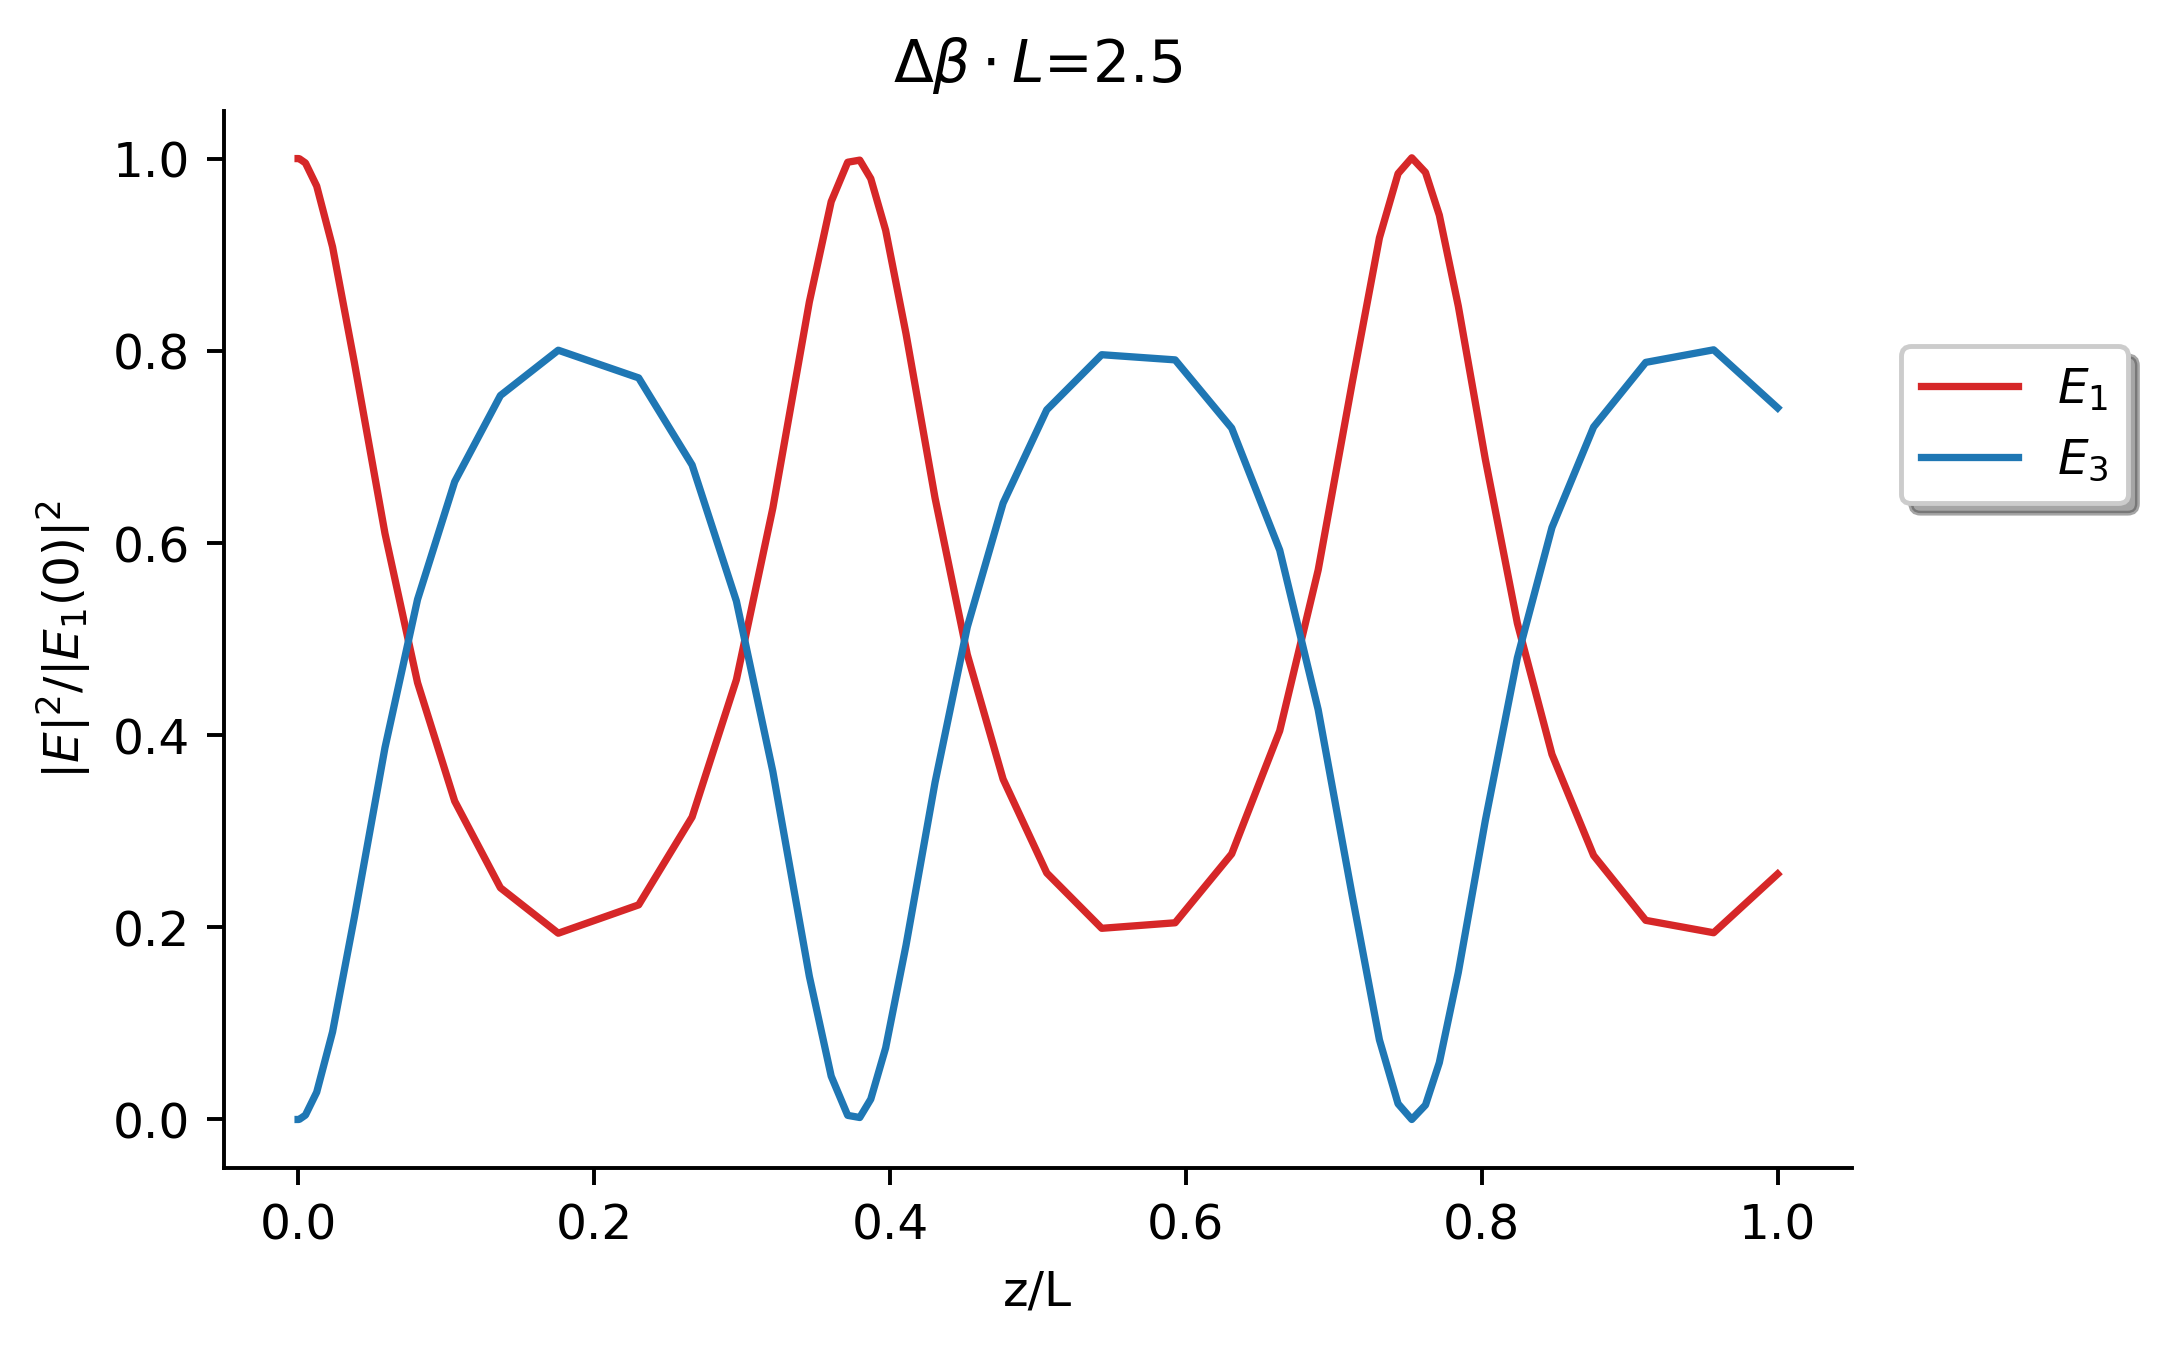

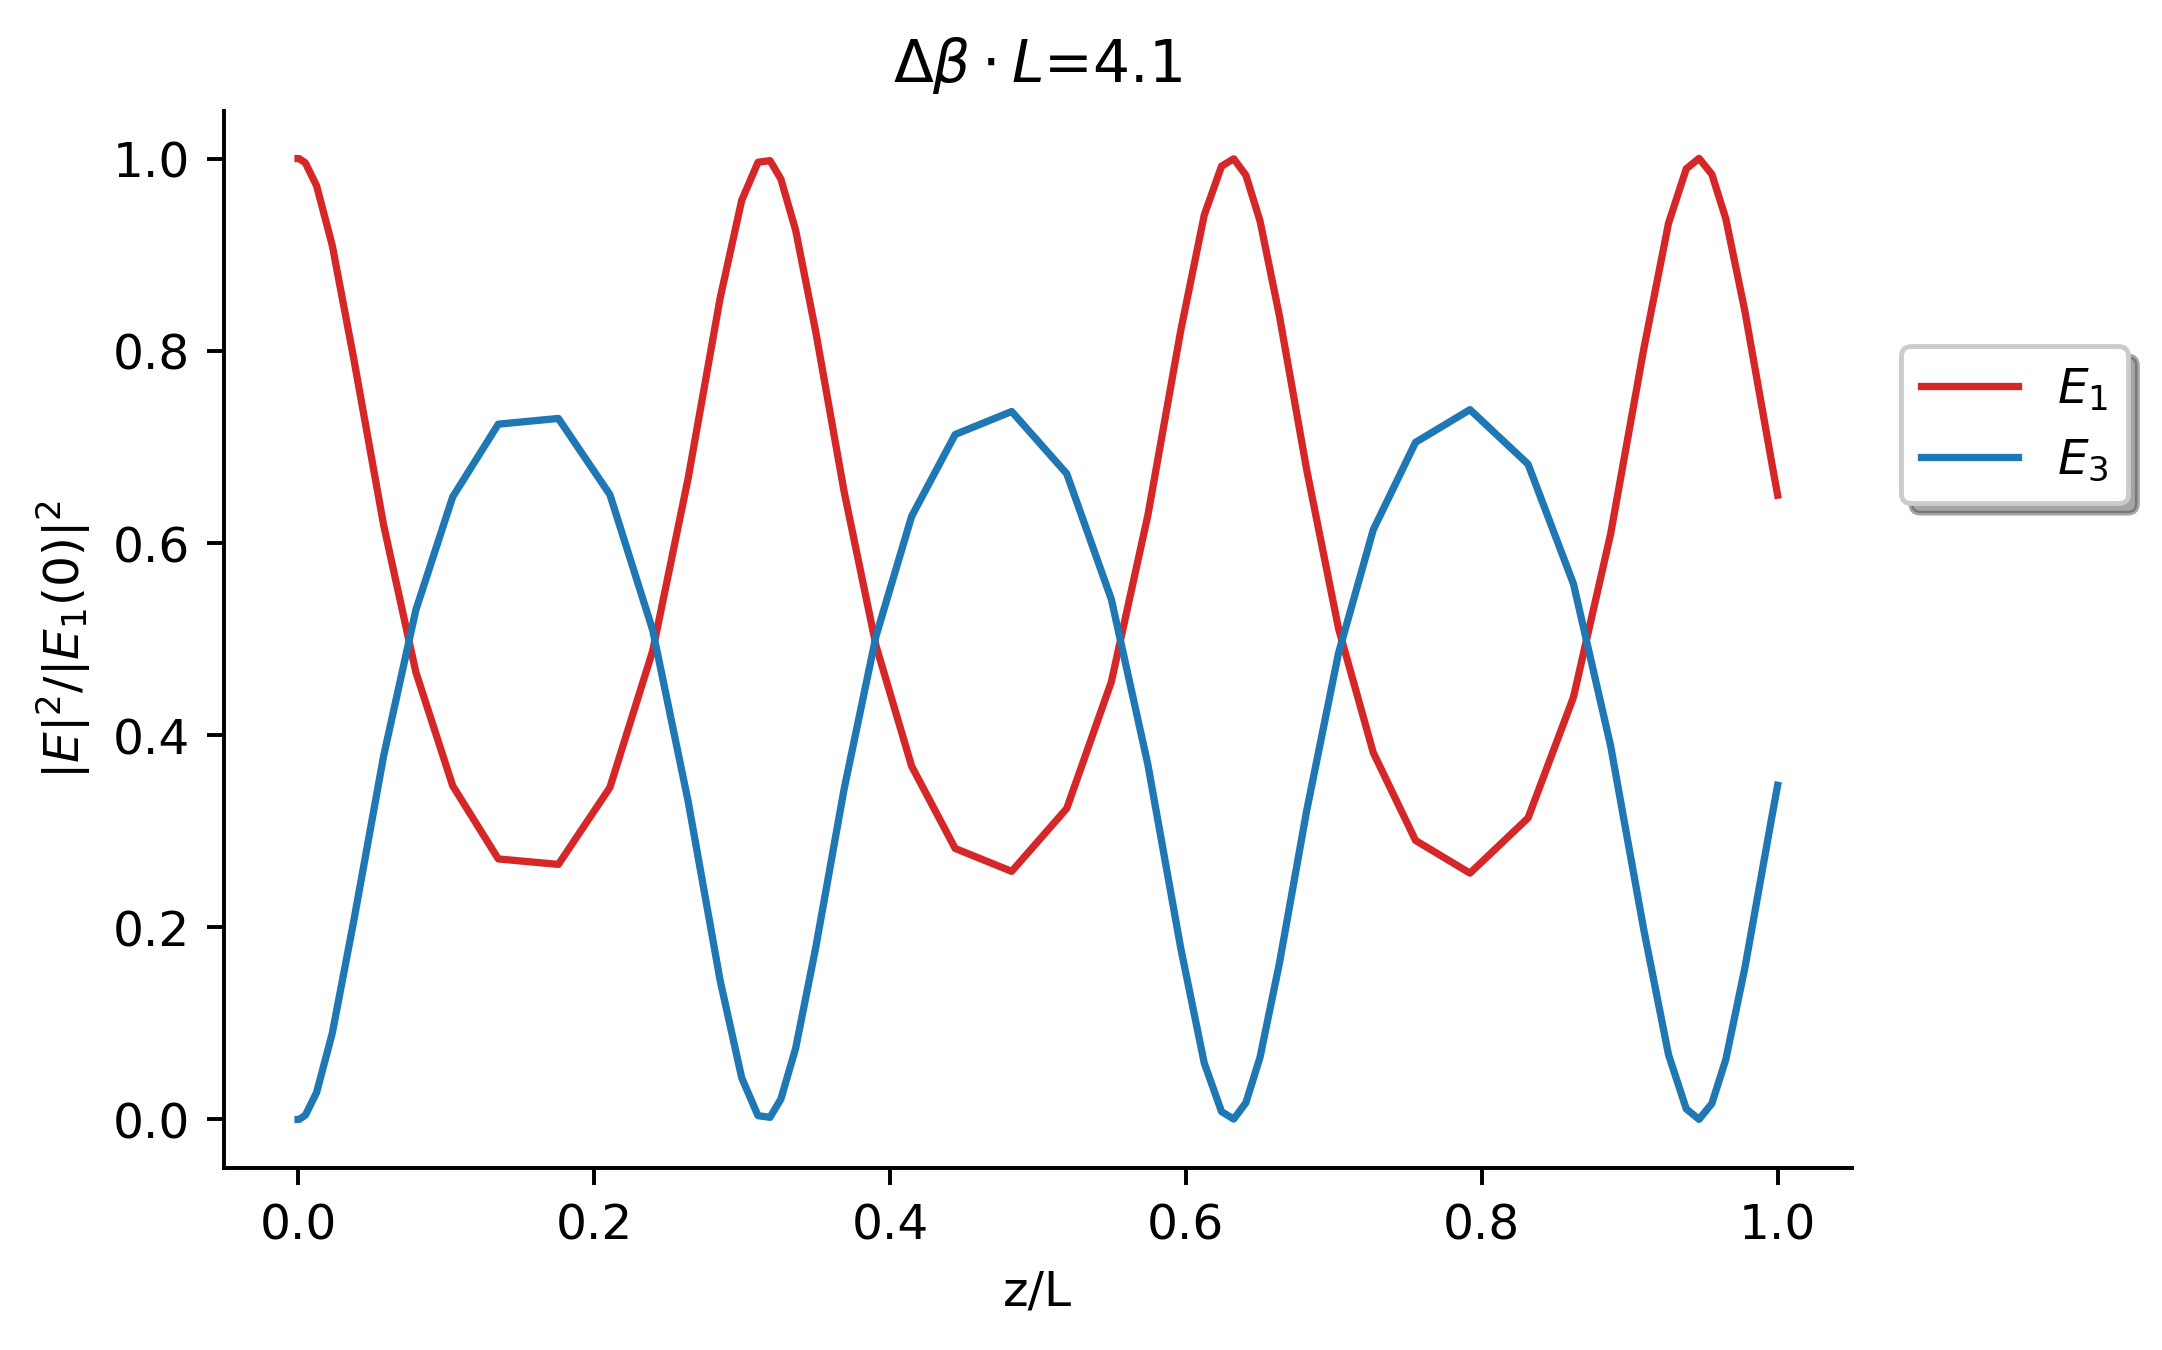

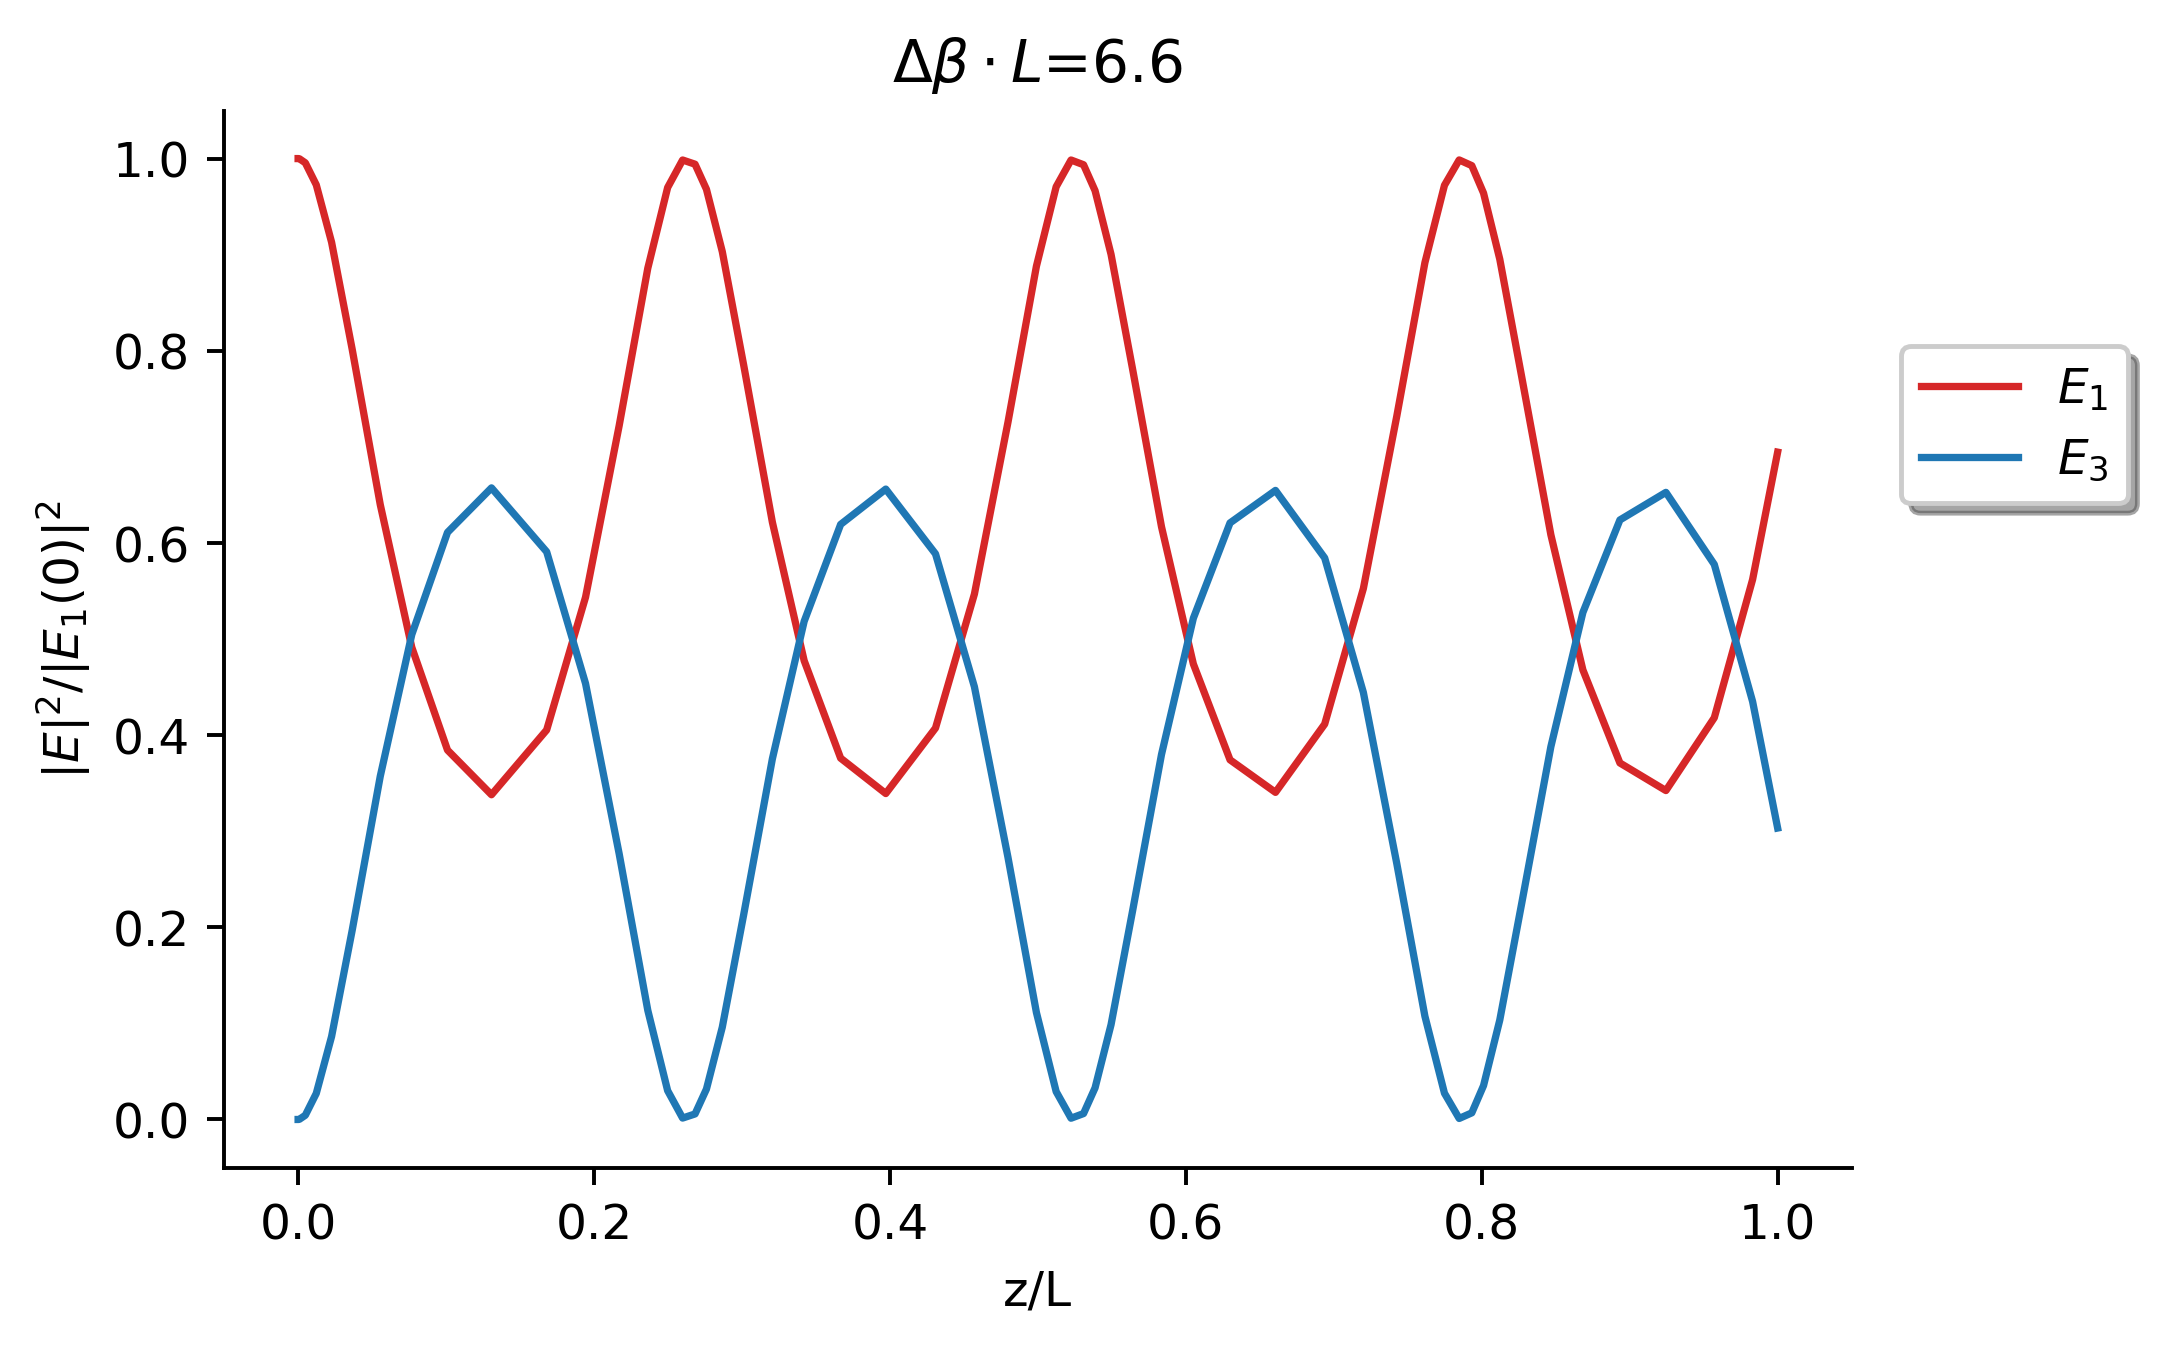

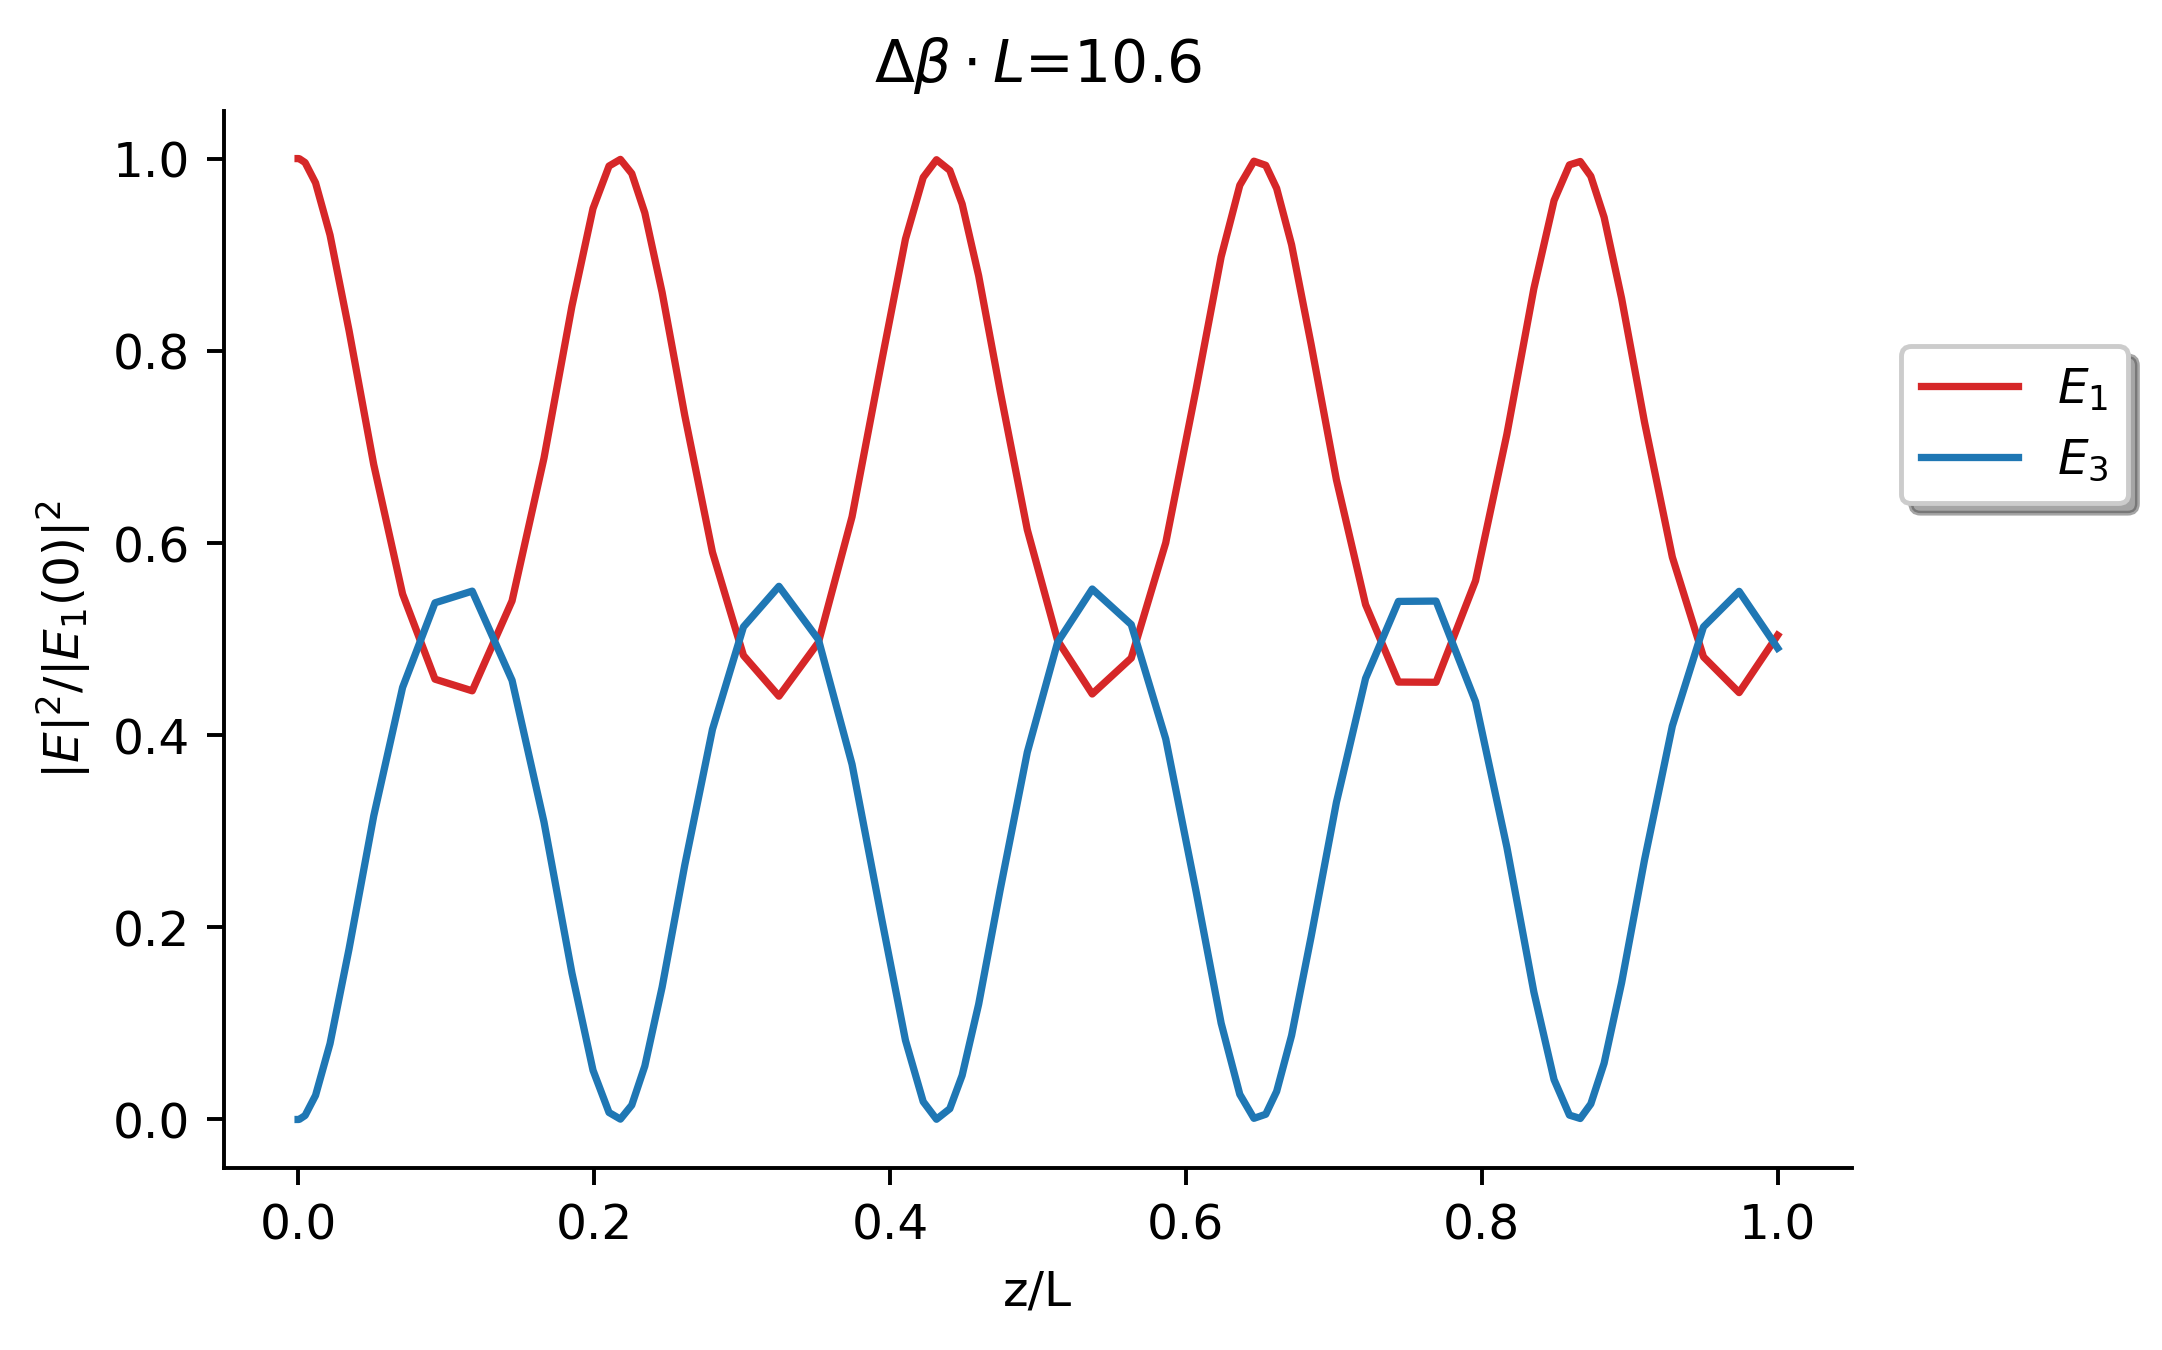

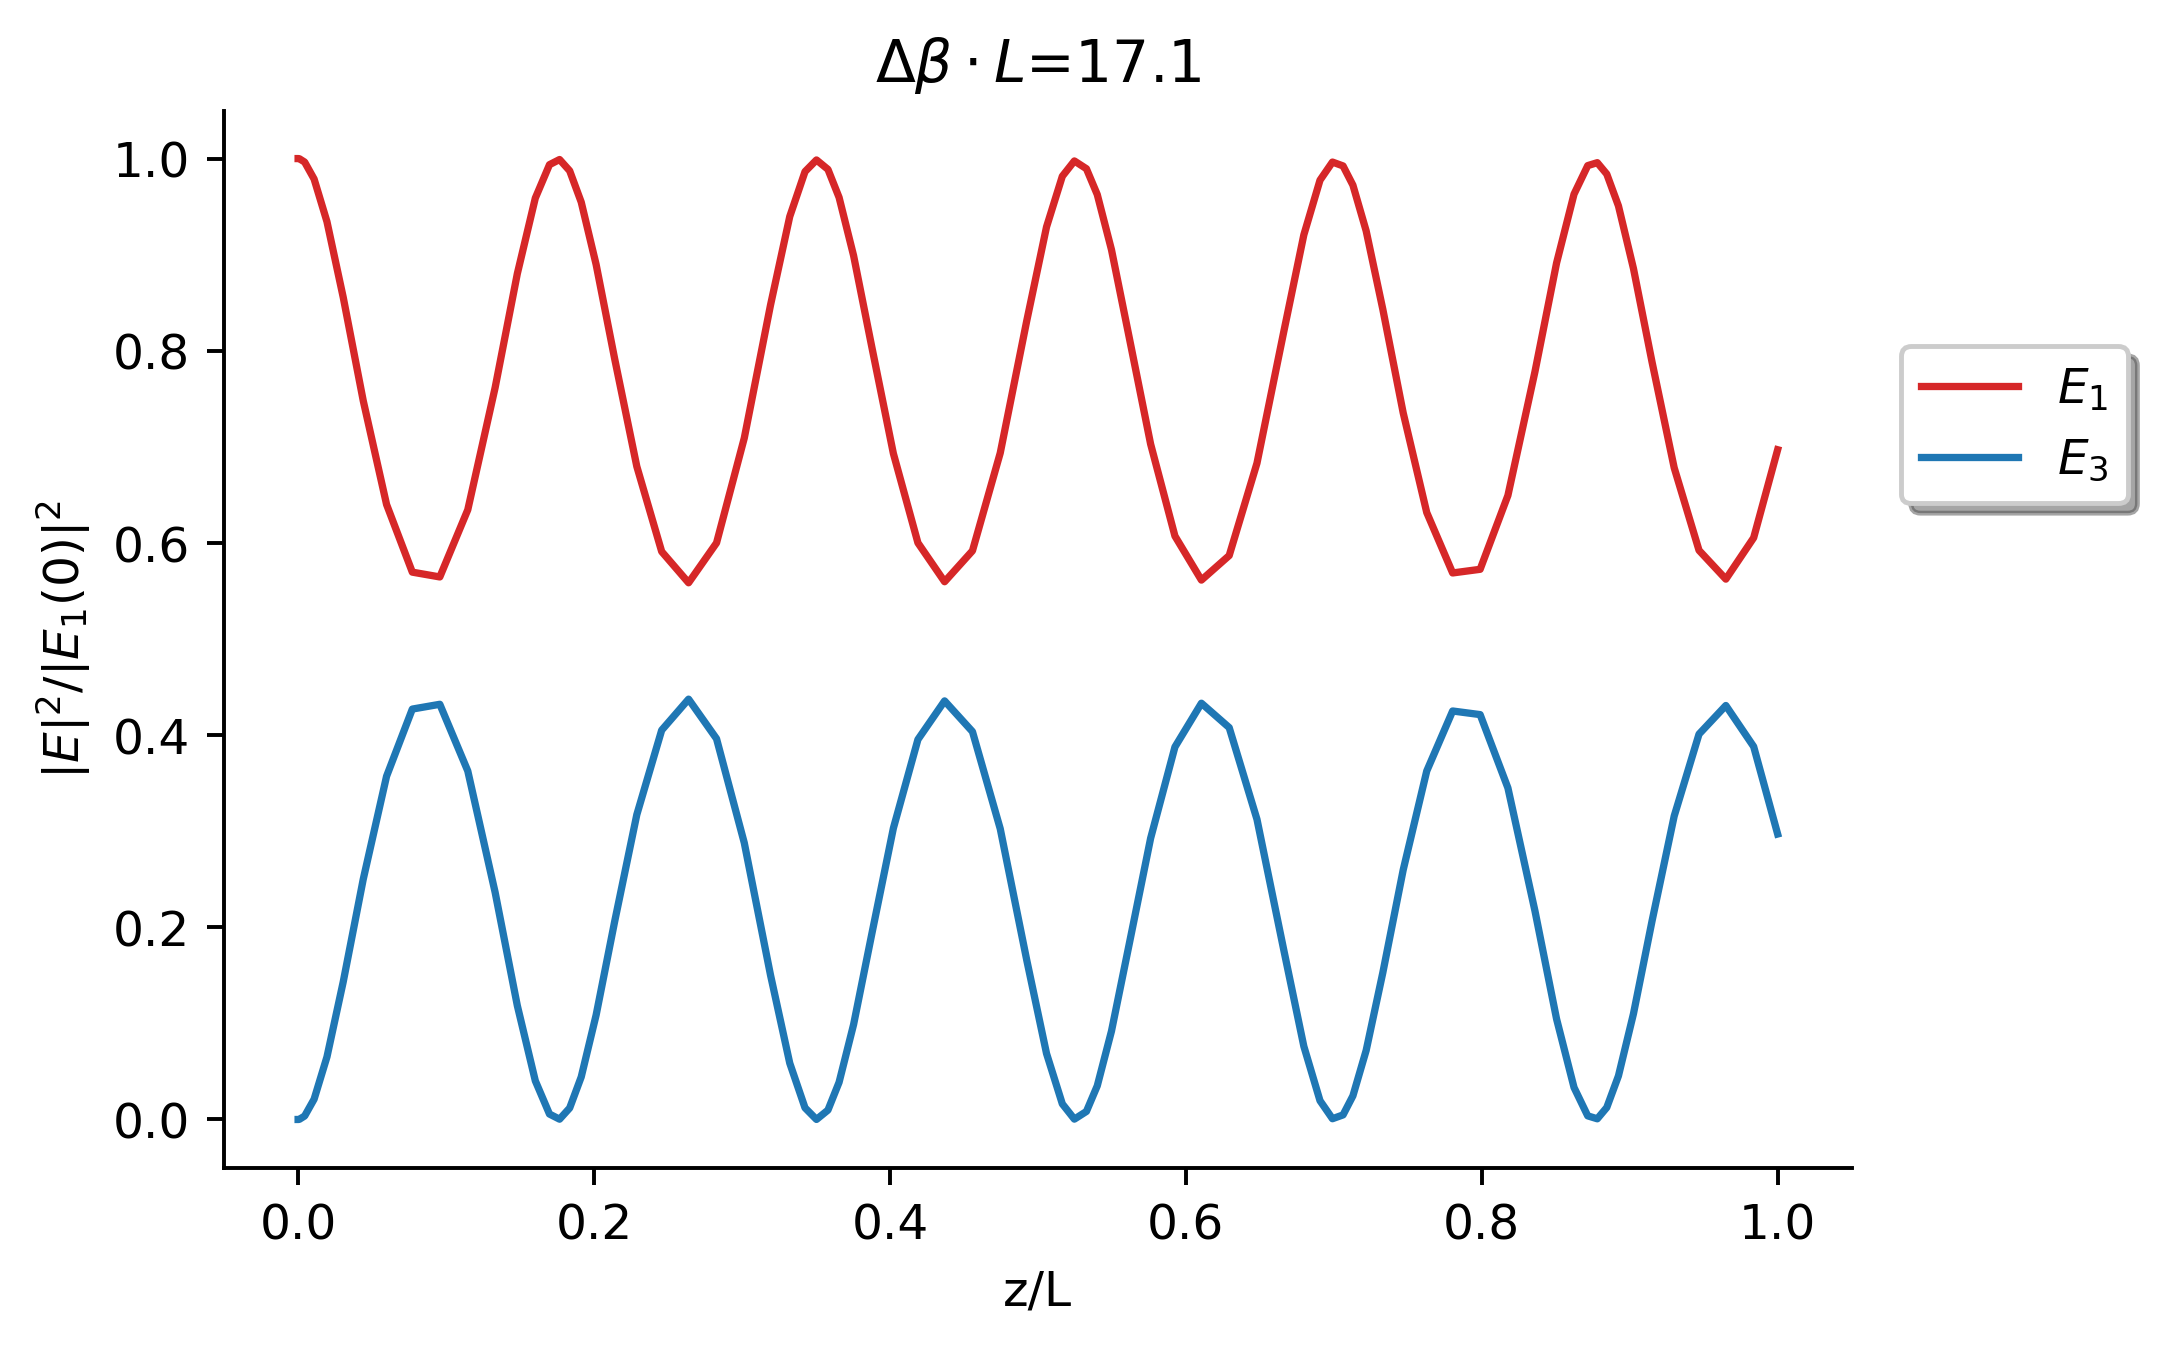

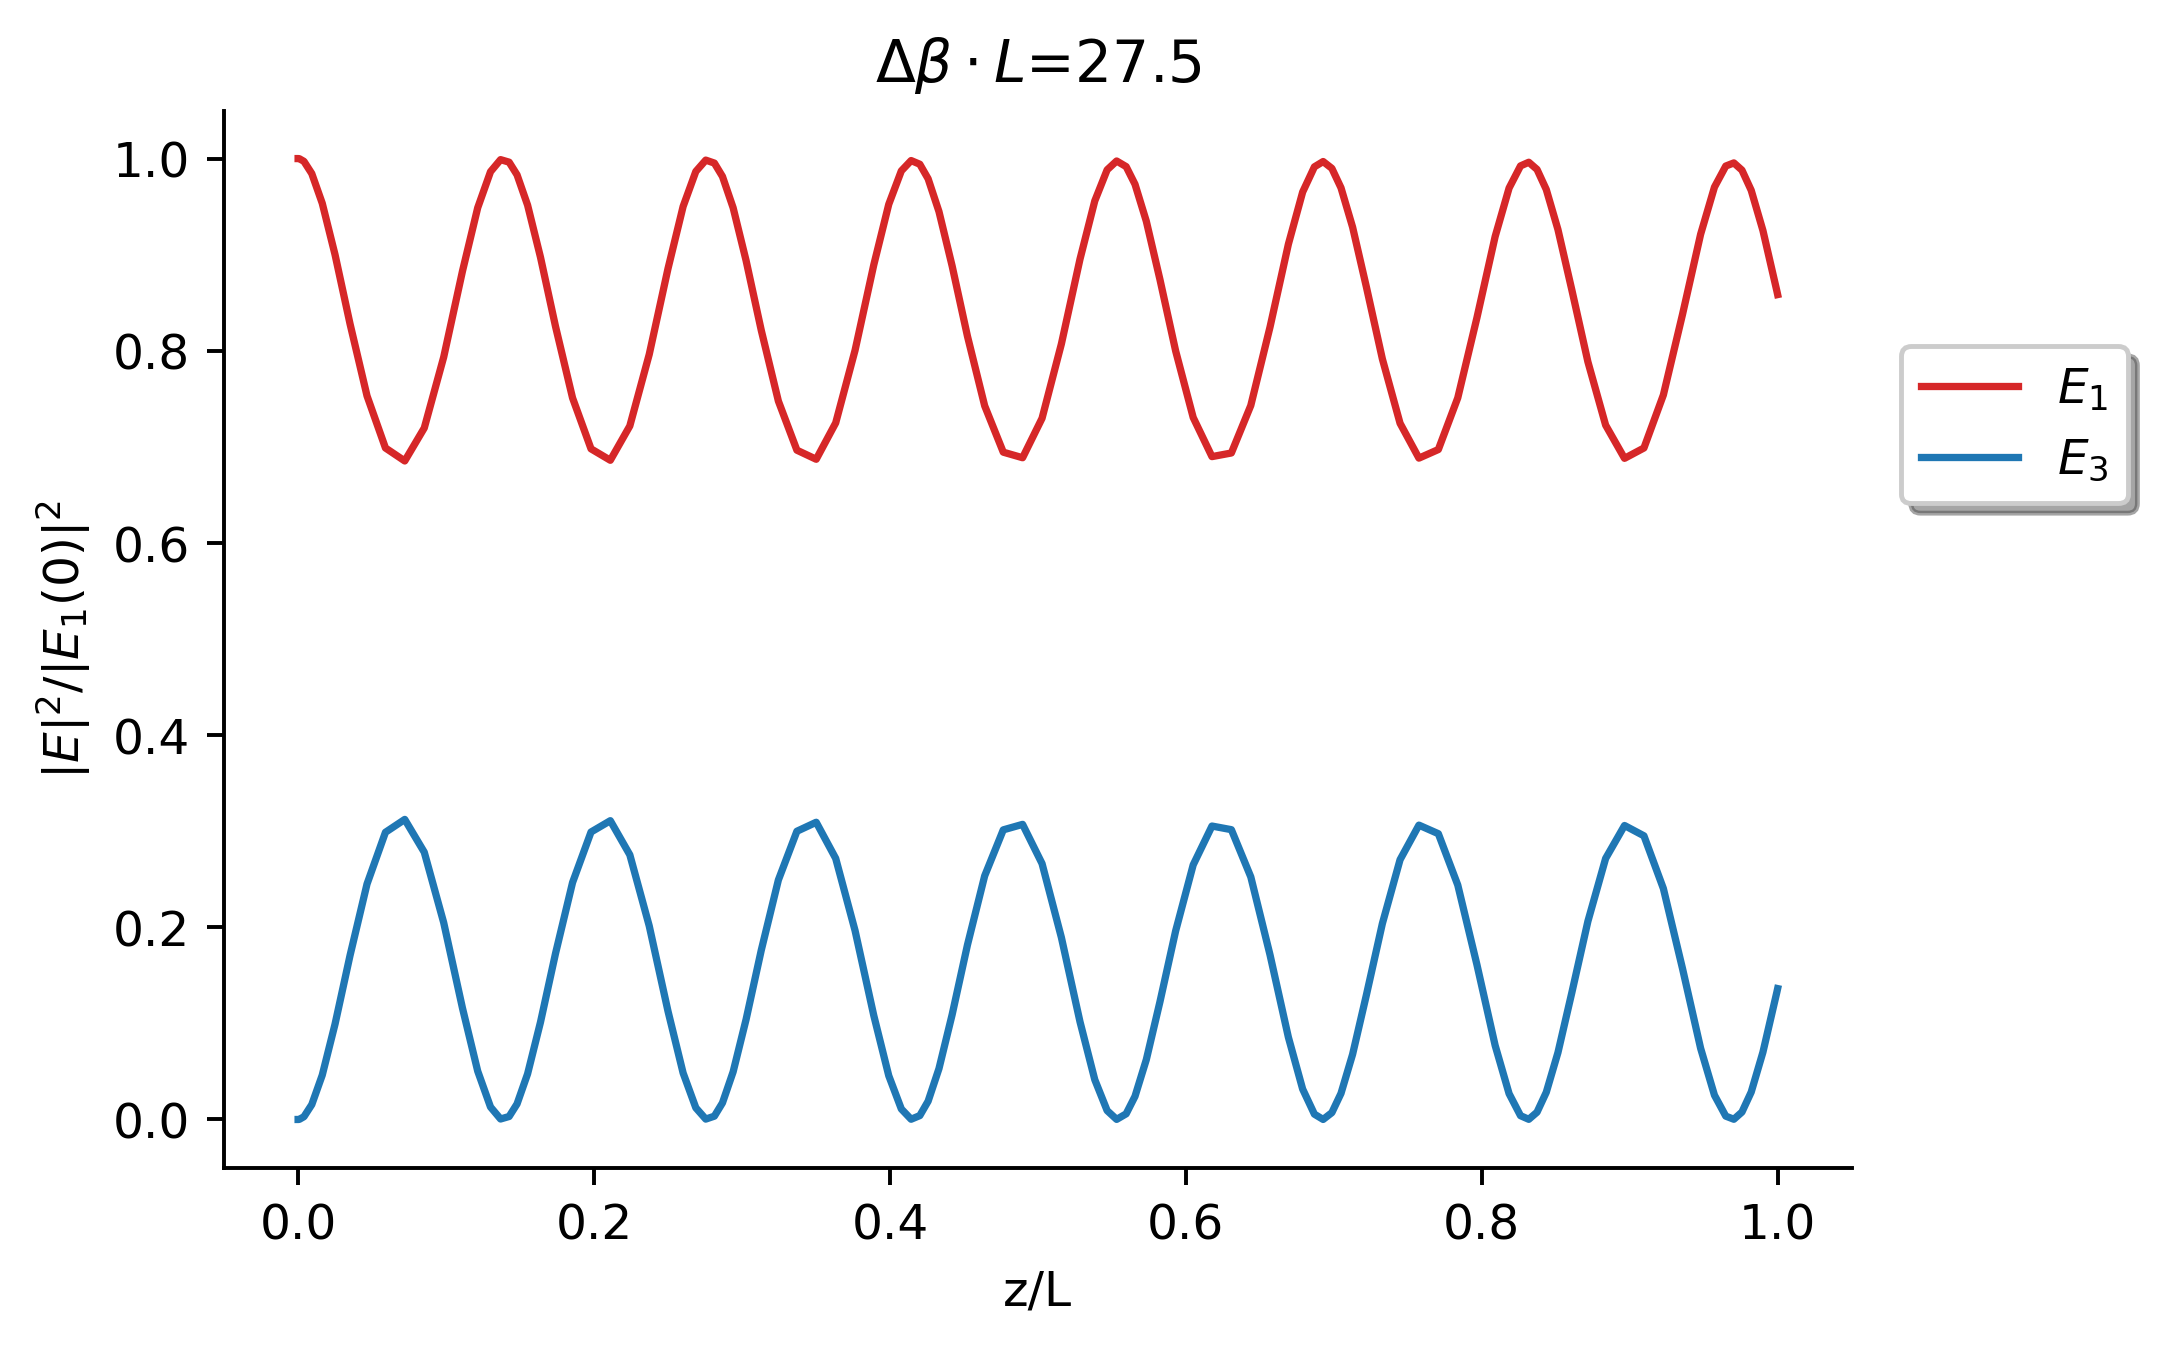

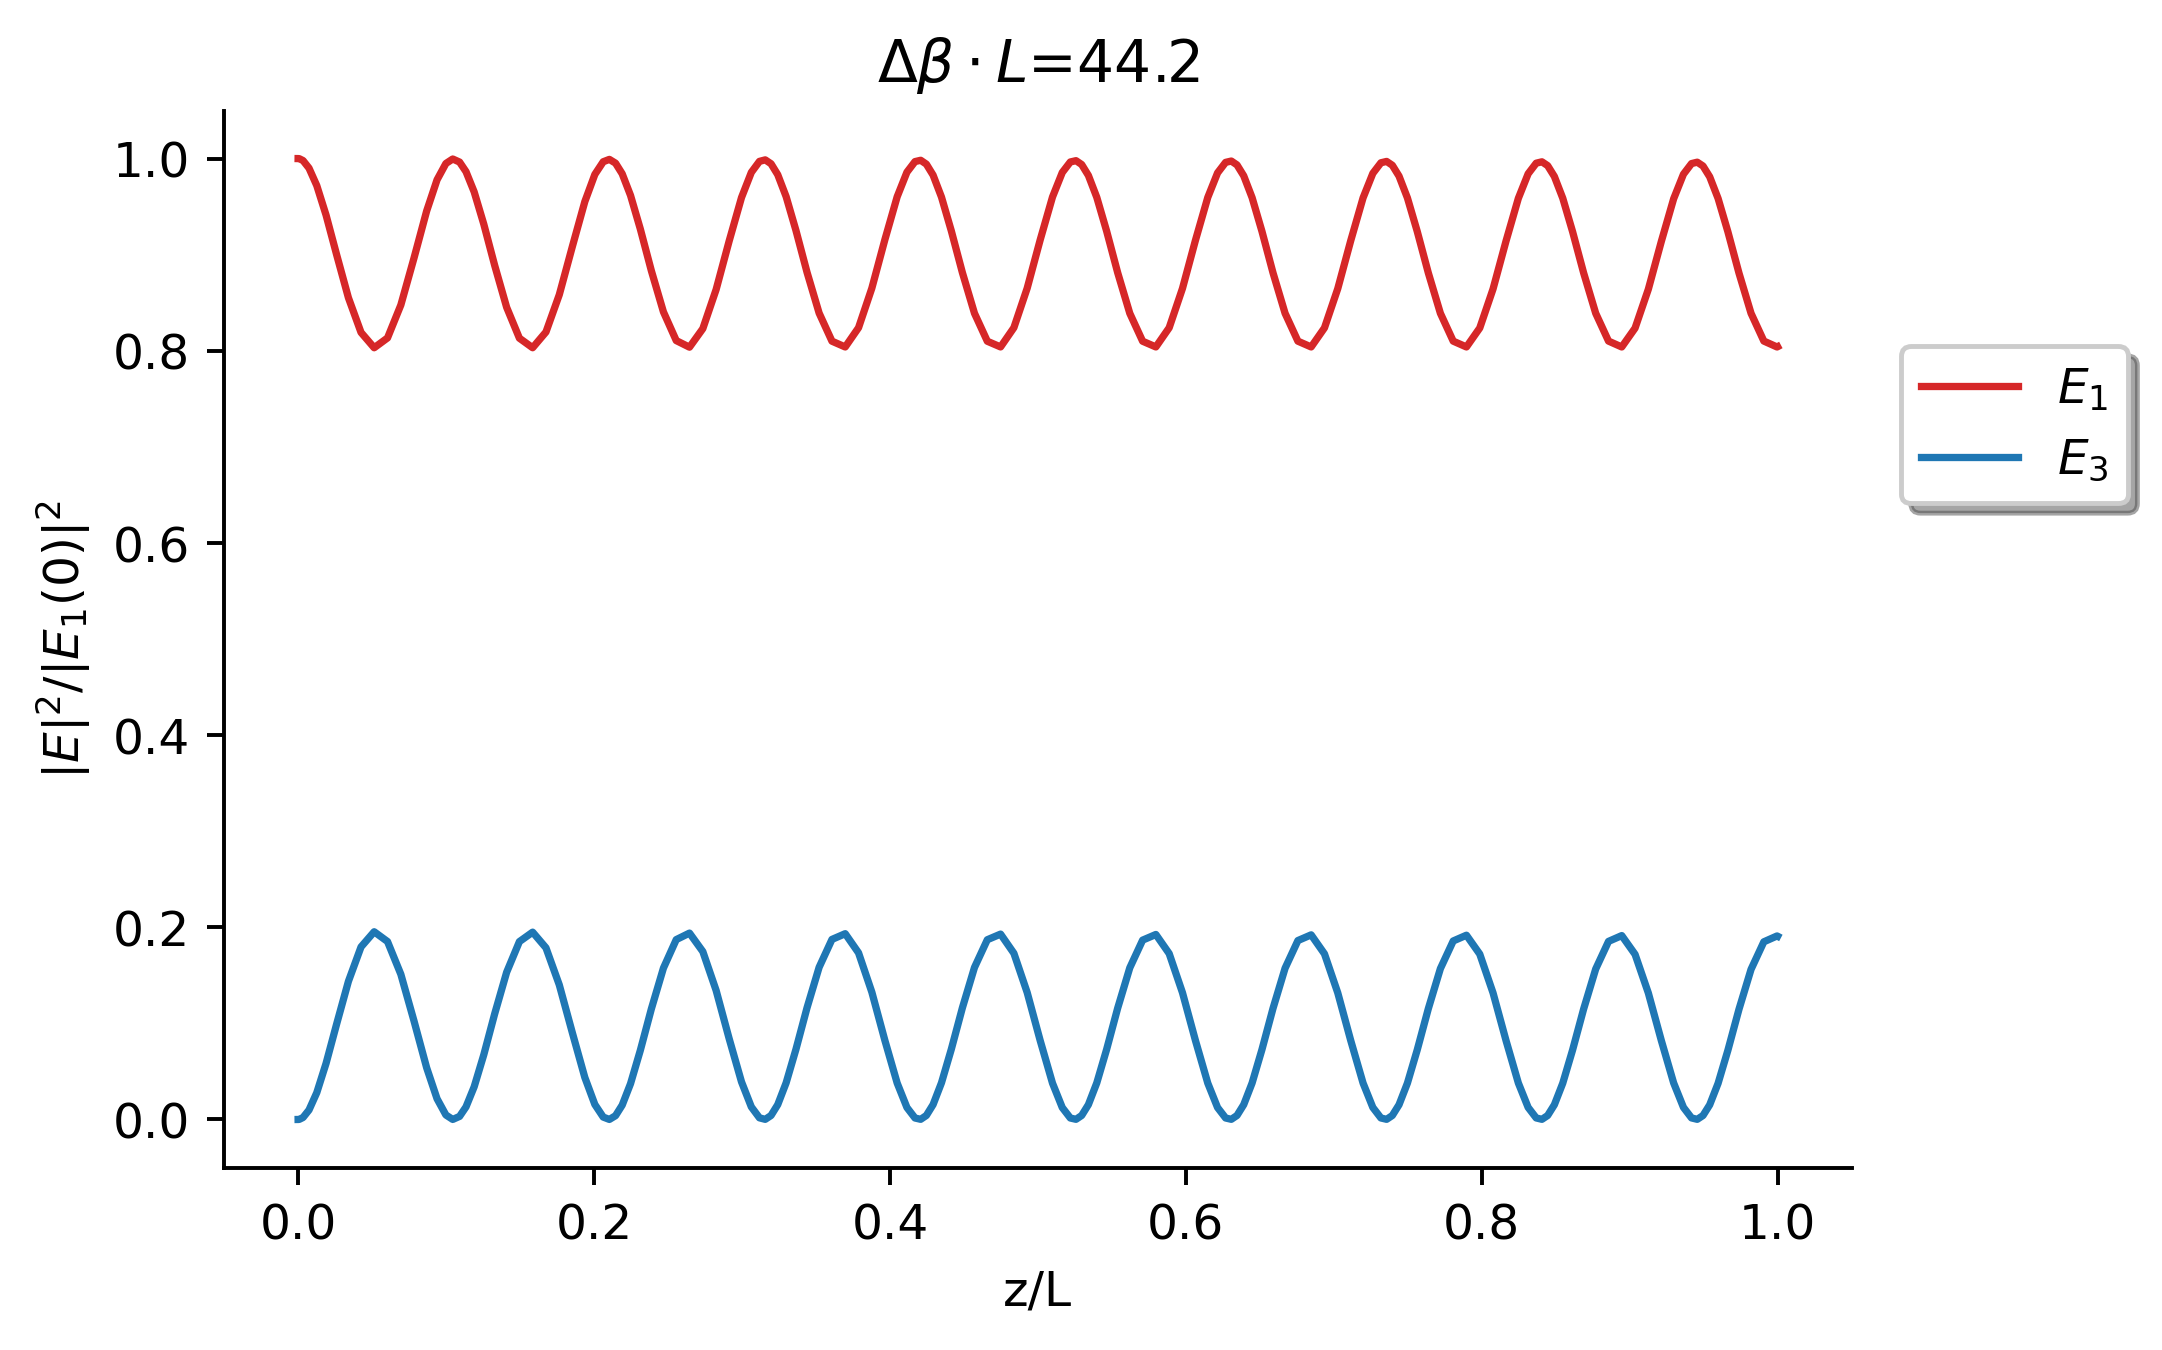

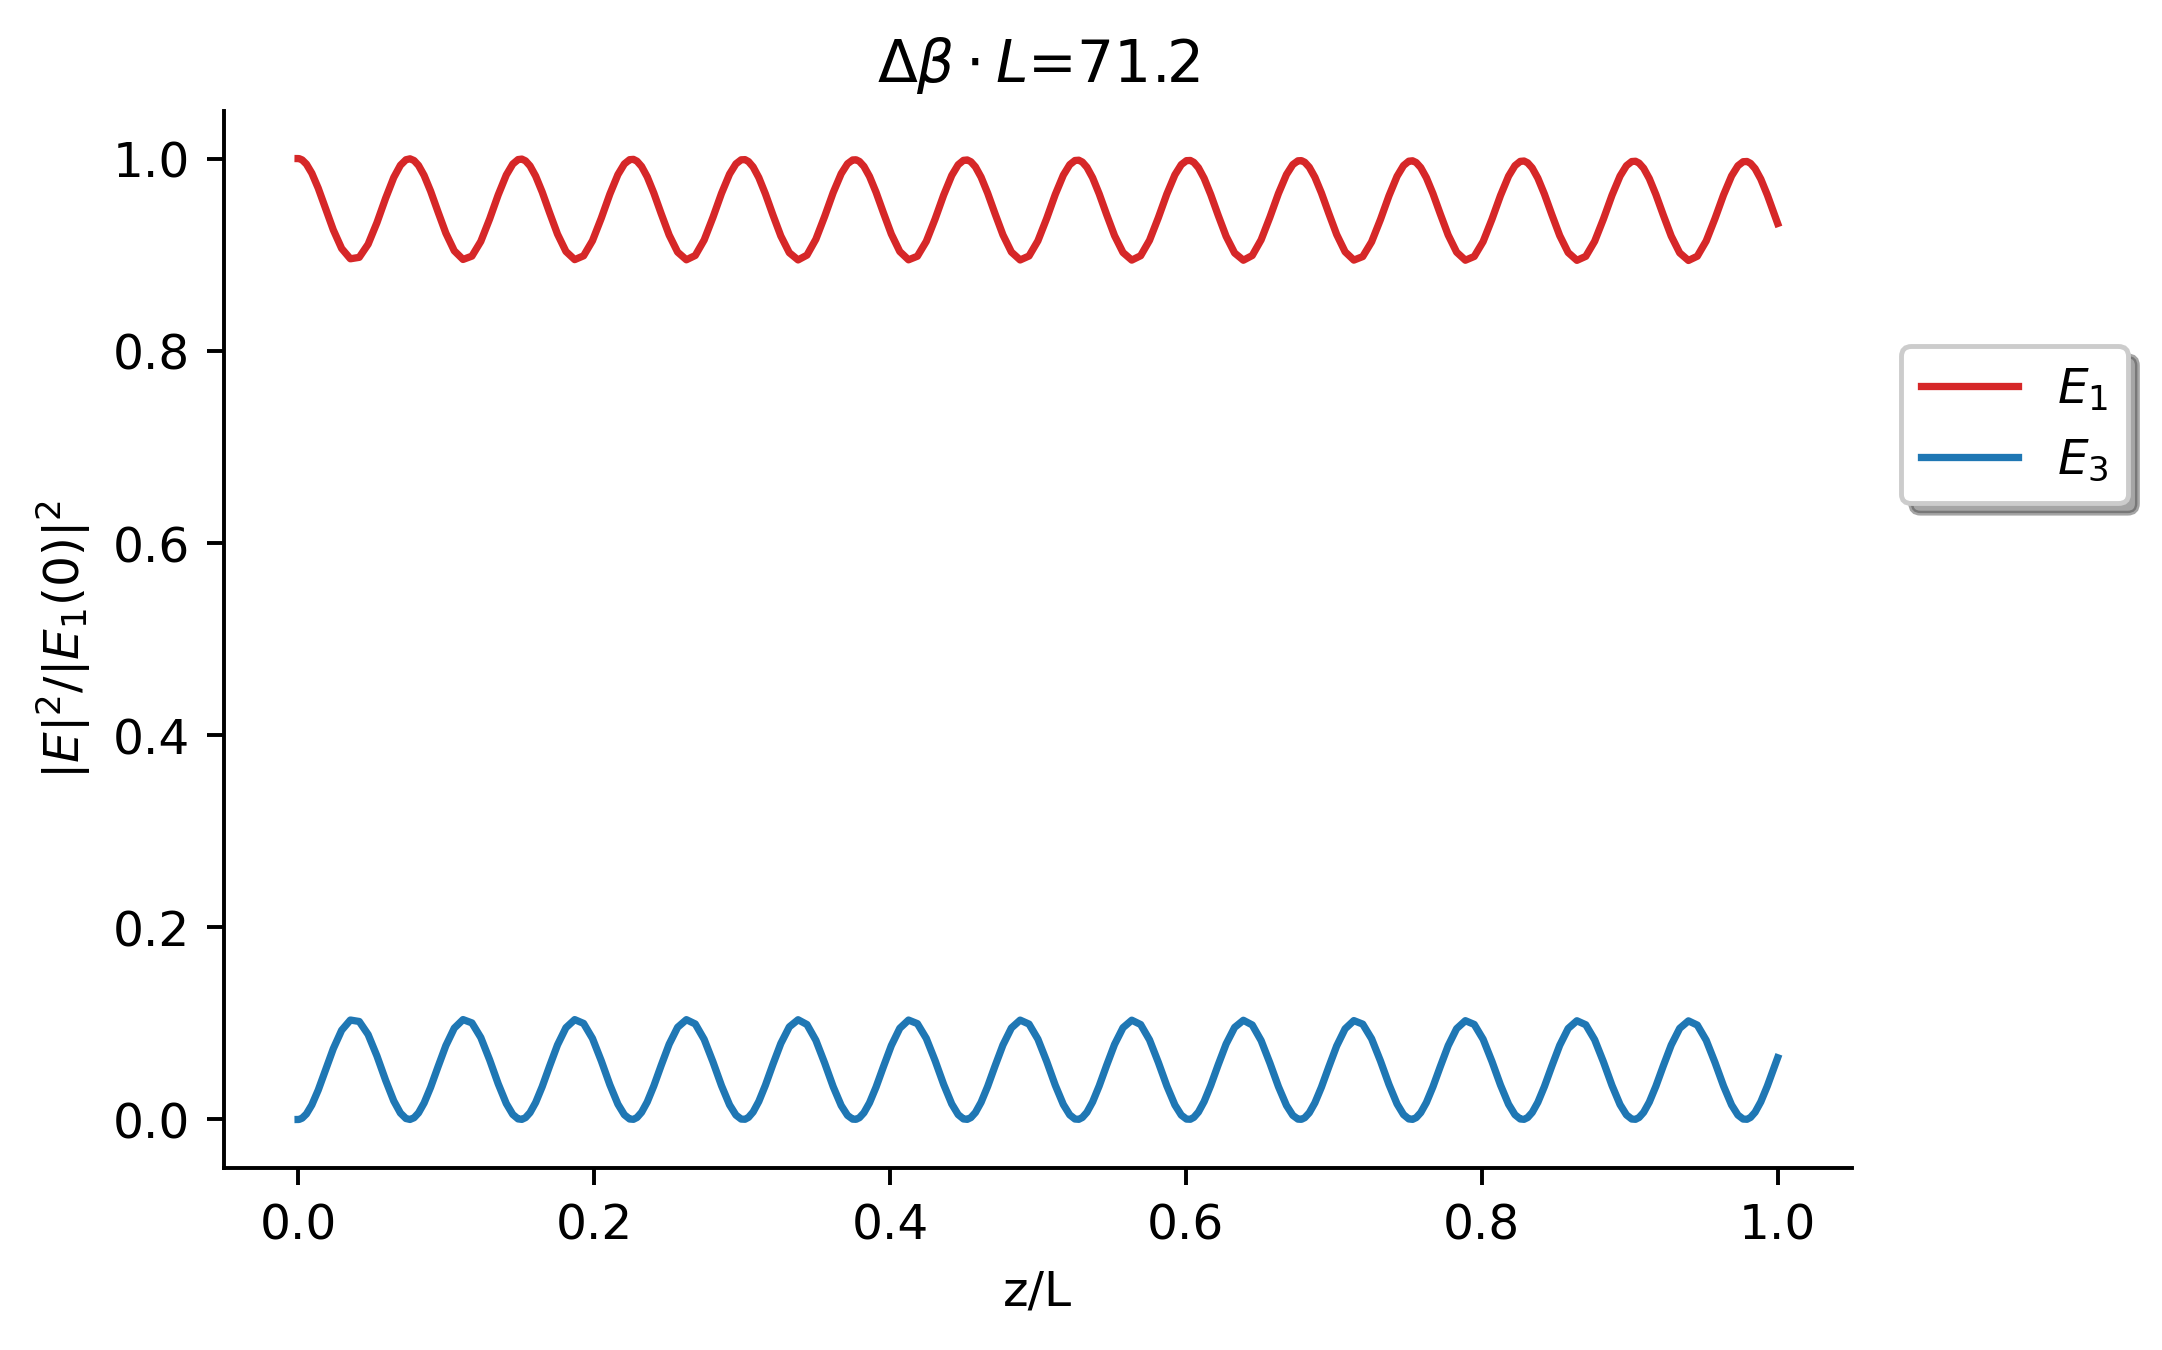

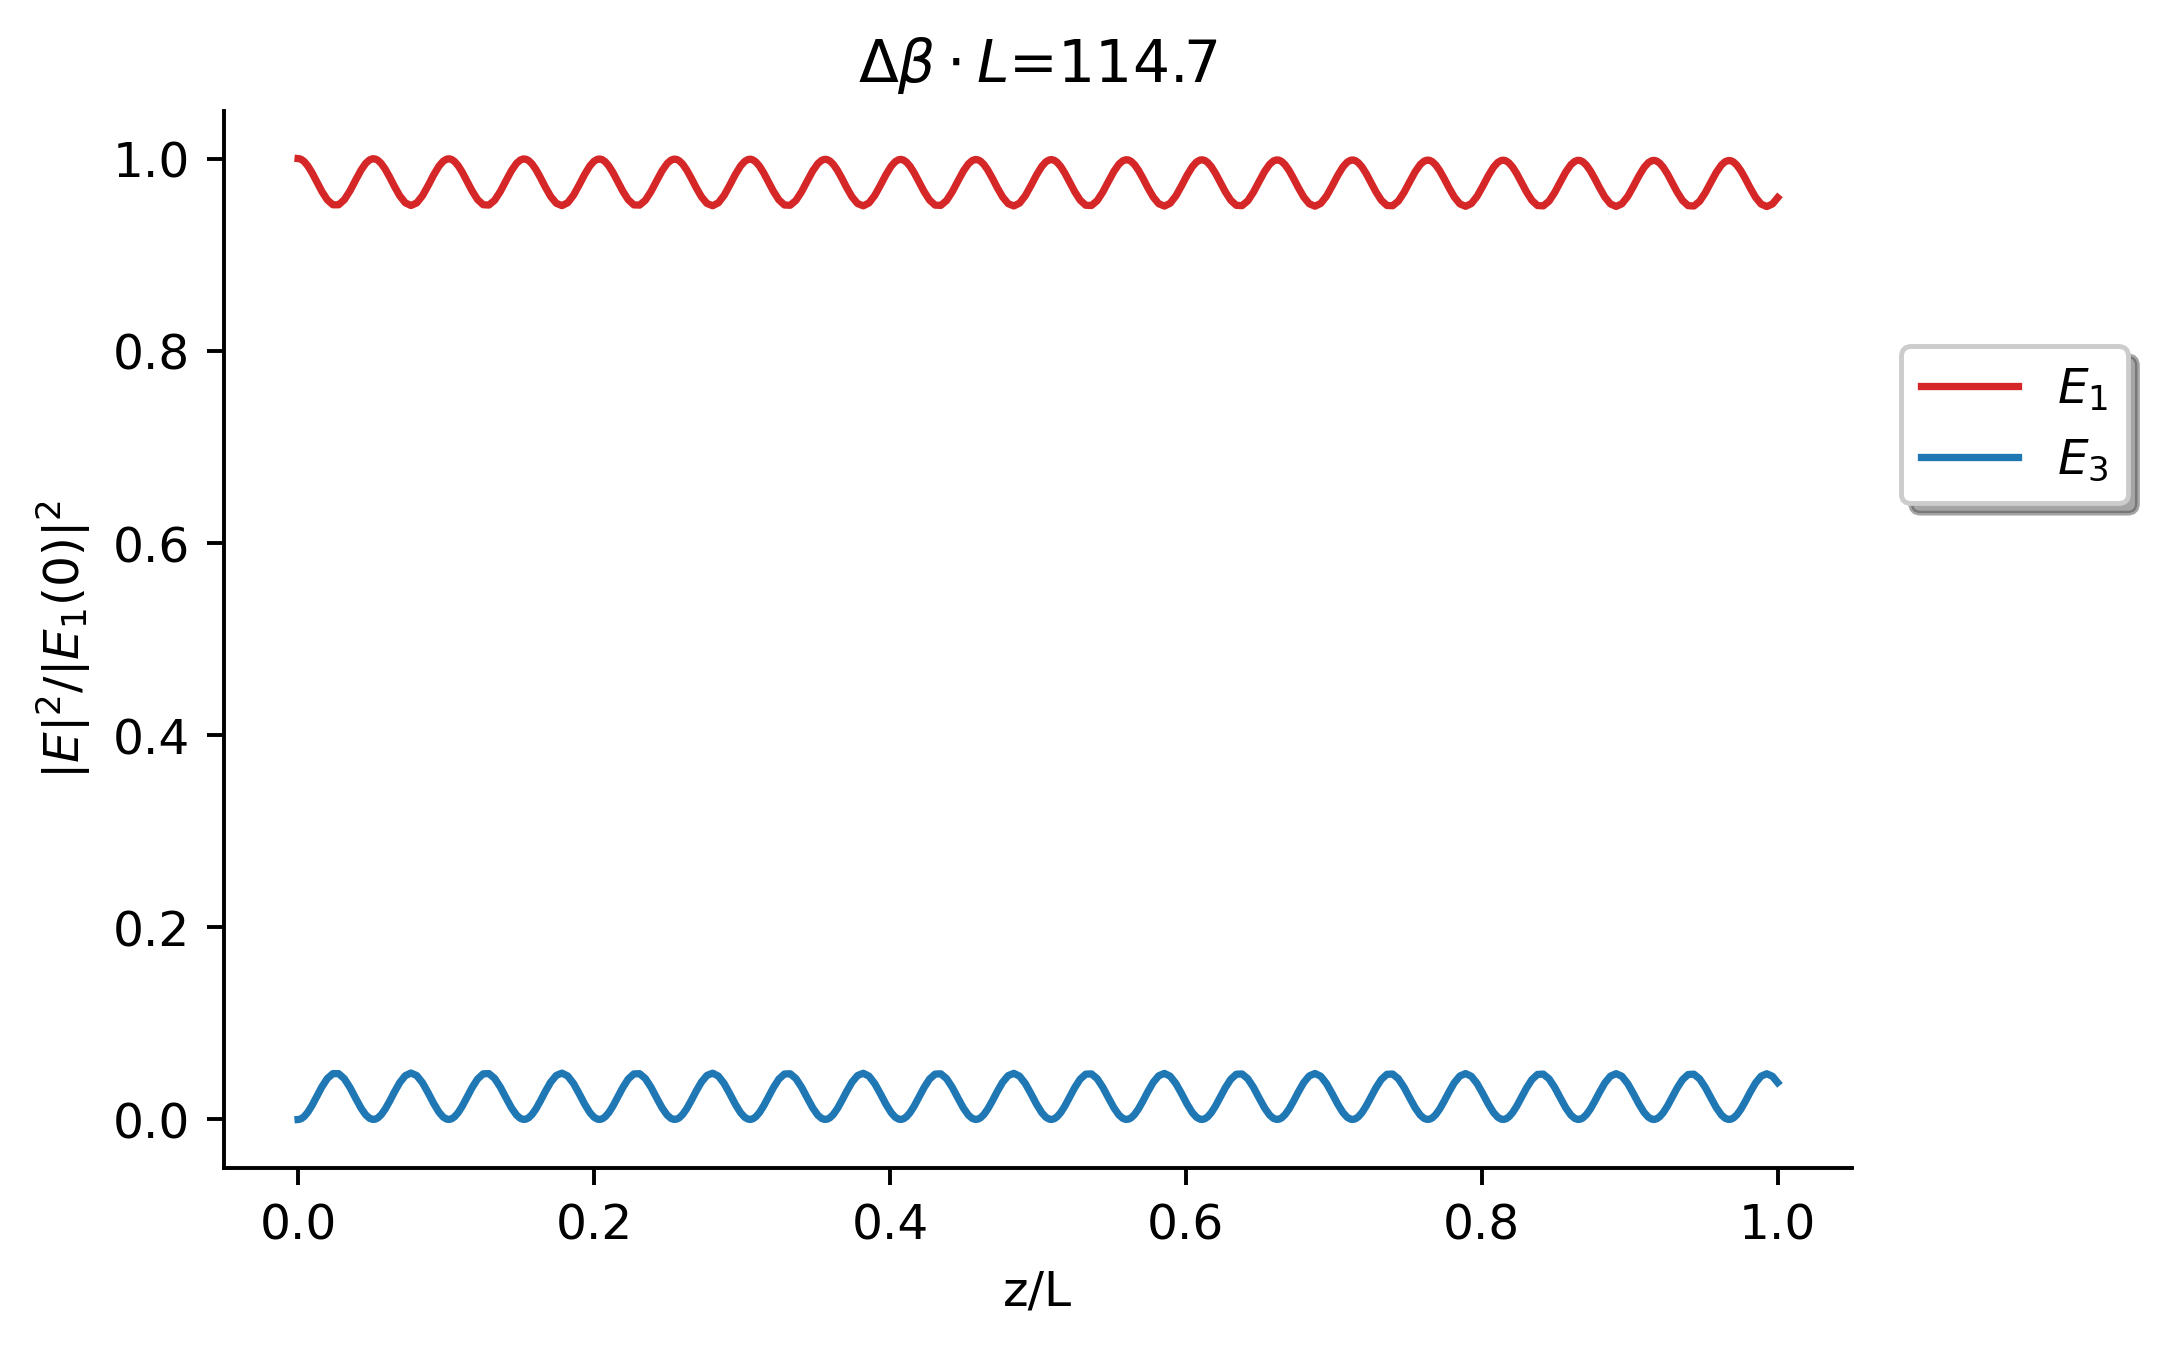

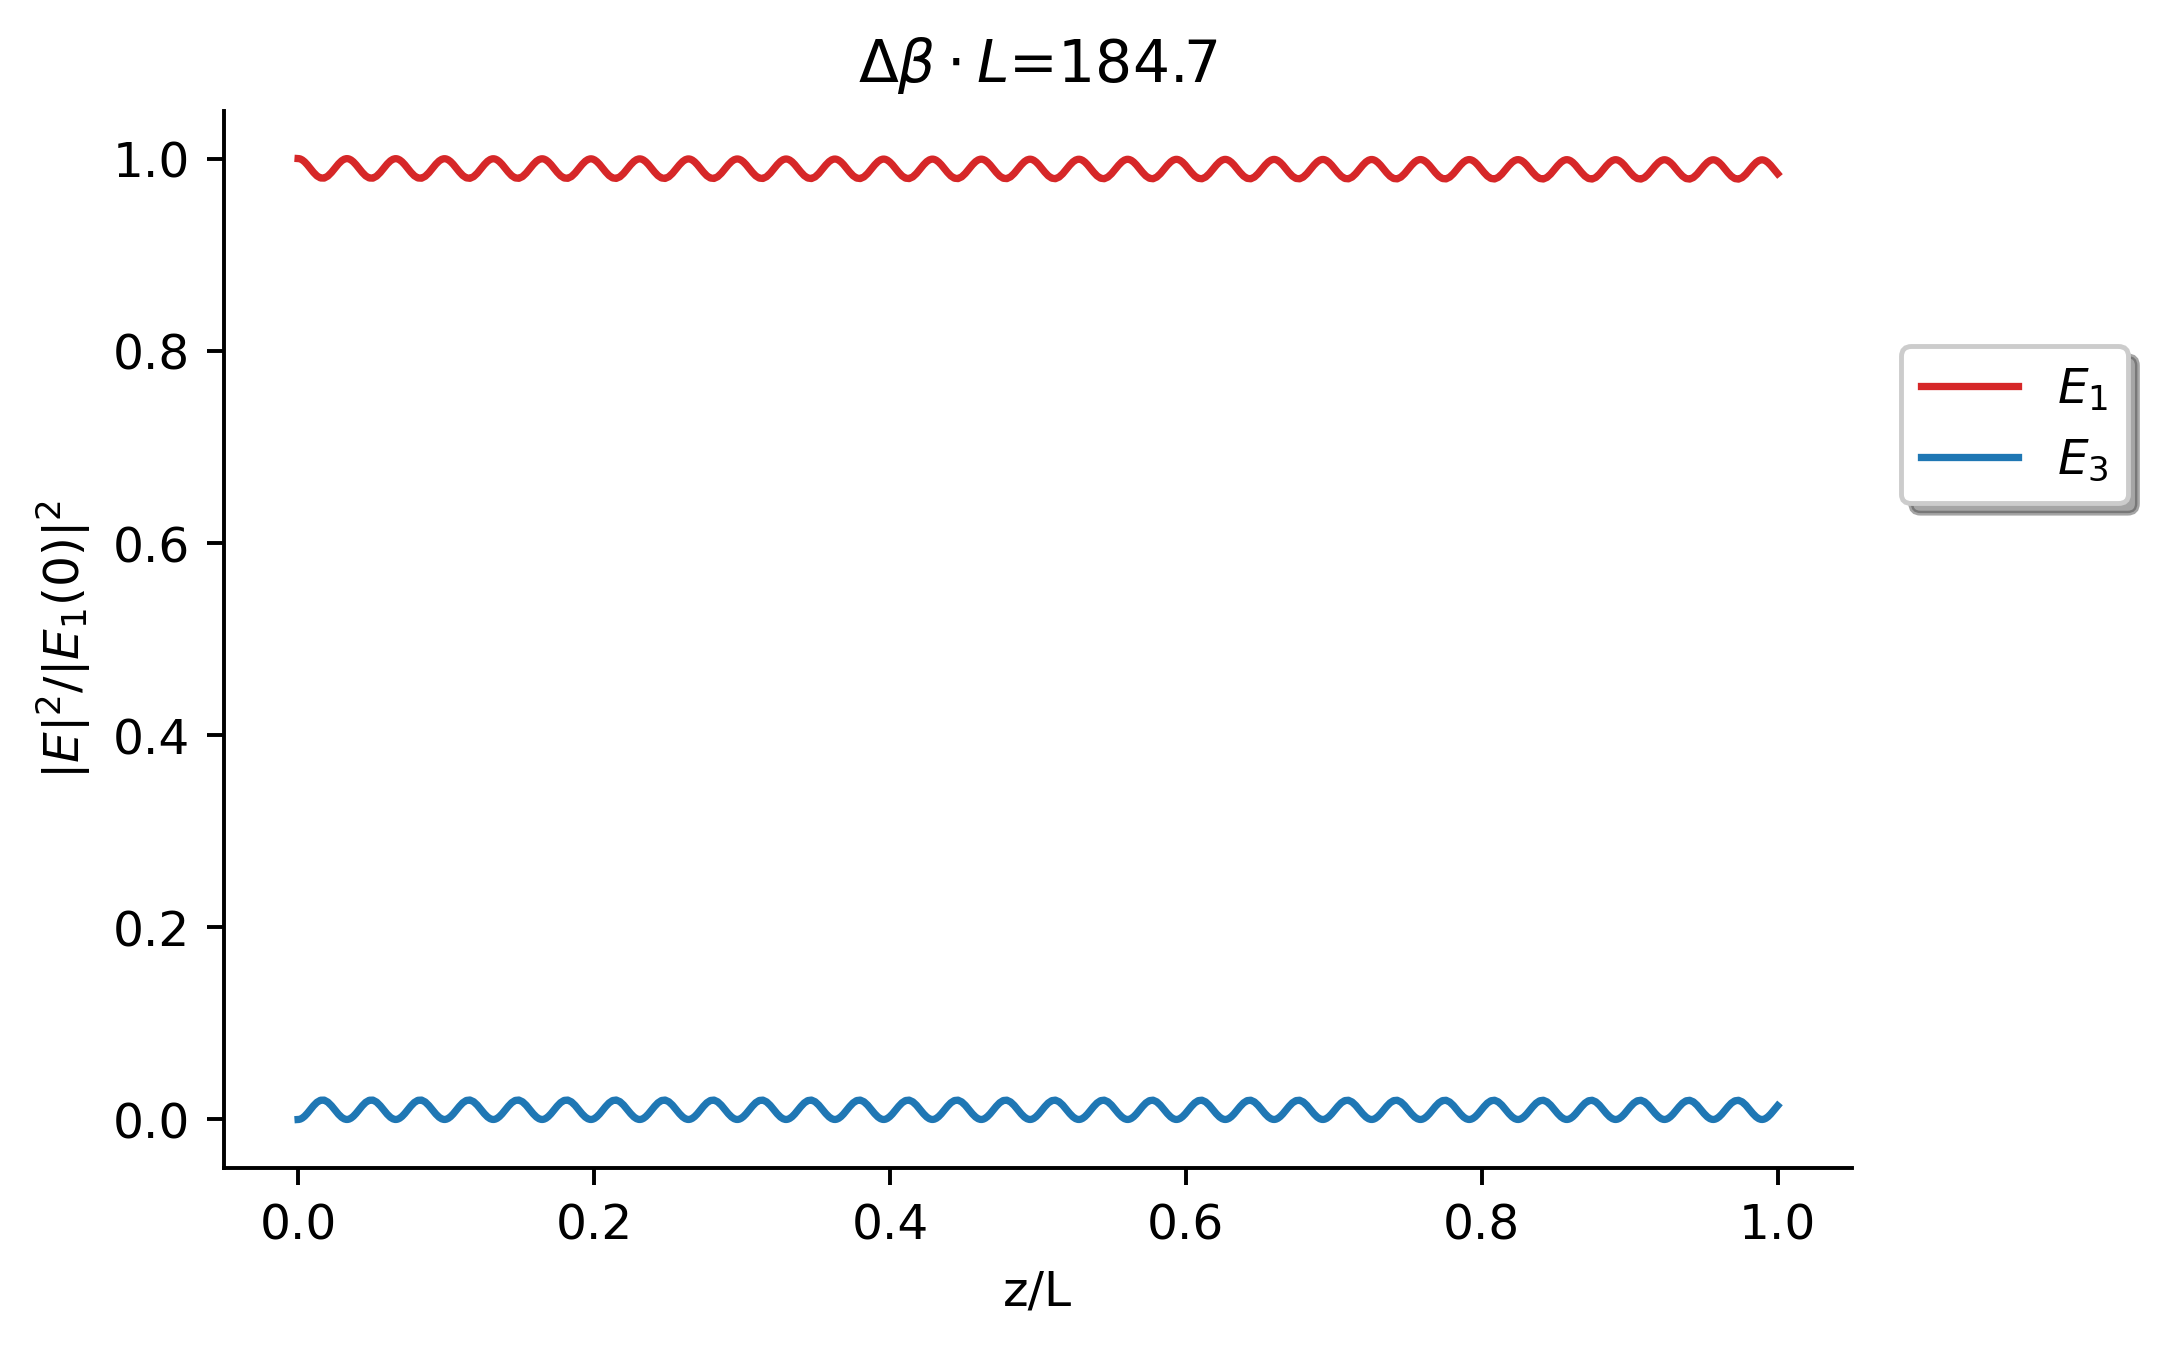

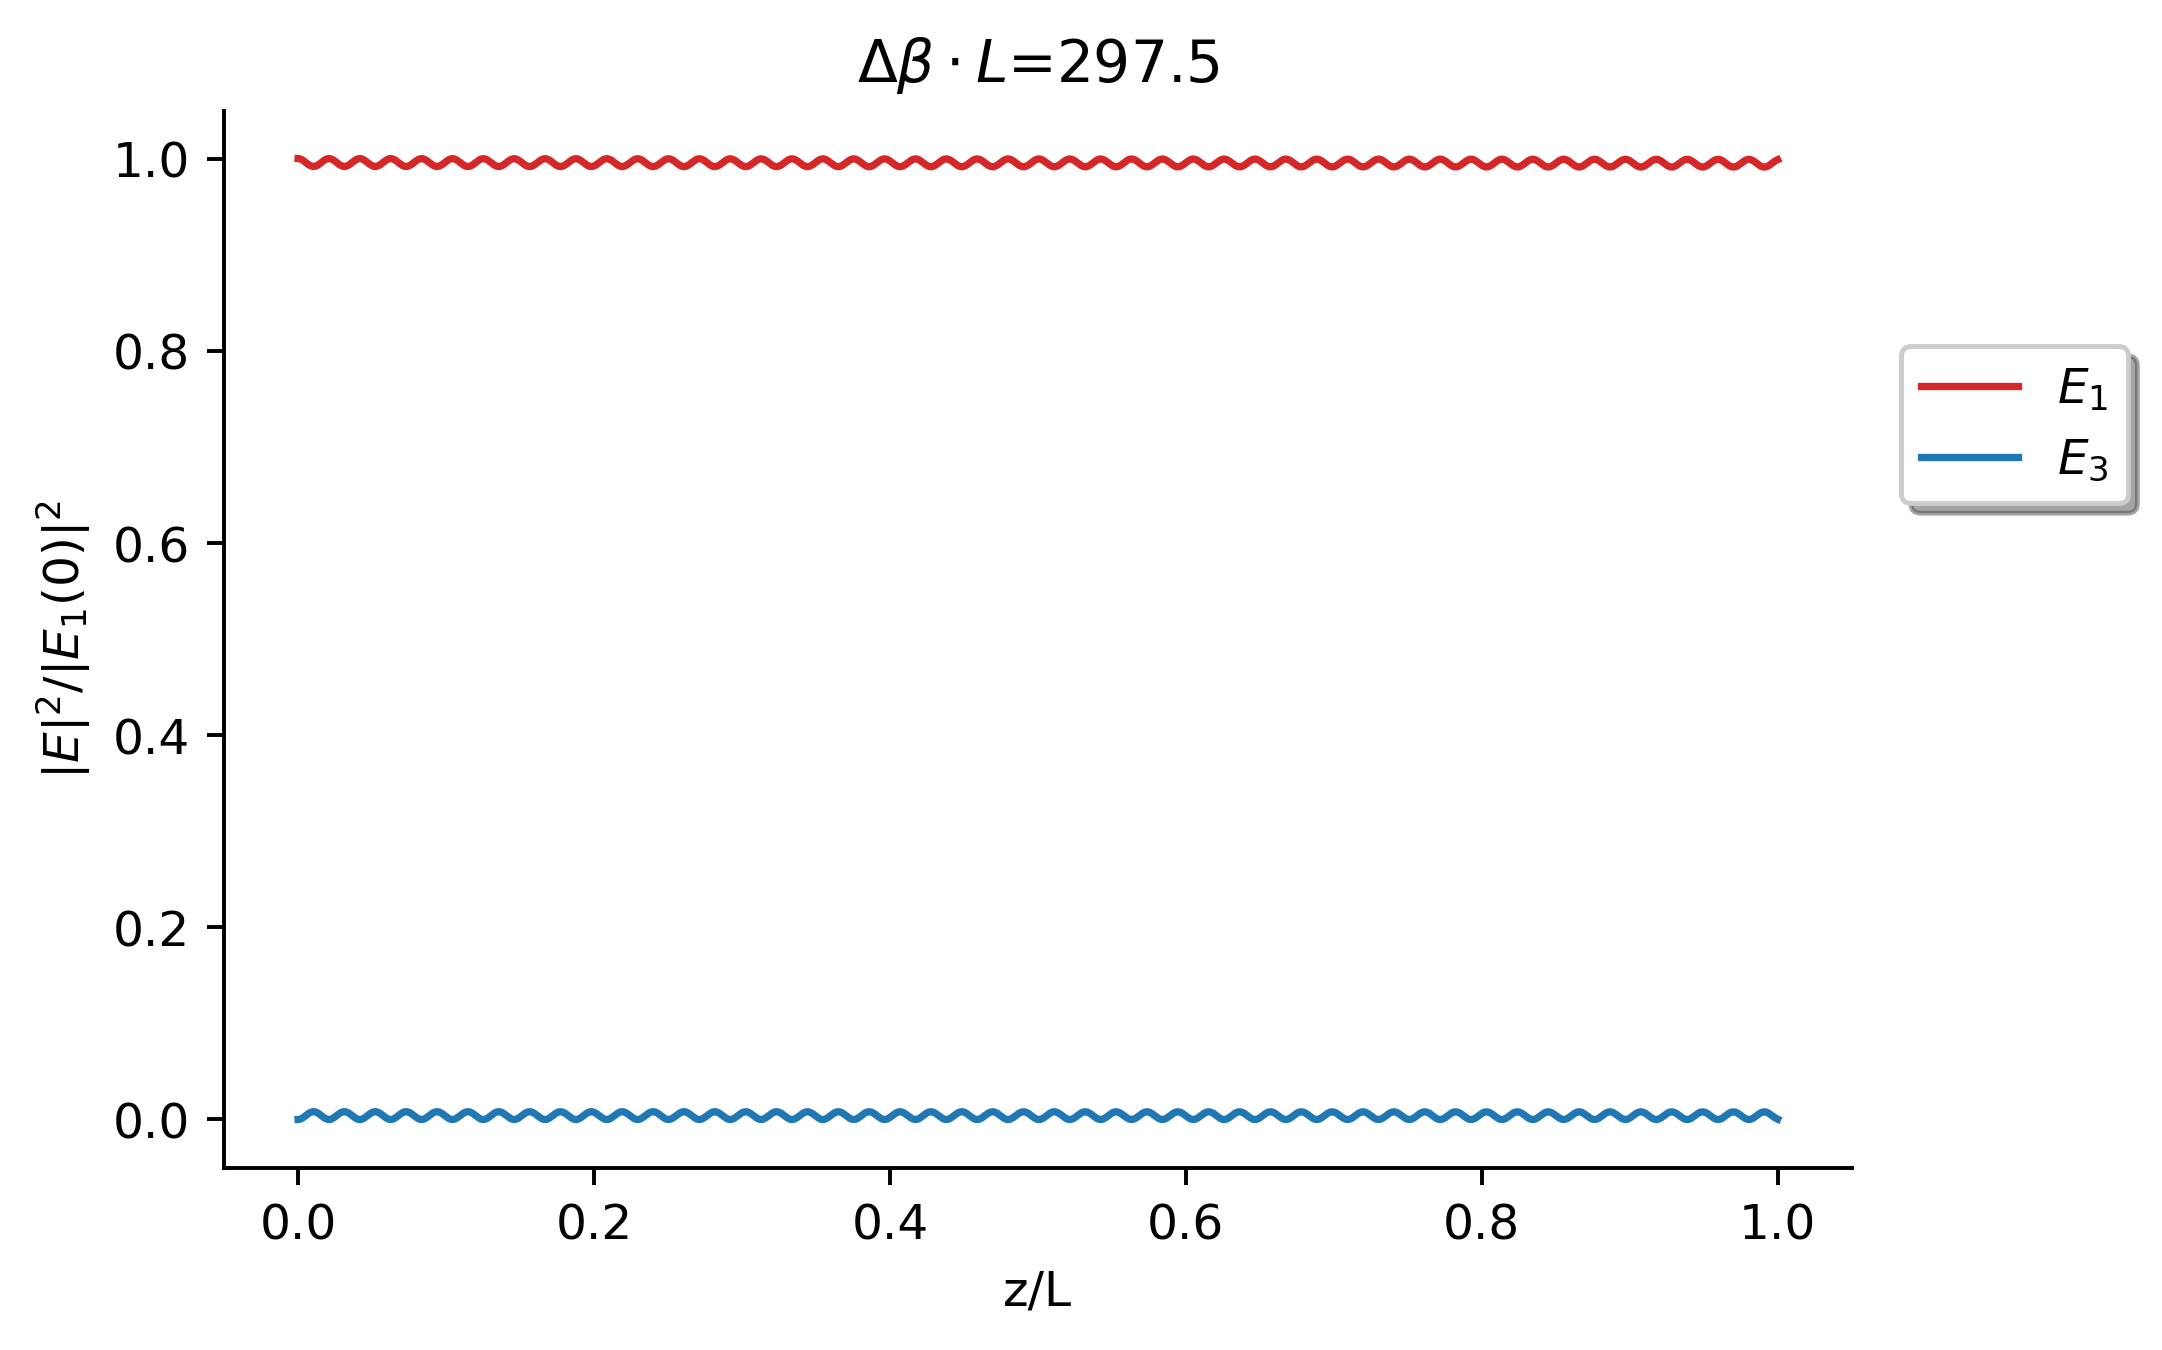

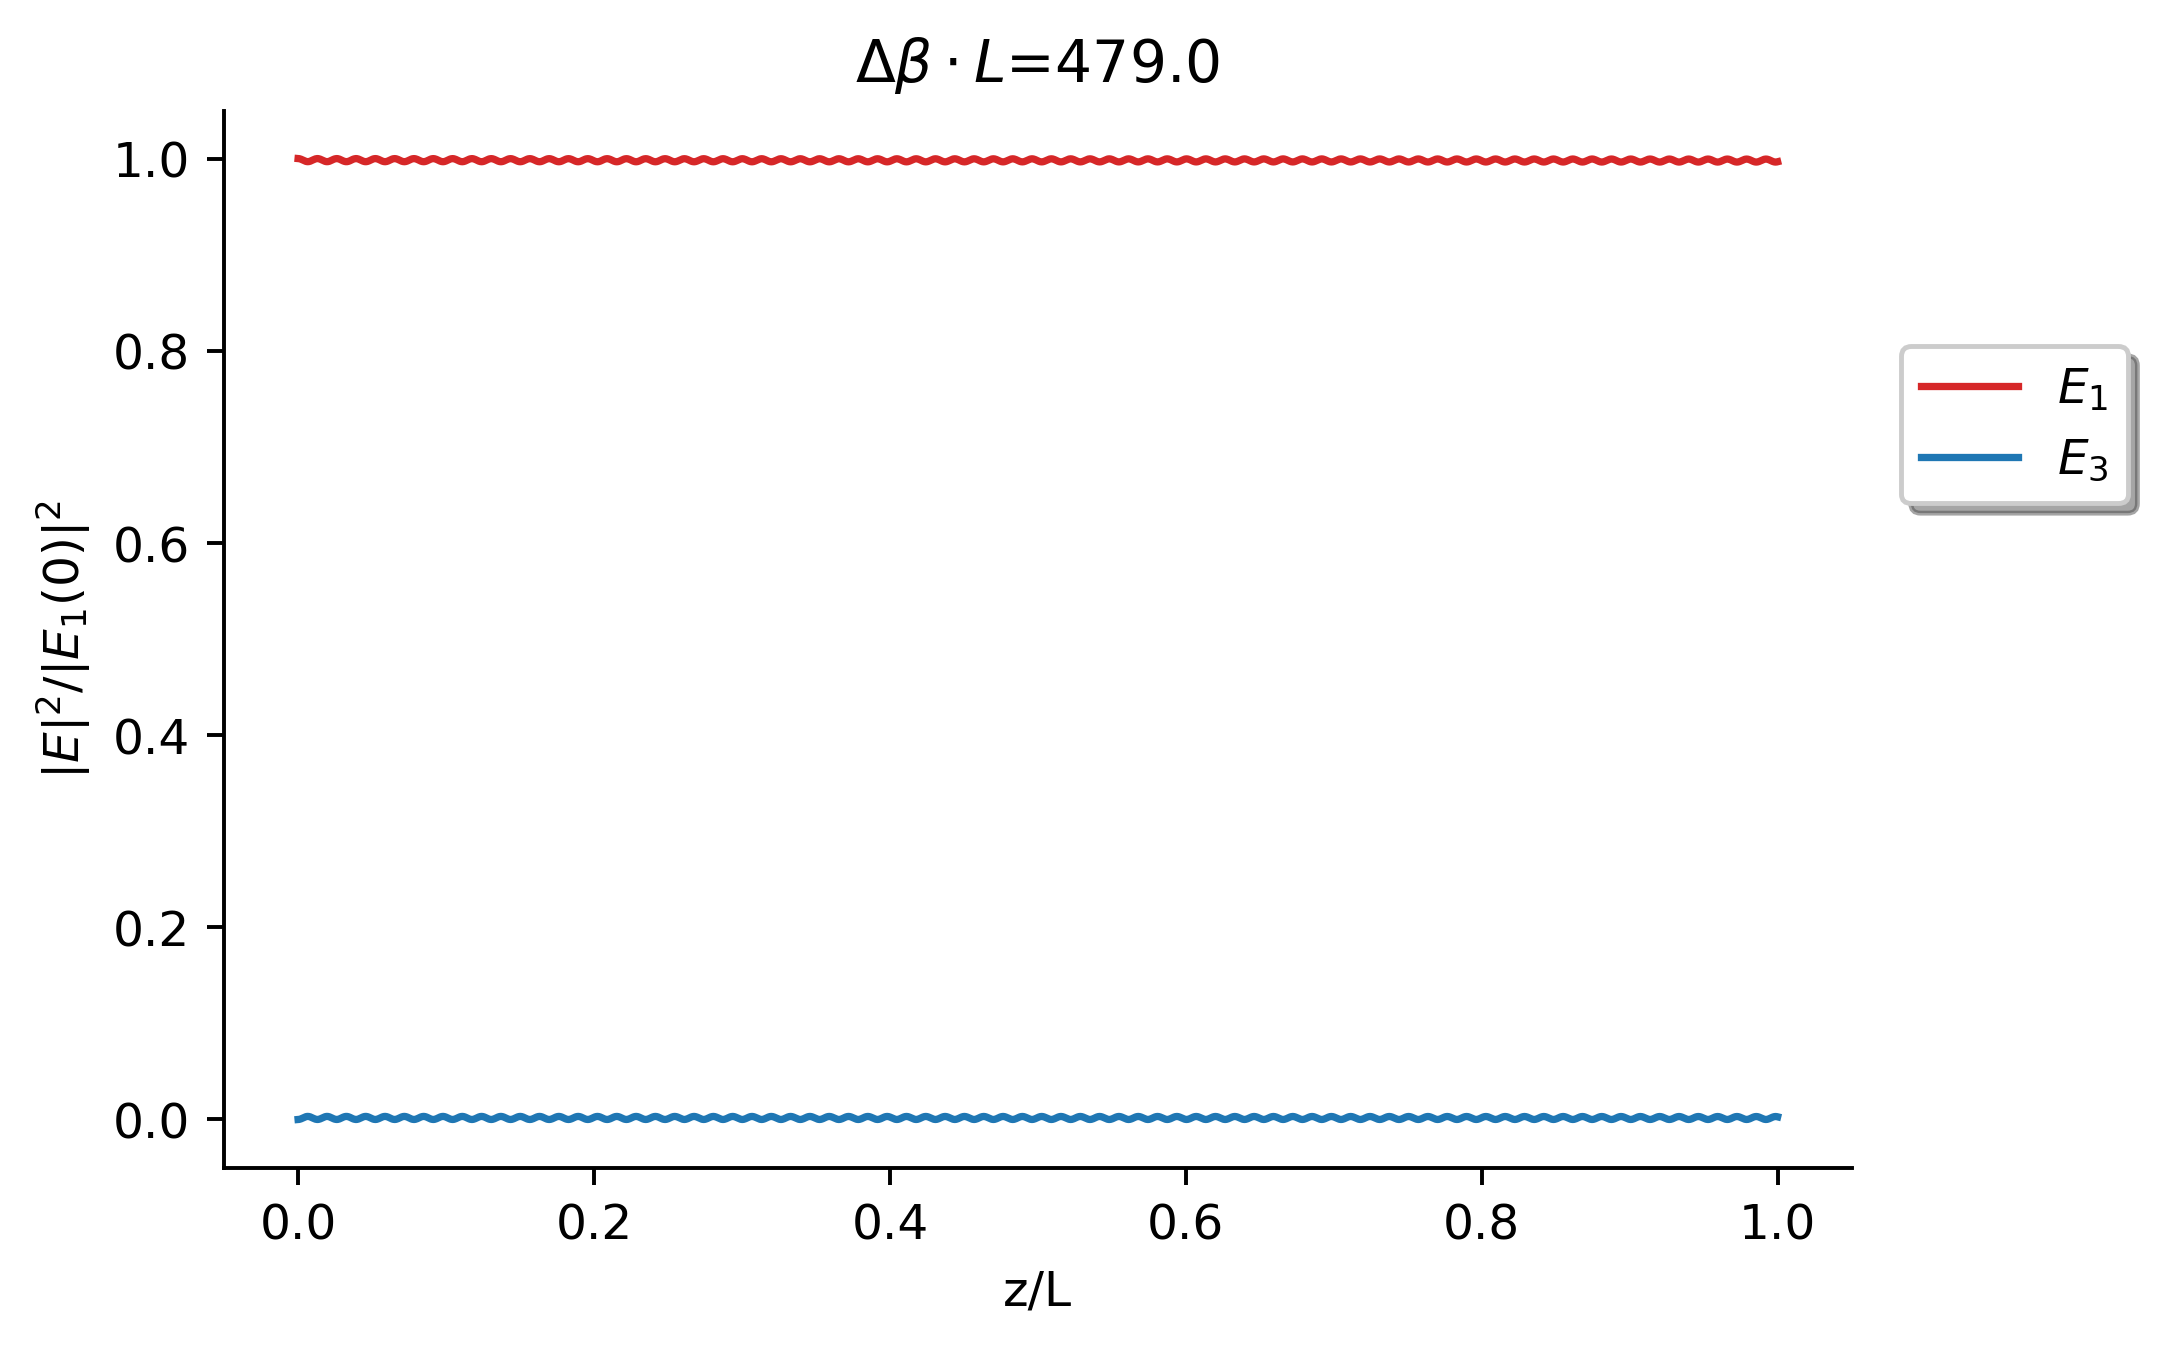

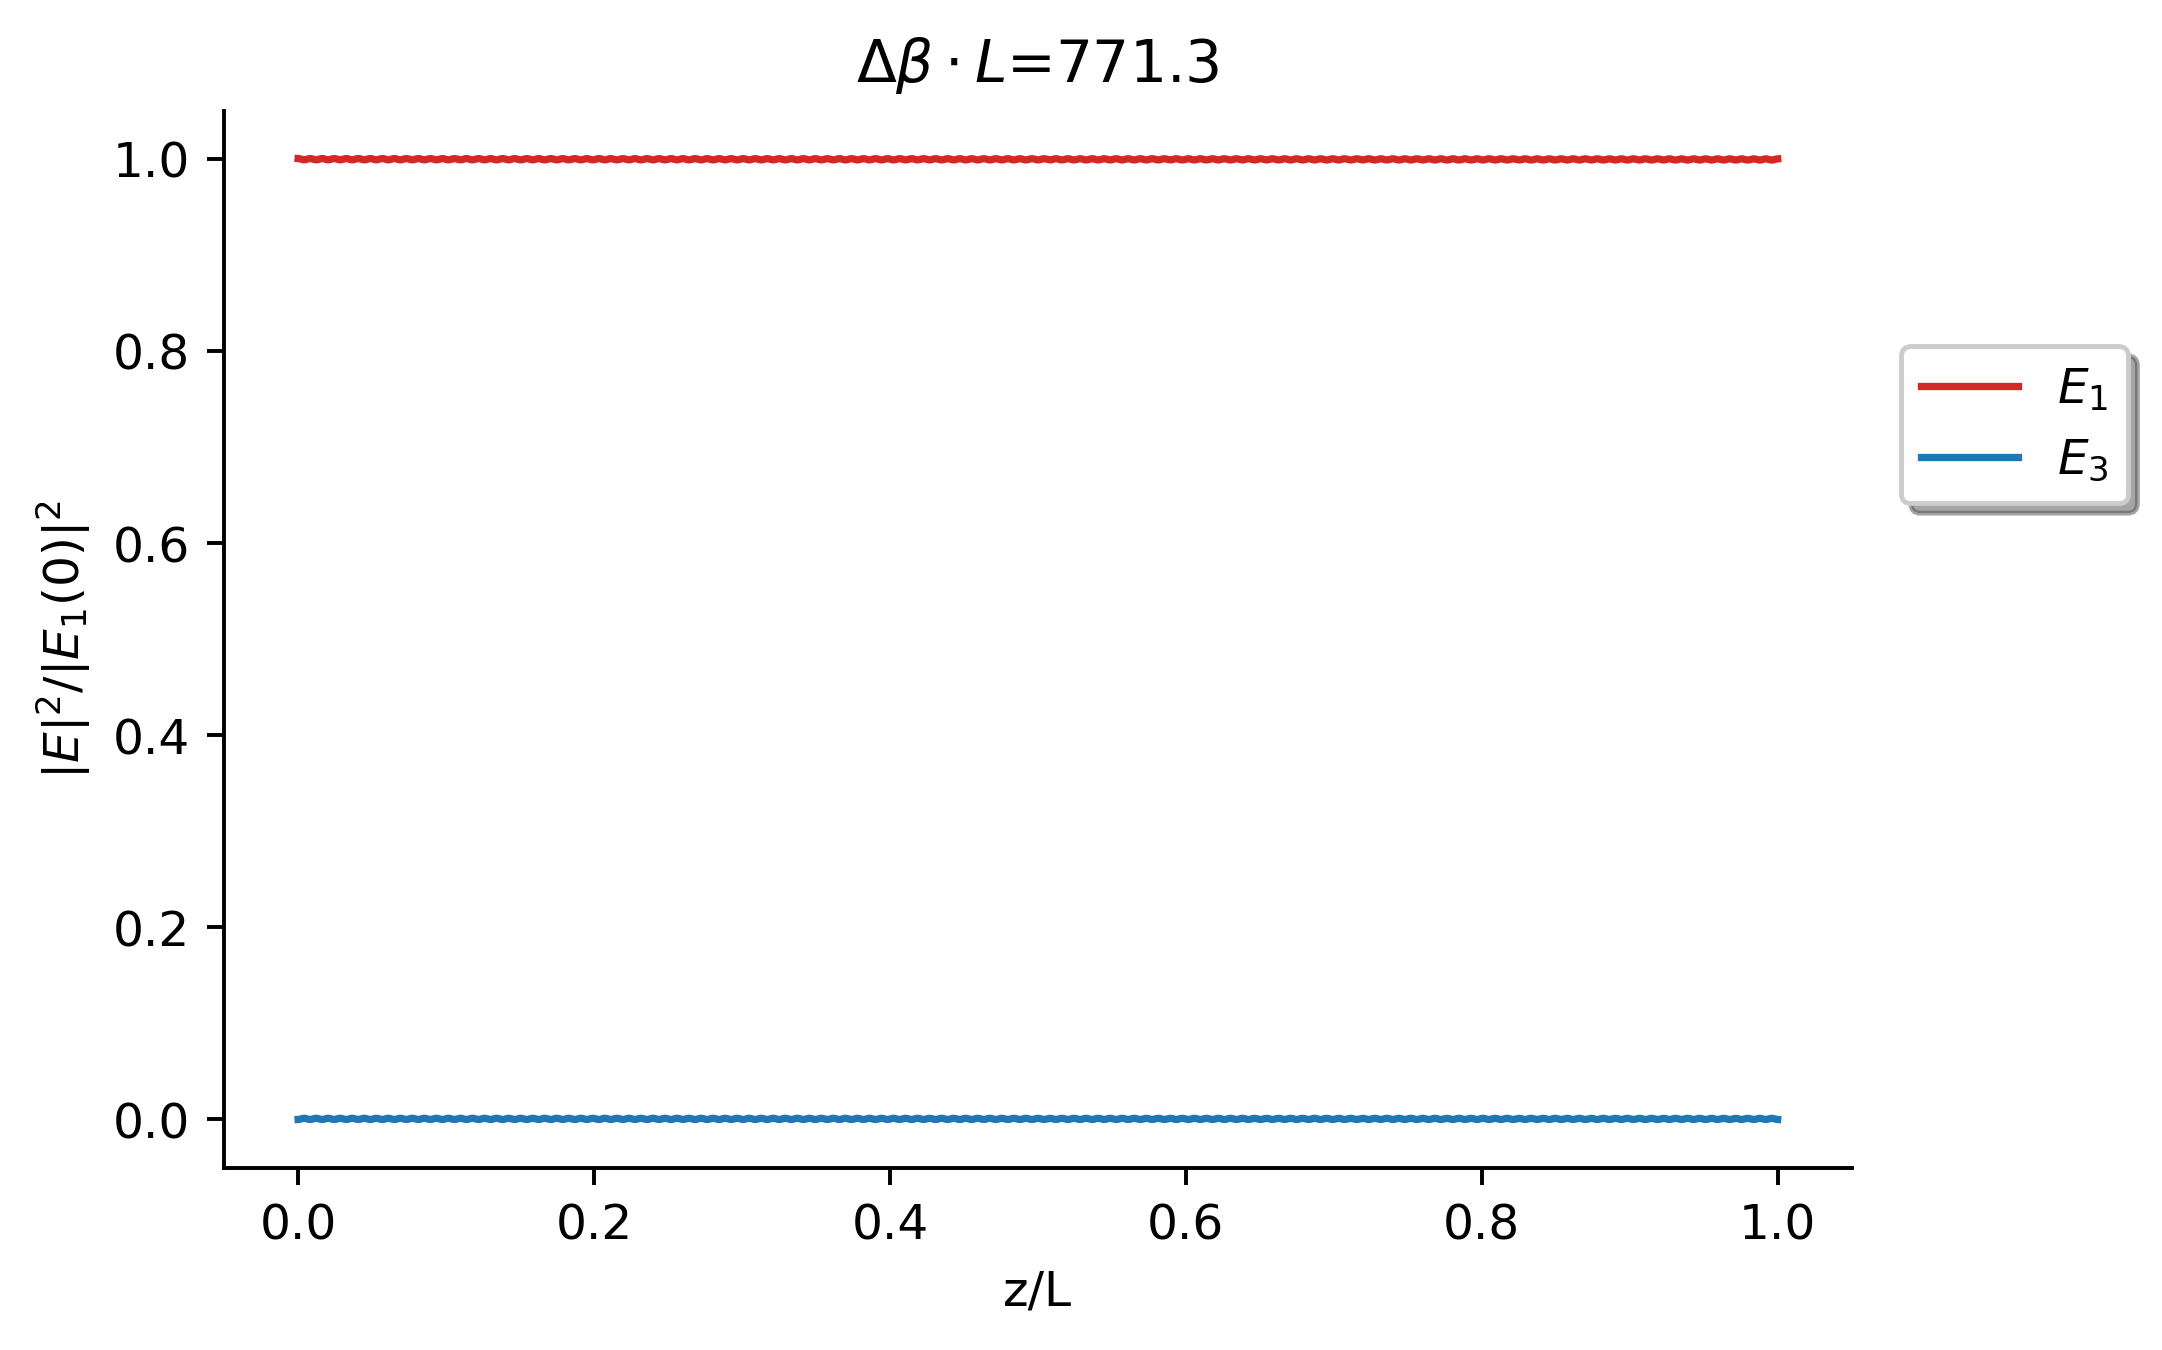

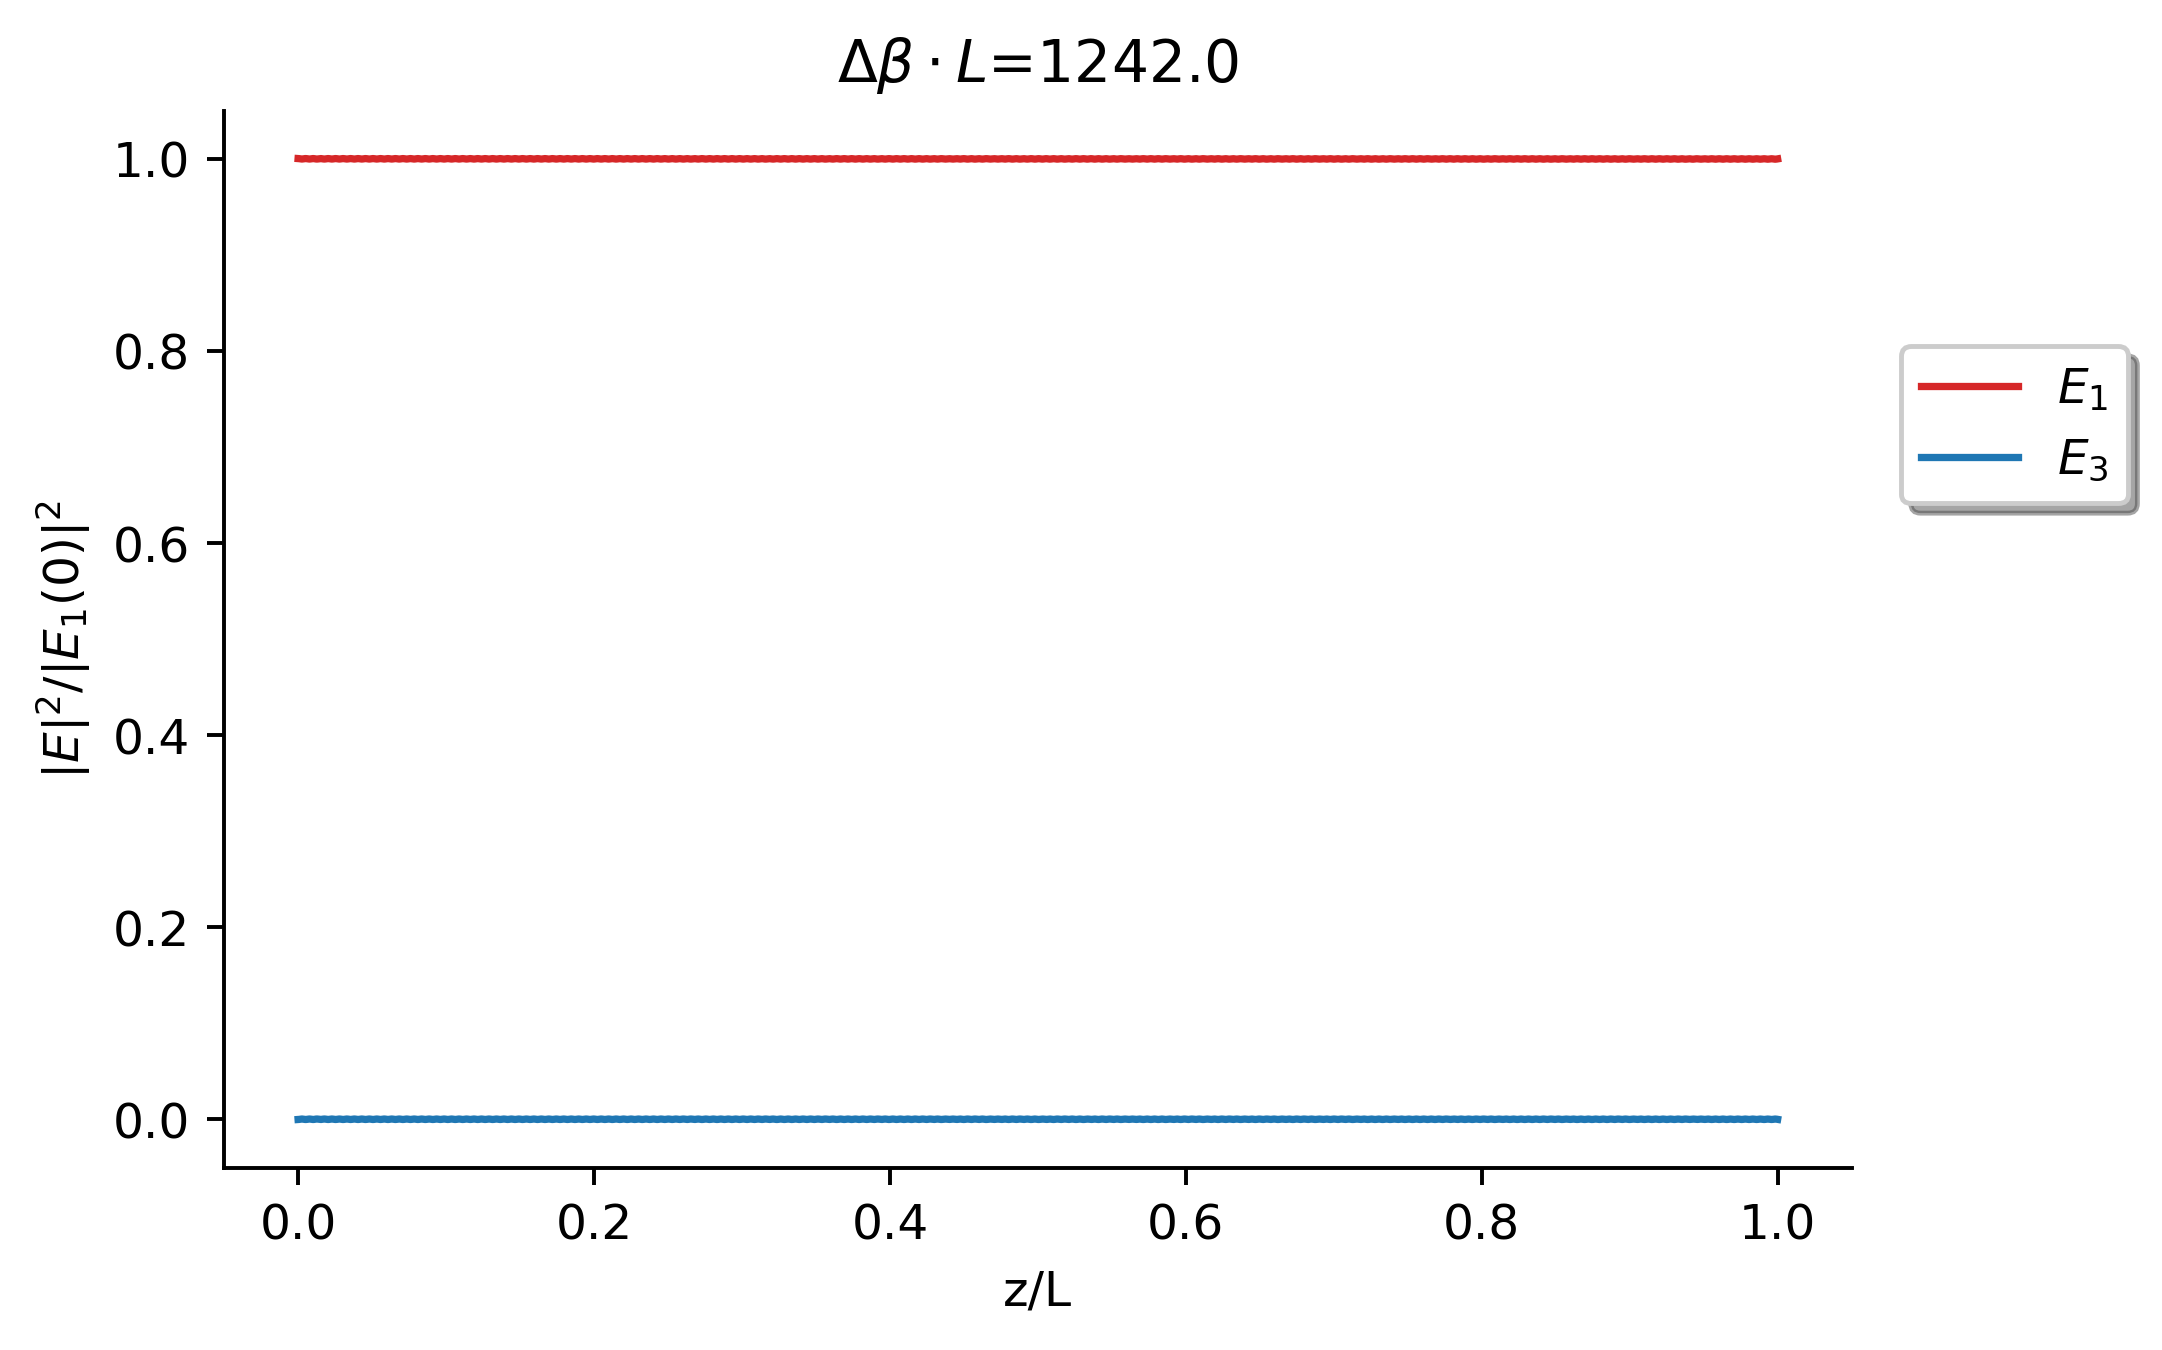

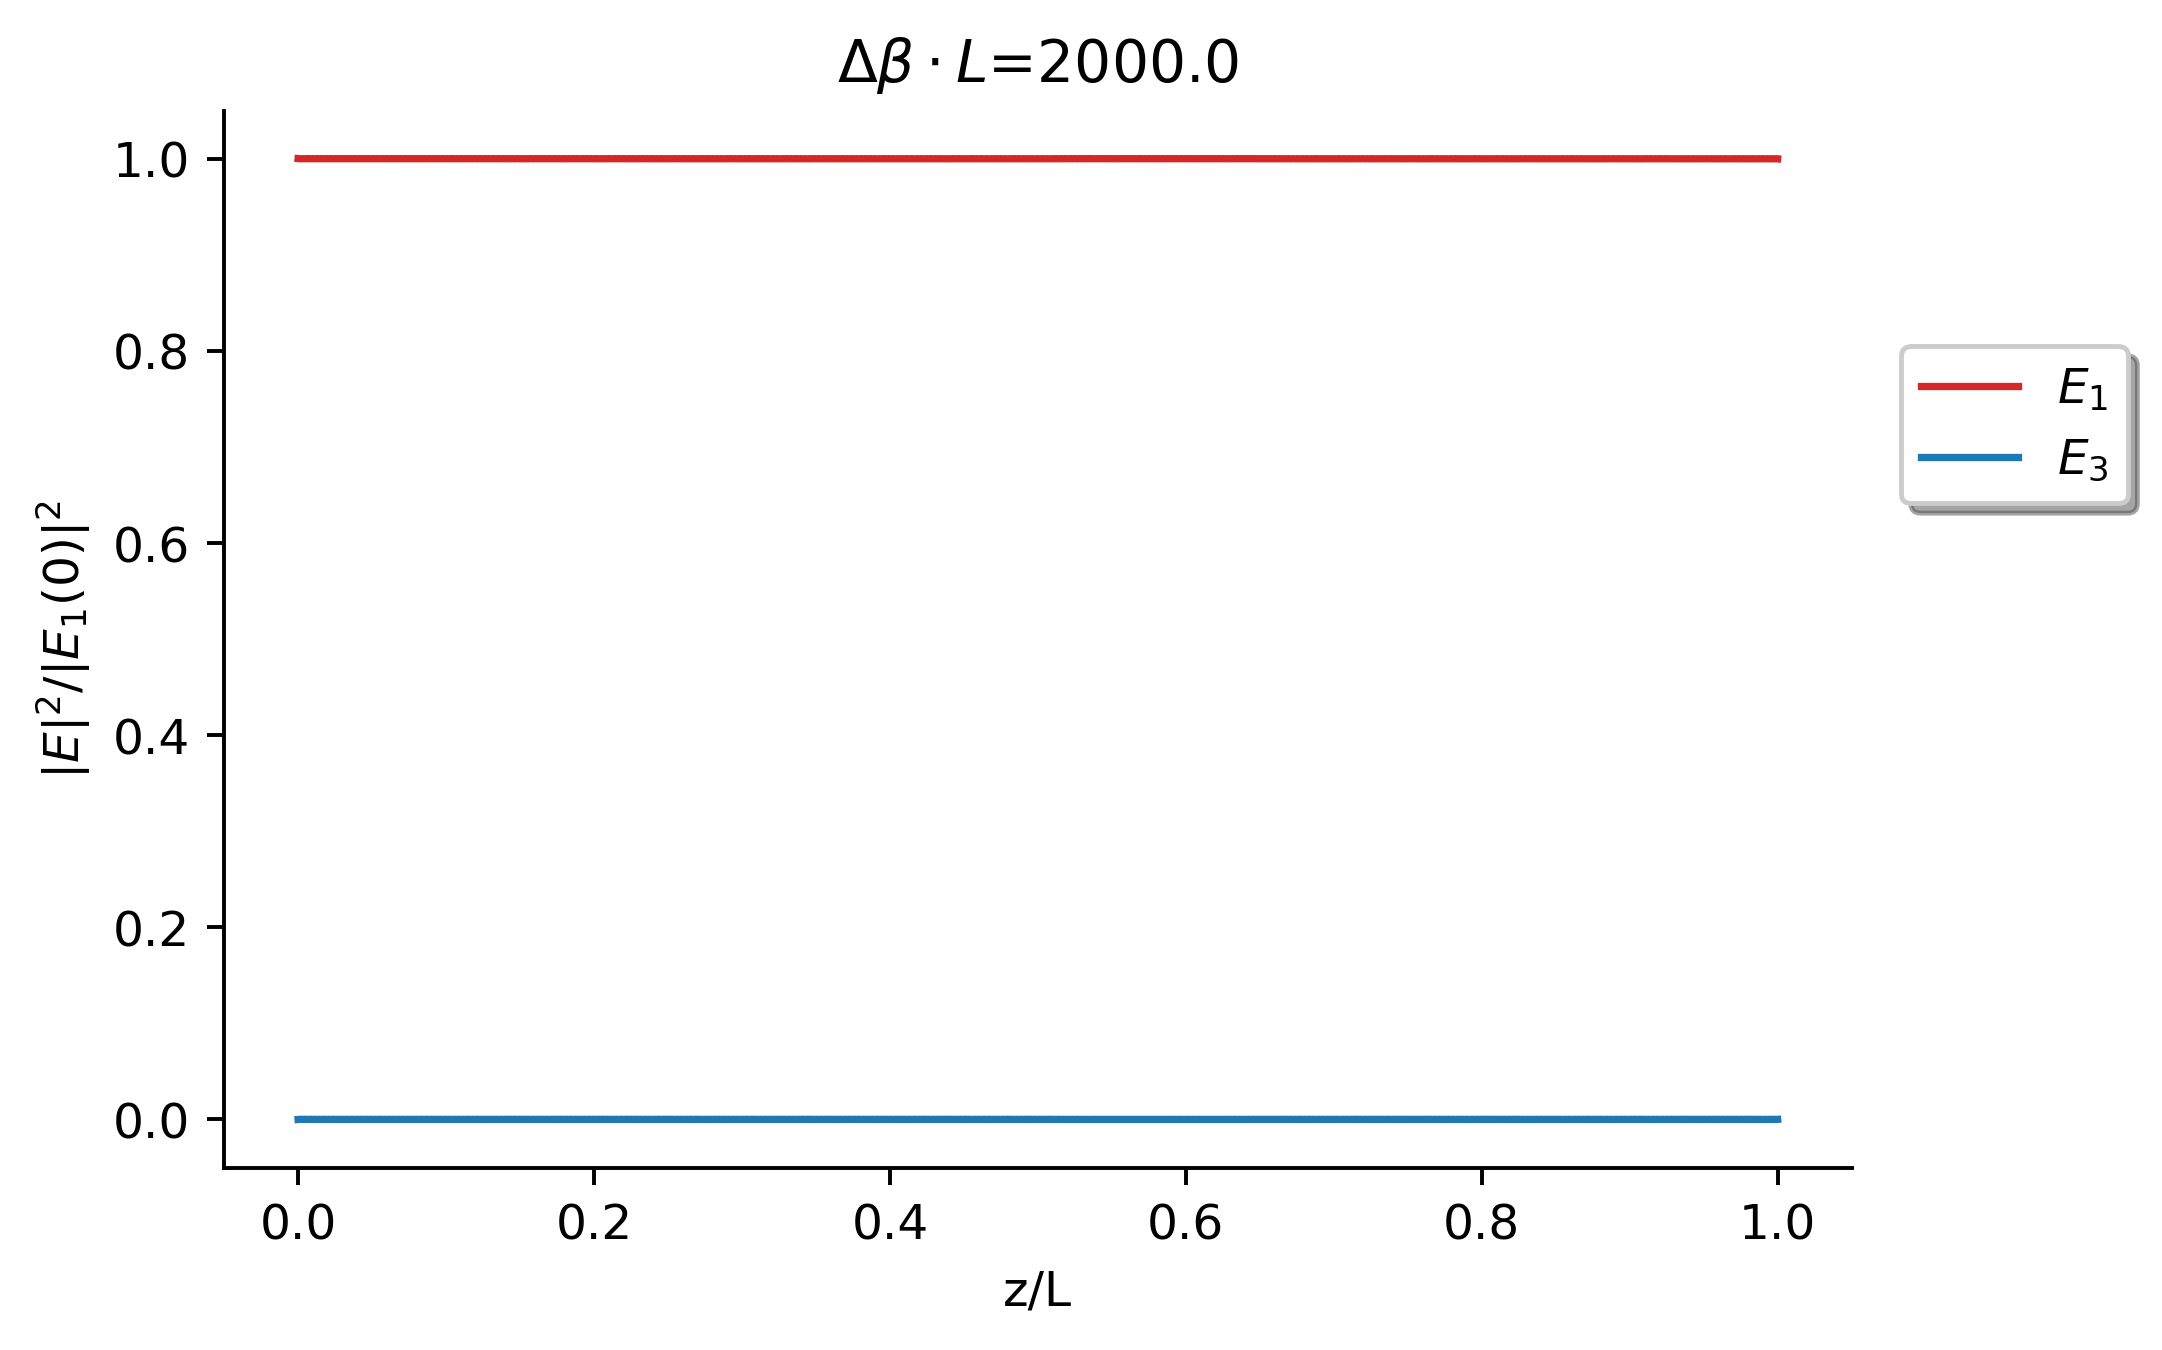

In [3]:
def THG_diff_eqn(z,E,n1,n3,delta_beta):
    
    E1=E[0]
    E3=E[1]
    
    
    dE1_dz=1j/n1*np.conj(E1)**2*E3*np.exp(1j*delta_beta*z)
    dE3_dz=1j/n3*E1**3*np.exp(-1j*delta_beta*z)
    
    return np.array([dE1_dz,dE3_dz])


n1=1.46
n2=1.47


E1_0 = 10000*(1+0j) 
E3_0 = 0*(1+0j) 

z_start=0
L=2e-7

z_range=np.linspace(z_start,L,100)

delta_beta_list =np.logspace(4,10,30)  #np.array([0,1e-1,2e-1,5e-1,1e0,2e0,5e0,1e1,2e1,5e1,1e2,2e2,5e2,1e3,2e3,5e3])*1e6

for delta_beta in delta_beta_list:

    sol = solve_ivp(THG_diff_eqn, 
                    t_span=[z_start, L],
                    y0=[E1_0,E3_0],
                    args=(n1,n2,delta_beta), 
                    method='RK23')    

    fig,ax=plt.subplots(dpi=350)
    ax.plot(sol.t/L,np.abs(sol.y[0])**2/np.abs(E1_0)**2,label='$E_1$',color='C3')
    ax.plot(sol.t/L,np.abs(sol.y[1])**2/np.abs(E1_0)**2,label='$E_3$',color='C0')

    ax.set_ylim(-0.05,1.05)
    ax.set_title(f"$\Delta\\beta\cdot L$={delta_beta*L:.1f}")
    ax.set_ylabel('$|E|^2$/$|E_1(0)|^2$')
    ax.set_xlabel('z/L')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(1.1, 0.8),
        ncol=1,
        fancybox=True,
        shadow=True,
    )
    #plt.yscale('log')
    plt.savefig(f'graphs\\Solution_delta_betaL={delta_beta*L:.3e}.png',facecolor='white', transparent=False, bbox_inches="tight")
    plt.show()


    

In [47]:

delta_k_list_2 = np.logspace(0,6,300)

y_2_final = np.zeros_like(delta_k_list_2)


for index, delta_k in enumerate(delta_k_list_2):

    sol = solve_ivp(coupled_diff_eqn, 
                    t_span=[z_start, z_end],
                    y0=[y1_0,y2_0],
                    args=(n1,n2,delta_k), 
                    method='RK23')    
    y_2_final[index] =  np.abs(sol.y[1][-1])**2/np.abs(y1_0)**2
  


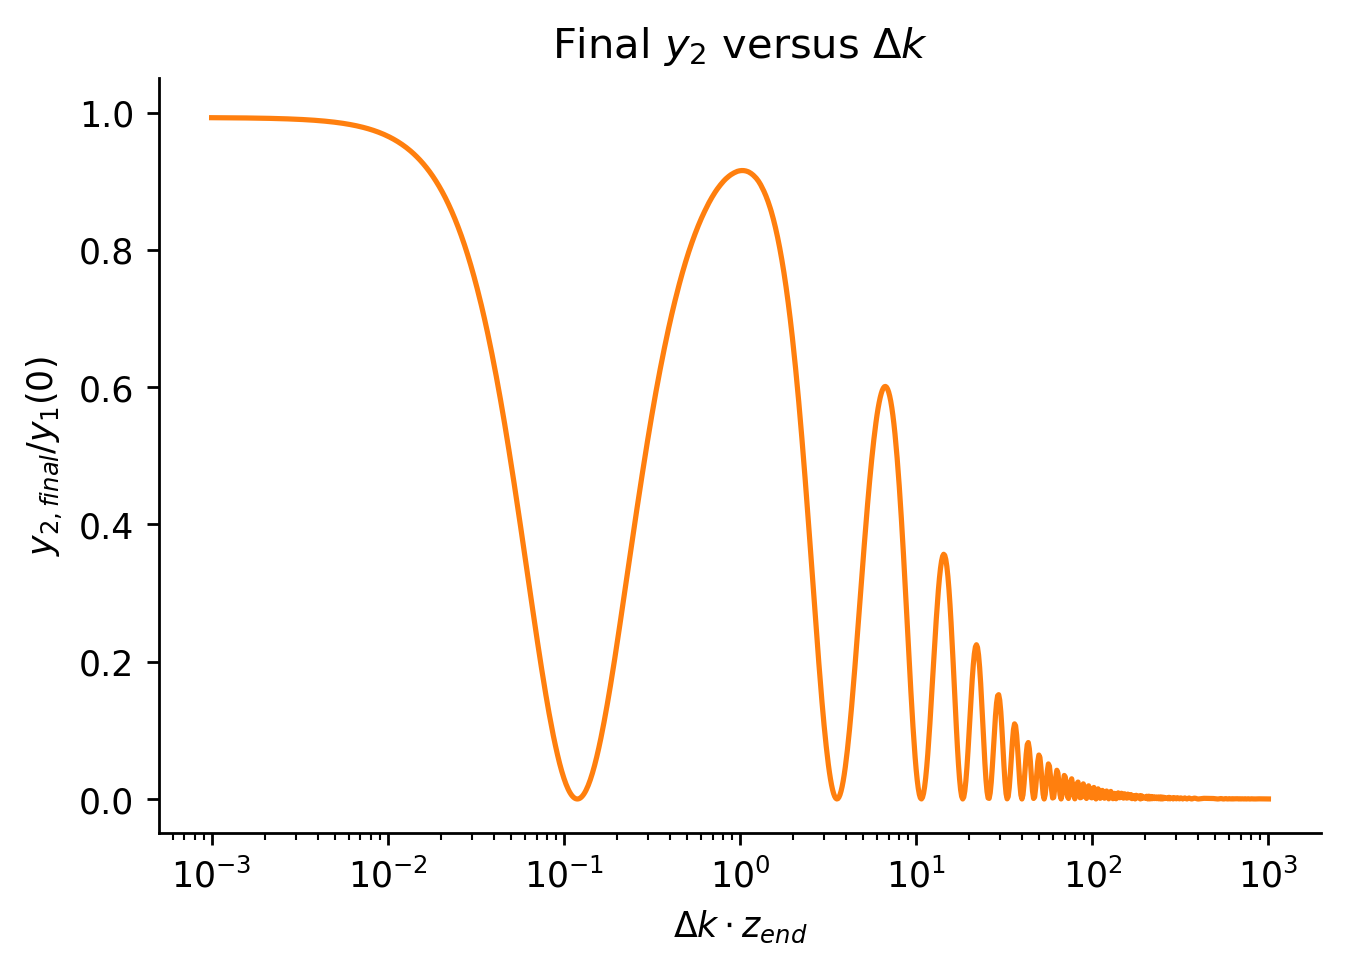

In [63]:
fig,ax=plt.subplots(dpi=250)
ax.plot(delta_k_list_2*z_end,y_2_final,color='C1')

ax.set_ylim(-0.05,1.05)
ax.set_title(f"Final $y_2$ versus $\Delta k$")
ax.set_ylabel('$y_{2,final}$/$y_1$(0)')
ax.set_xlabel('$\Delta k\cdot z_{end}$')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xscale('log')

plt.savefig(f'Ultimate_y2.png',facecolor='white', transparent=False, bbox_inches="tight")


plt.show()

In [72]:
def get_value_at_freq(freqList,
                      freqOfInterest,
                      array):
   
    absArray = np.abs(freqList - freqOfInterest)
    index = absArray.argmin()
    extracted_value = array[index]
    return extracted_value

In [67]:

df = pd.read_csv('RefractiveIndexINFO.csv')
df.head()
n=df['n']
f=df['f [THz]']


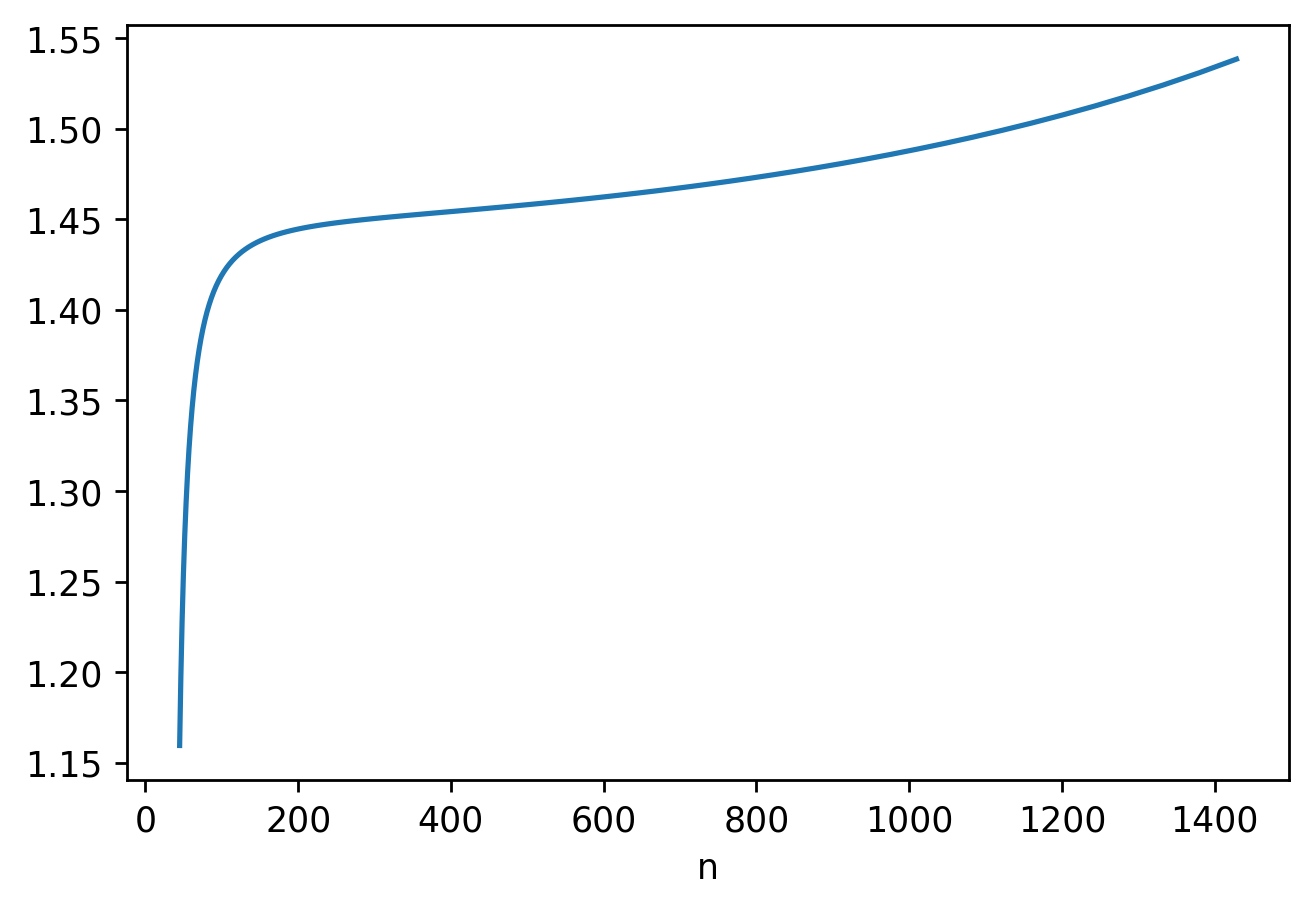

101


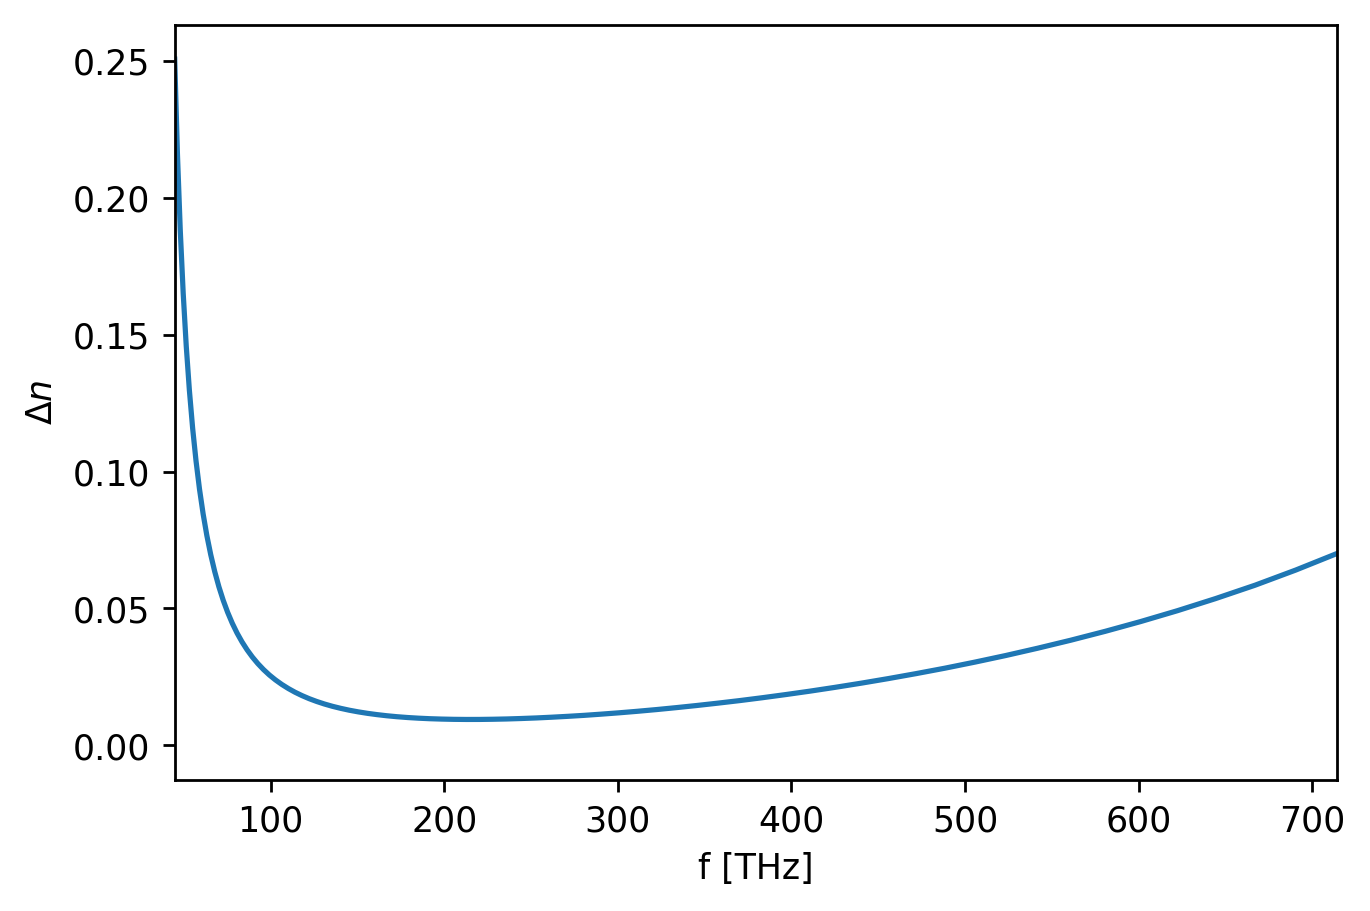

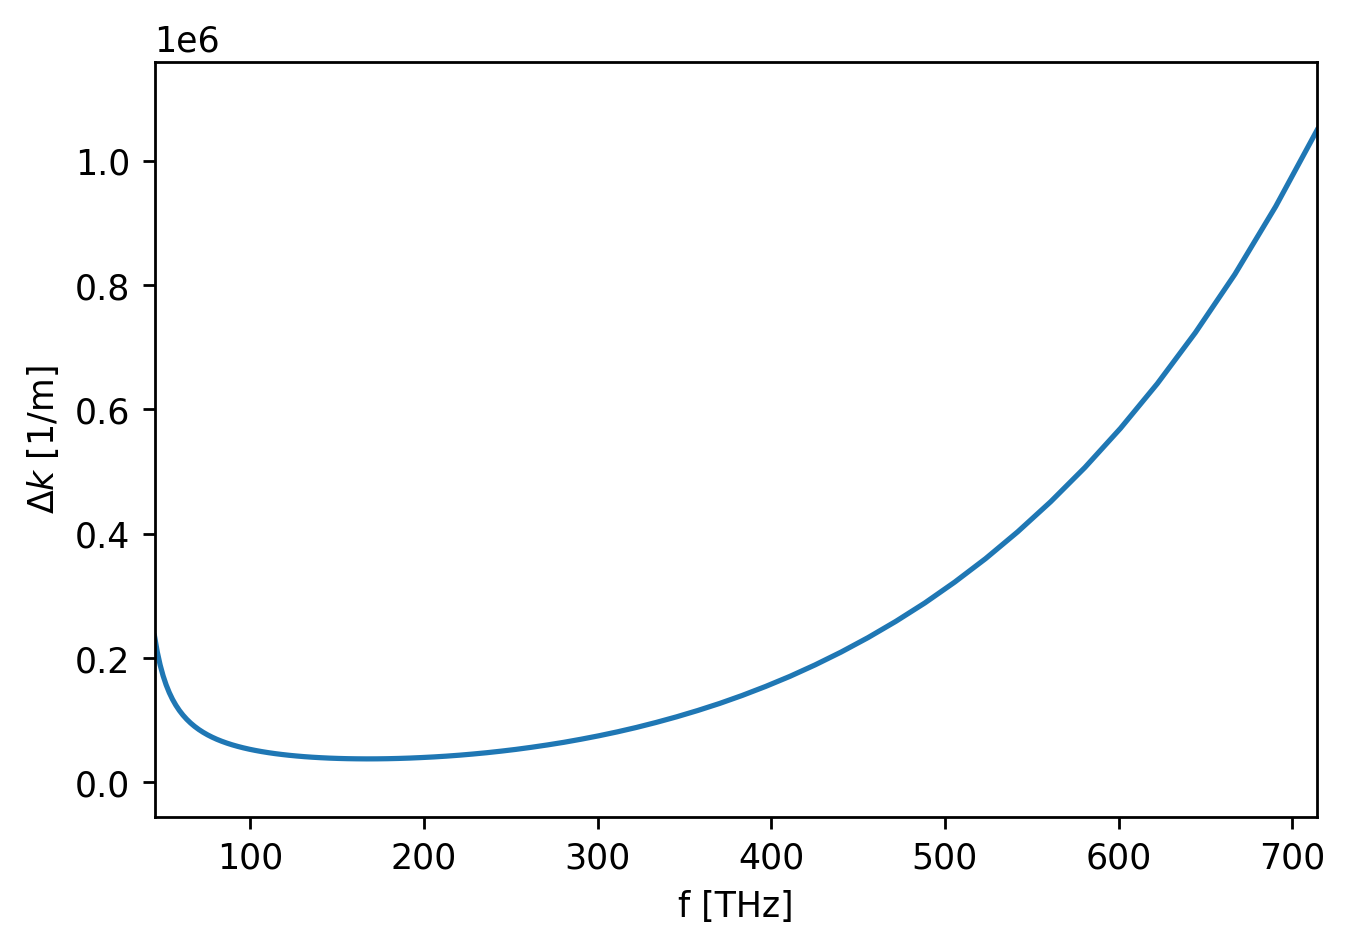

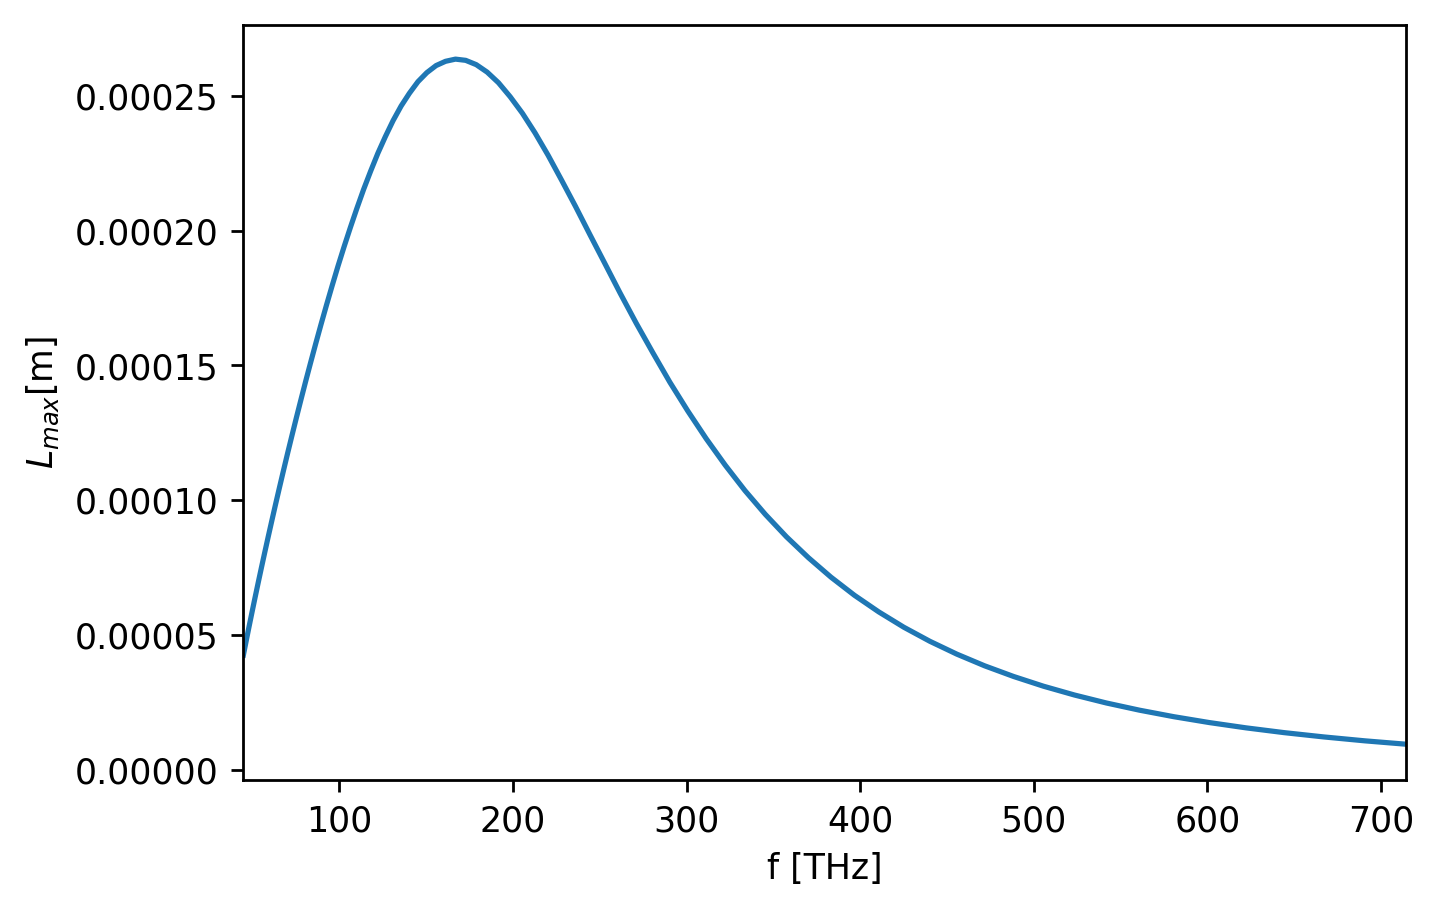

In [86]:
n_diff = []

for current_freq, current_n in zip(f,n):
    n_diff.append( get_value_at_freq(f,
                      current_freq*2,
                      n) - current_n   )

fig,ax = plt.subplots(dpi=250)
ax.plot(f,n)
ax.set_xlabel('f [THz]')
ax.set_xlabel('n')
plt.show()
print(len(f))

fig,ax = plt.subplots(dpi=250)
ax.plot(f,n_diff)
ax.set_xlim(np.min(f),np.max(f)/2)
ax.set_xlabel('f [THz]')
ax.set_ylabel('$\Delta n$')
plt.show()

fig,ax = plt.subplots(dpi=250)
ax.plot(f,n_diff*f*1e12*2*np.pi/(3e8))
ax.set_xlim(np.min(f),np.max(f)/2)
ax.set_xlabel('f [THz]')
ax.set_ylabel('$\Delta k$ [1/m]')
plt.show()


fig,ax = plt.subplots(dpi=250)
ax.plot(f,10/(n_diff*f*1e12*2*np.pi/(3e8)))
ax.set_xlim(np.min(f),np.max(f)/2)
ax.set_xlabel('f [THz]')
ax.set_ylabel('$L_{max}$[m]')
plt.show()


